In [2]:
import numpy as np
import pandas as pd
print(pd.__version__)
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.lines as mlines
import matplotlib.cm as cm
from glob import glob
from collections import Counter
#import seaborn as sns
import math
import scipy
from scipy.interpolate import interp1d
from scipy import stats
import scipy.integrate as integrate
import matplotlib.cm as cm
import matplotlib as mpl
from random import shuffle
import os.path
import single_psr_evolv as psrevol

import unit_convert
import GCE as gce
import ns
import history_cmc as hic
import dynamics as dyn
import psr_catalog as pc
import cluster_sampling_v1 as csv1

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams.update({'font.size': 22})
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1095/syr904/projects/GCE/plots/'
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

0.19.2
2.1.2


/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


(0.0001, 10)

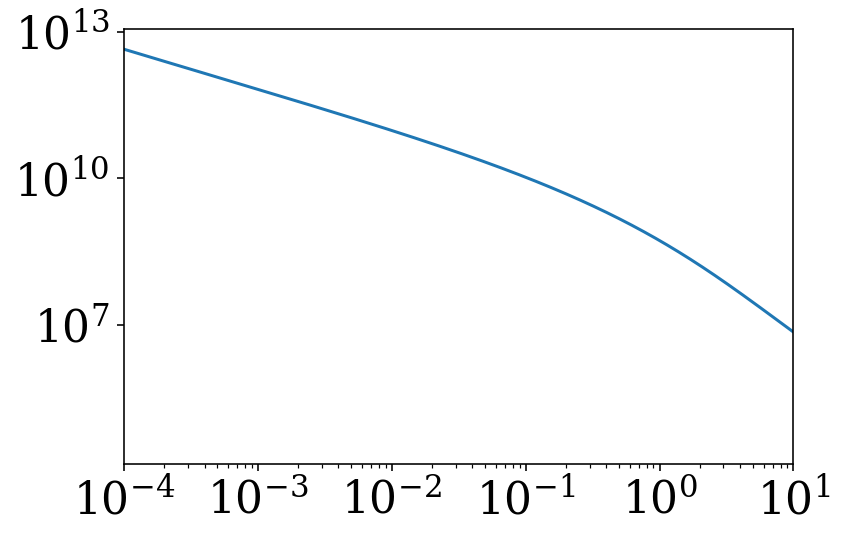

In [2]:
data = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/galaxy_profile.txt')

plt.figure()
plt.plot(data[:,0], data[:,1])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 10)

66
tot num 181
144 119
72
['2' '2' '3' '2' '2' '2' '2' '1' '3' '1' '1' '1' '1' '1' '3' '1' '2' '1'
 '2' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '2' '1' '1'
 '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '1' '2'
 '2' '2' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
144
1.5333869948103097e+24
72
1.5333869948103097e+24
71


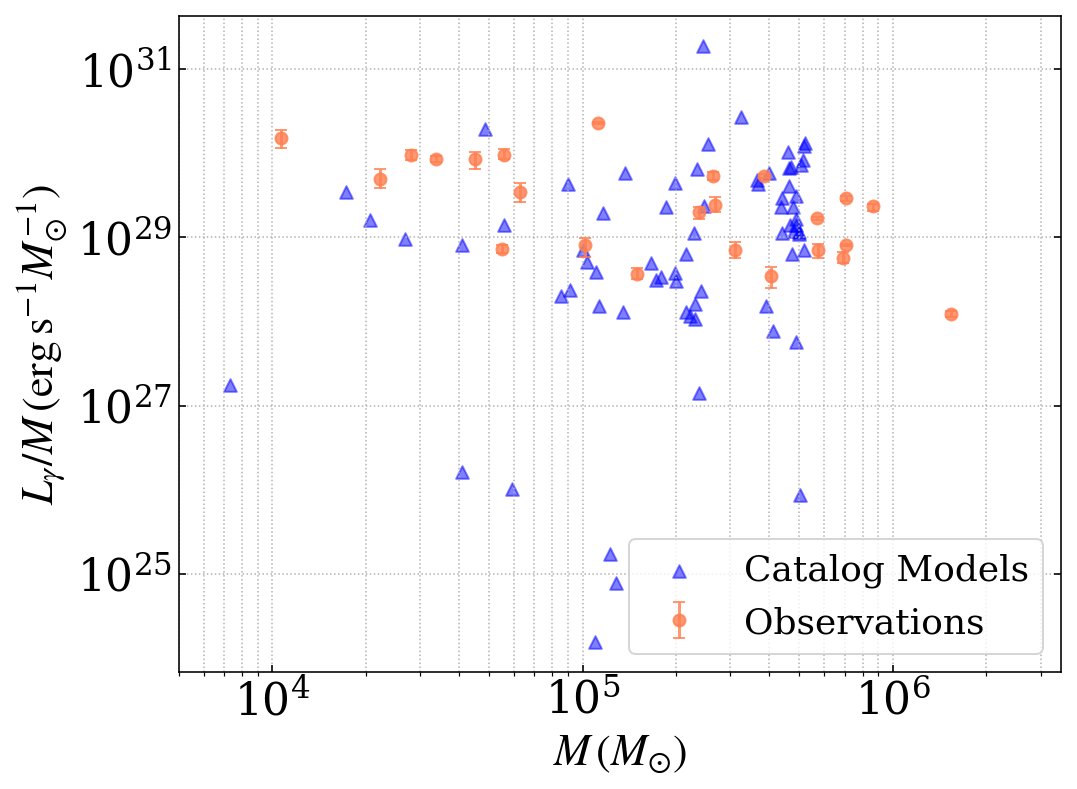

In [2]:
##Plot L_gamma vs. Total mass of the  GCs
L_gamma_tot, L_gamma_msp, L_gamma_psr, M = gce.find_Lgammaray_lastsnapshot('/projects/b1095/syr904/projects/GCE/catalog/', 0.1)
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', 
                         dtype=str)
print('tot num', len(pathlist[:,0]))
status = pathlist[:,1][0:144]; paths = pathlist[:,0][0:144]
clusterproperty = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/clusterproperty_maingrid_last.dat')
Npsr = clusterproperty[:,10]; Nmsp = clusterproperty[:,11]
Tdisrup = clusterproperty[:,-1]
print(len(paths), len(paths[status=='1']))

Lgamma_obs=np.genfromtxt('/projects/b1095/syr904/projects/GCE/lgamma.txt')
mass_obs=np.array(Lgamma_obs[:,0]); lgamma_obs=np.array(Lgamma_obs[:,1])
lgamma_obs_max=np.array(Lgamma_obs[:,2]); lgamma_obs_min=np.array(Lgamma_obs[:,3])
lgamma_lowerr=lgamma_obs-lgamma_obs_min; lgamma_uperr=lgamma_obs_max-lgamma_obs
lgamma_error=[lgamma_lowerr, lgamma_uperr]


index_tot=[]
for i in range(len(L_gamma_tot)):
    if L_gamma_tot[i]==0.:
        index_tot.append(i)
    #if L_gamma_tot[i]/M[i]<=10**28 and L_gamma_tot[i]/M[i]>0:
    #    print(i, status[i])
        #index.append(i)
        
index_msp = []
for j in range(len(L_gamma_msp)):
    if L_gamma_msp[j]==0.:
        index_msp.append(j)
    #if L_gamma_msp[j]/M[j]<=10**28 and L_gamma_msp[j]/M[j]>0:
    #    print(j, status[j], paths[j], Npsr[j], Nmsp[j])
print(len(index_msp))
print(status[index_msp])
    
#L_tot_new = np.delete(L_gamma_tot, index_tot)
#M_new = np.delete(M, index_tot)

print(len(L_gamma_msp))
L_msp_new = np.delete(L_gamma_msp, index_msp)
M_msp_new = np.delete(M, index_msp)
Tdisrup_new = np.delete(Tdisrup, index_msp)
Nmsp_new = np.delete(Nmsp, index_msp)
print(np.min(L_msp_new/M_msp_new))
print(len(L_msp_new))

#L_gamma_tot = np.array(L_gamma_tot)[status=='1']
L_msp_new = L_msp_new[Tdisrup_new>7.]
M_msp_new =M_msp_new[Tdisrup_new>7.]
print(np.min(L_msp_new/M_msp_new))
print(len(L_msp_new))

matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(8, 6))
#plt.scatter(M_new, L_tot_new/M_new, 
#            color='gold', s=40, alpha=0.5, marker='s',
#            label = 'Catalog Models')
plt.scatter(M_msp_new, L_msp_new/M_msp_new, 
            color='b', s=40, alpha=0.5, marker='^',
            label = 'Catalog Models')
plt.errorbar(mass_obs, lgamma_obs, yerr=lgamma_error, 
             fmt='o', color='coral', alpha=0.8, capsize=3,
             label = 'Observations')
#plt.scatter(mass_obs, lgamma_obs, marker='^', color='coral', alpha=0.8, label = 'Observations')
#plt.scatter(2.699e6, 8.515579e+35/2.699e6, marker = '*', s = 60, color = 'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5*10**3, 3.5*10**6)
#plt.ylim(ymin=np.min(L_msp_new/M_msp_new))
plt.xlabel(r'$M\,(M_{\odot})$')
plt.ylabel(r'$L_{\gamma}/M\,(\rm{erg\,s^{-1}}\mathit{M_{\odot}^{-1}})$')
plt.legend(loc = 'lower right', fontsize=18)
plt.grid(linestyle=':',which='major',linewidth='0.75')
plt.grid(linestyle=':',which='minor',linewidth='0.75')
plt.tick_params(top=False, right=True, direction = 'in')
#plt.title('Only MSPs')

plt.tight_layout()
plt.savefig(figsave+'Gamma_M_msp.pdf', dpi=300)

In [ ]:
##Plot L_gamma vs. Total mass of the  GCs for multiple snapshots
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', 
                         dtype=str)
print('tot num', len(pathlist[:,0]))
status = pathlist[:,1][0:144]; paths = pathlist[:,0][0:144]
clusterproperty = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/clusterproperty_maingrid_last.dat')
Tdisrup = clusterproperty[:,-1]; Nmsp = clusterproperty[:,11]

Lgamma_obs=np.genfromtxt('/projects/b1095/syr904/projects/GCE/lgamma.txt')
mass_obs=np.array(Lgamma_obs[:,0]); lgamma_obs=np.array(Lgamma_obs[:,1])
lgamma_obs_max=np.array(Lgamma_obs[:,2]); lgamma_obs_min=np.array(Lgamma_obs[:,3])
lgamma_lowerr=lgamma_obs-lgamma_obs_min; lgamma_uperr=lgamma_obs_max-lgamma_obs
lgamma_error=[lgamma_lowerr, lgamma_uperr]


##Lgamma for multiple snapshots
filepath = '/projects/b1095/syr904/projects/GCE/catalog/data_lgamma/'
L_gamma_msp = []; M_msp = []
for xx in range(len(paths)):
    #print(xx)
    t_disrupt = Tdisrup[xx]
    if t_disrupt<7:
        continue
    
    s=paths[xx].split('/')
    n_star=s[-2]
    z=s[-3][1:]
    rg=s[-4][2:]
    rv=s[-5][2:]
    
    tmyr = []; lgamma_msp = []
    t_ns = []; N_msp = []
    lgamma_file = filepath+'model_rv'+rv+'_rg'+rg+'_z'+z+'_'+n_star+'.txt'
    with open(lgamma_file, 'r') as fgamma:
        next(fgamma)
        Lines = fgamma.readlines()
        #print(len(Lines))
        if len(Lines)==0:
            continue
        else:
            for line in Lines:
                data=line.split()
                tmyr.append(float(data[1]))
                lgamma_msp.append(float(data[2]))

    dynfile = paths[xx]+'initial.dyn.dat'
    m_conv = dyn.conv('m', paths[xx]+'initial.conv.sh')
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    t_dyn = []; m_dyn = []
    with open(dynfile, 'r') as fdyn:
        next(fdyn); next(fdyn)
        for i, line in enumerate(fdyn):
            if i%3 == 0:
                data = line.split()
                t_dyn.append(float(data[0])*t_conv)
                m_dyn.append(float(data[4])*m_conv)
                
    nsfile = paths[xx]+'initial.ns.dat'
    with open(nsfile, 'r') as fns:
        next(fns)
        Lines = fns.readlines()
        if len(Lines)==0:
            continue
        else:
            for line in Lines:
                data = line.split()
                t_ns.append(float(data[0])*t_conv)
                N_msp.append(int(data[6]))
                
    
    for yy in range(0, len(tmyr), 20):
        if tmyr[yy]>=(t_disrupt-2.)*1000.:
            if lgamma_msp[yy]>0:
                L_gamma_msp.append(lgamma_msp[yy])
            
                for zz in range(len(t_dyn)):
                    if t_dyn[zz]>=tmyr[yy]:
                        M_msp.append(m_dyn[zz])
                        #print(t_dyn[zz], tmyr[yy])
                        break
                        
                for ii in range(len(t_ns)):
                    if t_ns[ii]>=tmyr[yy]:
                        n_msp = N_msp[ii]
                        #print(t_ns[ii], tmyr[yy])
                        break
                        
                if L_gamma_msp[-1]/M_msp[-1]<=10**28:
                    print(xx, tmyr[yy], lgamma_msp[yy], L_gamma_msp[-1]/M_msp[-1], status[xx], paths[xx], n_msp)
            

matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(8, 6))
plt.scatter(np.array(M_msp), np.array(L_gamma_msp)/np.array(M_msp), 
            color='b', s=40, alpha=0.5, marker='^',
            label = 'Catalog Models')
plt.errorbar(mass_obs, lgamma_obs, yerr=lgamma_error, 
             fmt='o', color='coral', alpha=0.8, capsize=3,
             label = 'Observations')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5*10**3, 3.5*10**6)
#plt.ylim(ymin=np.min(L_msp_new/M_msp_new))
plt.xlabel(r'$M\,(M_{\odot})$')
plt.ylabel(r'$L_{\gamma}/M\,(\rm{erg\,s^{-1}}\,\mathit{M_{\odot}^{-1}})$')
plt.legend(loc = 'lower right', fontsize=18)
plt.grid(linestyle=':',which='major',linewidth='0.75')
plt.grid(linestyle=':',which='minor',linewidth='0.75')
plt.tick_params(top=False, right=True, direction = 'in')

plt.tight_layout()
plt.savefig(figsave+'Gamma_M_msp_multiplesnaps.pdf', dpi=300)

tot num 181
26 11679.855521 1.319514e+33 6.129828934914919e+27 1 /projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg20/z0.0002/8e5/ 1
26 12033.852188 1.420379e+33 6.643543470293797e+27 1 /projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg20/z0.0002/8e5/ 1
26 12283.86986 1.468976e+33 6.906128044449415e+27 1 /projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg20/z0.0002/8e5/ 1
26 12762.873005 1.536253e+33 7.283763853721475e+27 1 /projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg20/z0.0002/8e5/ 1
26 13073.64011 1.56902e+33 7.48417047522954e+27 1 /projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg20/z0.0002/8e5/ 1
45 11757.380052 3.546376e+31 7.246141697265921e+26 1 /projects/b1091/CMC_Grid_March2019/rundir/rv1/rg2/z0.02/4e5/ 1
45 11857.365388 3.541788e+31 7.4534054242179e+26 1 /projects/b1091/CMC_Grid_March2019/rundir/rv1/rg2/z0.02/4e5/ 1
45 11960.721881 3.537089e+31 7.676872734244154e+26 1 /projects/b1091/CMC_Grid_March2019/rundir/rv1/rg2/z0.02/4e5/ 1
45 12085.025704 3.531481e+31 7.9541149950

In [2]:
###Check the outliers
path_check = ['/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg20/z0.0002/8e5/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv1/rg2/z0.02/4e5/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv1/rg8/z0.02/2e5/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv1/rg20/z0.0002/1.6e6/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv1/rg20/z0.002/4e5/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv2/rg2/z0.002/1.6e6/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv2/rg20/z0.0002/1.6e6/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv2/rg20/z0.002/8e5/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv4/rg2/z0.002/8e5/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv4/rg8/z0.0002/8e5/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv4/rg8/z0.02/4e5/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv4/rg20/z0.002/1.6e6/',
              '/projects/b1091/CMC_Grid_March2019/rundir/rv4/rg20/z0.02/4e5/']
time_check = [13073.,12646.,13452.,13666.,13604.,13736.,12160.,13719.,7094.,13256.,13655.,13994.,13948.]
for ii in range(len(path_check)):
    t_conv = dyn.conv('t', path_check[ii]+'initial.conv.sh')
    with open(path_check[ii]+'initial.morepulsars.dat', 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            data = line.split()
            if float(data[1])*t_conv<time_check[ii]:
                continue
            if float(data[1])*t_conv>time_check[ii]+1:
                break
            if int(data[2])==1:
                if float(data[9])<=0.03:
                    print(ii, int(data[3]))
                if float(data[10])<=0.03:
                    print(ii, int(data[4]))
            else:
                if float(data[9])<=0.03:
                    print(ii, int(data[3]))
            

0 409926
1 207681
2 258643
3 881848
4 380502
5 240292
6 21166
7 430254
8 380548
9 776597
10 37651
11 1311223
11 254231
11 1485664
11 1427176
12 37651


In [8]:
# Estimate of half-mass density of catalog moels
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

rhoh_100 = []; rhoh_1000 = []; rhoh_5000 = []; rhoh_11500 = []
for kk in range(len(paths)):
    t_conv = dyn.conv('t', paths[kk]+'initial.conv.sh')
    m_conv = dyn.conv('m', paths[kk]+'initial.conv.sh')
    l_conv = dyn.conv('l', paths[kk]+'initial.conv.sh')

    dynfile = paths[kk]+'initial.dyn.dat'
    with open(dynfile, 'r') as fdyn:
        next(fdyn); next(fdyn)
        for line in fdyn:
            data = line.split()
            if float(data[0])*t_conv>=100:
                rhoh_temp = float(data[4])*m_conv/(2.*twopi/3.*pow(float(data[20])*l_conv, 3))
                rhoh_100.append(rhoh_temp)
            if float(data[0])*t_conv>=1000:
                rhoh_temp = float(data[4])*m_conv/(2.*twopi/3.*pow(float(data[20])*l_conv, 3))
                rhoh_1000.append(rhoh_temp)
            if float(data[0])*t_conv>=5000:
                rhoh_temp = float(data[4])*m_conv/(2.*twopi/3.*pow(float(data[20])*l_conv, 3))
                rhoh_5000.append(rhoh_temp)
            if float(data[0])*t_conv>=11500:
                rhoh_temp = float(data[4])*m_conv/(2.*twopi/3.*pow(float(data[20])*l_conv, 3))
                rhoh_11500.append(rhoh_temp)
                
fig, ax = plt.subplots(ncols=4, figsize=(20, 6))
ax[0].hist(rhoh_100, bins=np.logspace(np.log10(np.min(rhoh_100)), np.log10(np.max(rhoh_100)), 20),
           histtype='step', lw=2, alpha=0.6)
ax[1].hist(rhoh_1000,  bins=np.logspace(np.log10(np.min(rhoh_1000)), np.log10(np.max(rhoh_1000)), 20),
           histtype='step', lw=2, alpha=0.6)
ax[2].hist(rhoh_5000,  bins=np.logspace(np.log10(np.min(rhoh_5000)), np.log10(np.max(rhoh_5000)), 20),
           histtype='step', lw=2, alpha=0.6)
ax[3].hist(rhoh_11500, bins=np.logspace(np.log10(np.min(rhoh_11500)), np.log10(np.max(rhoh_11500)), 20),
           histtype='step', lw=2, alpha=0.6)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[3].set_xscale('log')
ax[3].set_yscale('log')

print(np.mean(rhoh_100), np.mean(rhoh_1000), np.mean(rhoh_5000), np.mean(rhoh_11500))

KeyboardInterrupt: 

nan
0.09084987049927791
0.32177461499987625
0.4065365999997939
nan
0.09578801249982809
0.3192241899998763
0.398190757272628
all_median 0.33531734000012364
all_mean 0.30174327055543104


/software/anaconda3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/software/anaconda3.6/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


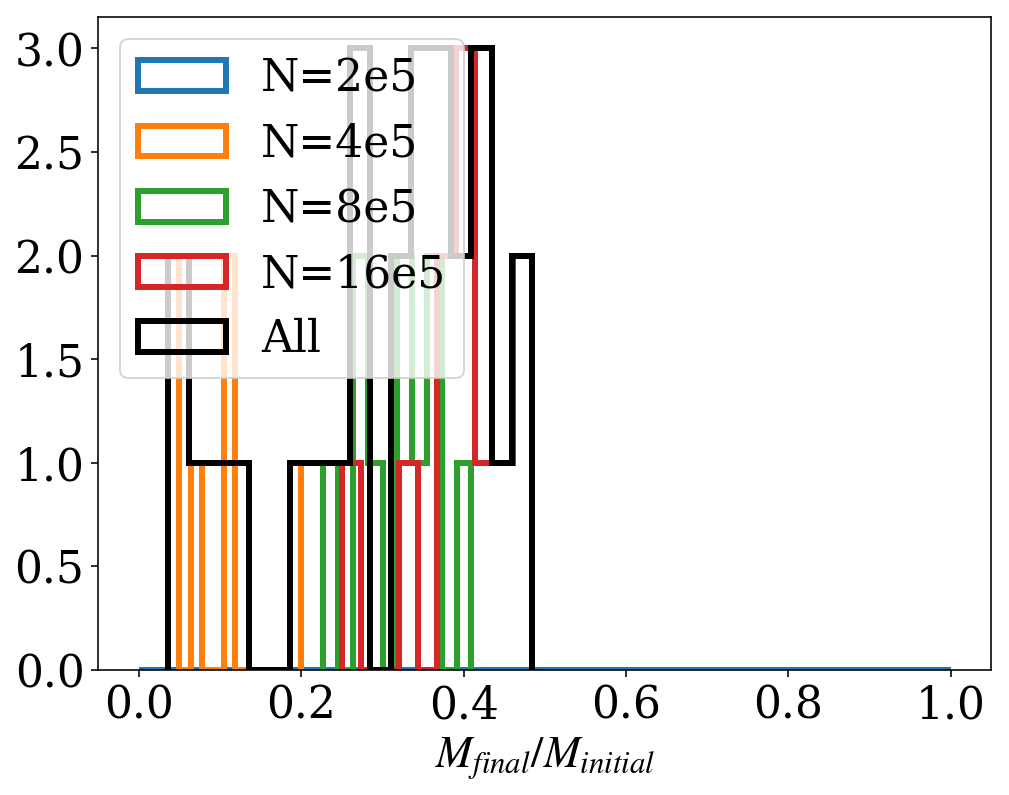

In [5]:
##Compare initial and final mass
data_final = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/clusterproperty_maingrid_13gyr.dat')
M_final = data_final[:,2]; status_final = data_final[:,12]
data_init = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/clusterproperty_catalog_initial.dat')
M_init = data_init[:,1][:144]; Rg_init = data_init[:,-2][:144]

M_final = M_final[status_final==1]
M_init = M_init[status_final==1]
Rg_init = Rg_init[status_final==1]
M_final = M_final[Rg_init==2.]
M_init = M_init[Rg_init==2.]
#print(M_final, M_init)

plt.figure(figsize=(8,6))
#plt.scatter(M_init/1e5, M_final/M_init)
plt.hist(M_final[M_init==1.197630e+05]/M_init[M_init==1.197630e+05], bins=12,
         lw=3, histtype='step', label='N=2e5')
plt.hist(M_final[M_init==2.423500e+05]/M_init[M_init==2.423500e+05], bins=12,
         lw=3, histtype='step', label='N=4e5')
plt.hist(M_final[M_init==4.848440e+05]/M_init[M_init==4.848440e+05], bins = 10, 
         lw=3, histtype='step', label='N=8e5')
plt.hist(M_final[M_init==9.703820e+05]/M_init[M_init==9.703820e+05], bins = 10, 
         lw=3, histtype='step', label='N=16e5')
plt.hist(M_final/M_init, bins = 18, color='k',
         lw=3, histtype='step', label='All')
plt.xlabel(r'$M_{final}/M_{initial}$')
print(np.median(M_final[M_init==1.197630e+05]/M_init[M_init==1.197630e+05]))
print(np.median(M_final[M_init==2.423500e+05]/M_init[M_init==2.423500e+05]))
print(np.median(M_final[M_init==4.848440e+05]/M_init[M_init==4.848440e+05]))
print(np.median(M_final[M_init==9.703820e+05]/M_init[M_init==9.703820e+05]))
print(np.mean(M_final[M_init==1.197630e+05]/M_init[M_init==1.197630e+05]))
print(np.mean(M_final[M_init==2.423500e+05]/M_init[M_init==2.423500e+05]))
print(np.mean(M_final[M_init==4.848440e+05]/M_init[M_init==4.848440e+05]))
print(np.mean(M_final[M_init==9.703820e+05]/M_init[M_init==9.703820e+05]))
print('all_median', np.median(M_final/M_init))
print('all_mean', np.mean(M_final/M_init))
plt.legend(loc='upper left')

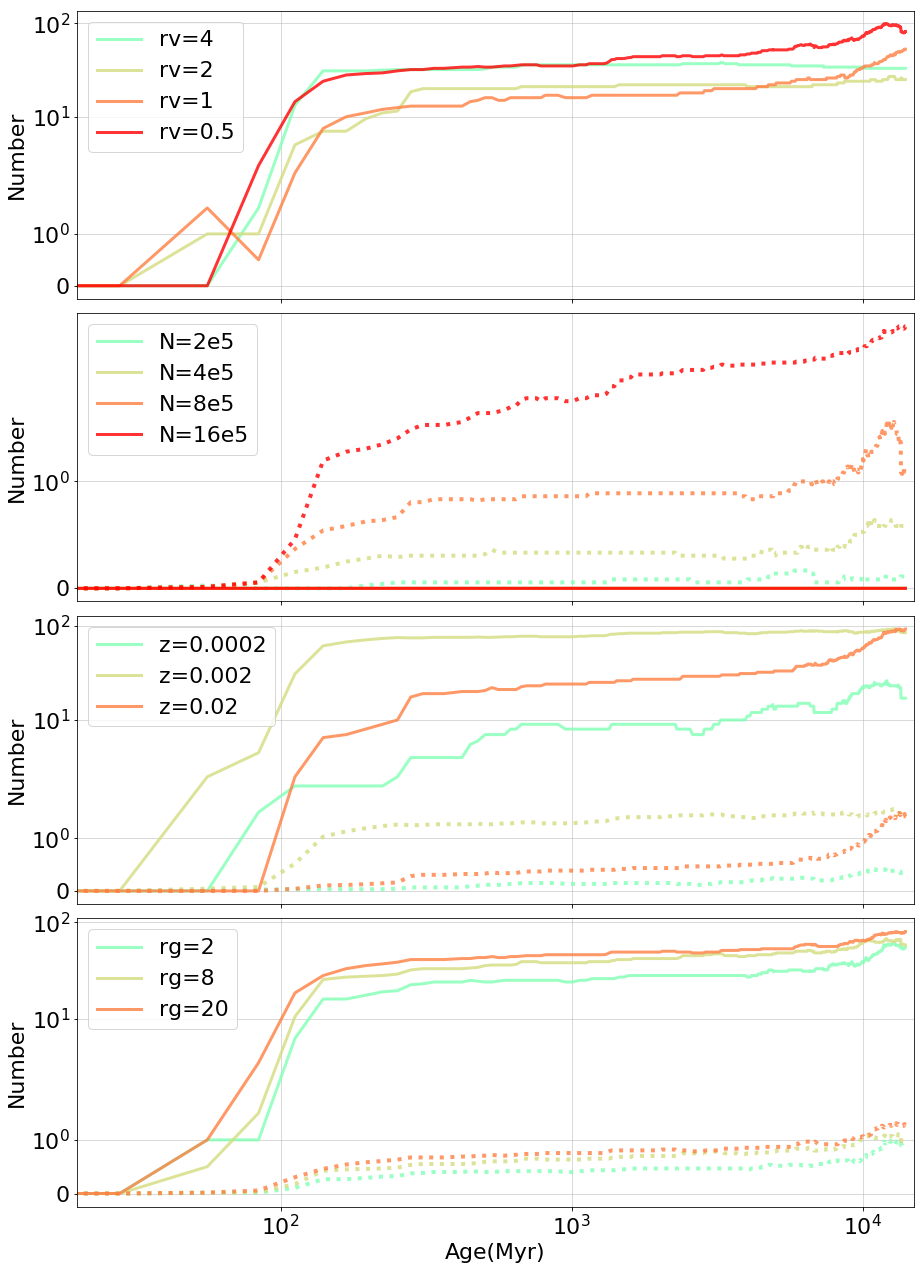

In [4]:
##Plot number of pulsars vs. time
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

n_model_mass = [0,0,0,0]; n_model_rv = [0,0,0,0]; n_model_z = [0,0,0]; n_model_rg = [0,0,0]
for ii in range(len(paths)):
    ##Initial Conditions
    s=paths[ii].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    if n_star==200000.:# and status[ii]=='1': 
        n_model_mass[0]+=1
    if n_star==400000.:# and status[ii]=='1': 
        n_model_mass[1]+=1
    if n_star==800000.:# and status[ii]=='1': 
        n_model_mass[2]+=1
    if n_star==1600000.:# and status[ii]=='1': 
        n_model_mass[3]+=1
        
    if rv==4.:# and status[ii]=='1': 
        n_model_rv[0]+=1
    if rv==2.:# and status[ii]=='1': 
        n_model_rv[1]+=1
    if rv==1.:# and status[ii]=='1': 
        n_model_rv[2]+=1
    if rv==0.5:# and status[ii]=='1': 
        n_model_rv[3]+=1
        
        
    if z==0.0002:# and status[ii]=='1': 
        n_model_z[0]+=1
    if z==0.002:# and status[ii]=='1': 
        n_model_z[1]+=1
    if z==0.02:# and status[ii]=='1': 
        n_model_z[2]+=1
        
        
    if rg==2:# and status[ii]=='1': 
        n_model_rg[0]+=1
    if rg==8:# and status[ii]=='1': 
        n_model_rg[1]+=1
    if rg==20:# and status[ii]=='1': 
        n_model_rg[2]+=1
        
#print(n_model_mass, n_model_rv, n_model_z)

bin_size = 500
##Grouping models        
n_msp_rv = [np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size)]
n_msp_rv_average = [np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size)]

n_msp_mass = [np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size)]
n_msp_mass_average = [np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size)]

n_msp_z = [np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size)]
n_msp_z_average = [np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size)]

n_msp_rg = [np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size)]
n_msp_rg_average = [np.zeros(bin_size),np.zeros(bin_size),np.zeros(bin_size)]
#print(n_msp_rv)

t_all = np.linspace(0, 14000., bin_size+1)
for kk in range(0, 144):
    #print(kk, paths[kk])
    ##Initial Conditions
    s=paths[kk].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
        
    t_conv = dyn.conv('t', paths[kk]+'initial.conv.sh')
    datans = np.genfromtxt(paths[kk]+'initial.ns.dat')
    times = np.array(datans[:,0])*t_conv
    n_psr = datans[:,5]; n_msp = datans[:,6]
        
    ##Interpolate the number of NS data
    f = interp1d(times, n_msp, kind='nearest')
    t_interpld = np.linspace(0, np.max(times), 1000)
    n_msp_new = f(t_interpld)
    #print(n_msp_new)
    
    n_mass = [[],[],[],[]]; n_rv = [[],[],[],[]]; n_z = [[],[],[]]; n_rg = [[],[],[]]
    for jj in range(len(t_all)-1):
        #print(jj)
        n_mass_temp = [0,0,0,0]; n_rv_temp = [0,0,0,0]; n_z_temp = [0,0,0]; n_rg_temp = [0,0,0]
        count_mass = [0,0,0,0]; count_rv = [0,0,0,0]; count_z = [0,0,0]; count_rg = [0,0,0]
            
        ##Group by initial mass
        if n_star==200000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[0]+=n_msp_new[i]
                    count_mass[0]+=1
        
        if n_star==400000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[1]+=n_msp_new[i]
                    count_mass[1]+=1
        
        if n_star==800000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[2]+=n_msp_new[i]
                    count_mass[2]+=1
        
        if n_star==1600000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[3]+=n_msp_new[i]
                    count_mass[3]+=1
            
        ##Group by initial rv   
        if rv==4.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0]+=n_msp_new[i]
                    count_rv[0]+=1
        
        if rv==2.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[1]+=n_msp_new[i]
                    count_rv[1]+=1
        
        if rv==1.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[2]+=n_msp_new[i]
                    count_rv[2]+=1
        
        if rv==0.5:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[3]+=n_msp_new[i]
                    count_rv[3]+=1
                    
        
        ##Group by metallicity
        if z==0.0002:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[0]+=n_msp_new[i]
                    count_z[0]+=1
        
        if z==0.002:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[1]+=n_msp_new[i]
                    count_z[1]+=1
        
        if z==0.02:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[2]+=n_msp_new[i]
                    count_z[2]+=1
                    
                    
        ##Group by galactocentric distance
        if rg==2:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rg_temp[0]+=n_msp_new[i]
                    count_rg[0]+=1
        
        if rg==8:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rg_temp[1]+=n_msp_new[i]
                    count_rg[1]+=1
        
        if rg==20:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rg_temp[2]+=n_msp_new[i]
                    count_rg[2]+=1
    
        #print(count_rv[0])
        
        for x in range(4):
            if count_rv[x]!=0:
                n_rv_temp[x] = n_rv_temp[x]/count_rv[x]
            if count_mass[x]!=0:
                n_mass_temp[x] = n_mass_temp[x]/count_mass[x]
                
            n_rv[x].append(n_rv_temp[x])
            n_mass[x].append(n_mass_temp[x])
        
        for x in range(3):
            if count_z[x]!=0:
                n_z_temp[x] = n_z_temp[x]/count_z[x]
            
            n_z[x].append(n_z_temp[x])
            
            
            if count_rg[x]!=0:
                n_rg_temp[x] = n_rg_temp[x]/count_rg[x]
            
            n_rg[x].append(n_rg_temp[x])
                            
            
    for y in range(4):
        n_msp_rv[y] = n_msp_rv[y]+np.array(n_rv[y])
        n_msp_mass[y] = n_msp_mass[y]+np.array(n_mass[y])
        n_msp_rv_average[y] = n_msp_rv_average[y] + np.array(n_rv[y])/n_model_rv[y]
        n_msp_mass_average[y] = n_msp_mass_average[y] + np.array(n_mass[y])/n_model_mass[y]
        
    for y in range(3):
        n_msp_z[y] = n_msp_z[y]+np.array(n_z[y])
        n_msp_z_average[y] = n_msp_z_average[y] + np.array(n_z[y])/n_model_z[y]
        
        n_msp_rg[y] = n_msp_rg[y]+np.array(n_rg[y])
        n_msp_rg_average[y] = n_msp_rg_average[y] + np.array(n_rg[y])/n_model_rg[y]

    
#print(n_msp_rv[0], n_msp_rv[3])
#print(len(n_msp_rv[0]))
#print(n_msp_rv[0]); print(type(n_msp_rv_average[0]))
rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
rg_label = ['2', '8', '20']
cs = cm.rainbow(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(nrows=4, figsize = (15,22), sharex=True)#figsize = (18,25), 
for z in range(4):
    n_msp_rv[z] = np.insert(n_msp_rv[z], 0, 0.); n_msp_rv_average[z] = np.insert(n_msp_rv_average[z], 0, 0.)
    n_msp_mass[z] = np.insert(n_msp_mass[z], 0, 0.); n_msp_mass_average[z] = np.insert(n_msp_mass_average[z], 0, 0.)
    axs[0].plot(t_all, n_msp_rv[z], label = 'rv='+rv_label[z], color = cs[z], lw = 3, alpha=0.8)
    axs[1].plot(t_all, n_msp_mass[z], label = 'N='+mass_label[z], color = cs[z], lw = 3, alpha=0.8)
    axs[0].plot(t_all, n_msp_rv_average[z], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    #axs[1].plot(t_all, n_msp_mass_average[z], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    ##label = 'rv='+rv_label[z]+', per model',  
    ##label = 'N='+mass_label[z]+', per model', 

for z in range(3):
    n_msp_z[z] = np.insert(n_msp_z[z], 0, 0.); n_msp_z_average[z] = np.insert(n_msp_z_average[z], 0, 0.)
    axs[2].plot(t_all, n_msp_z[z], label = 'z='+z_label[z], color = cs[z], lw = 3, alpha=0.8)
    axs[2].plot(t_all, n_msp_z_average[z], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    ##label = 'z='+z_label[z]+', per model', 
    
    n_msp_rg[z] = np.insert(n_msp_rg[z], 0, 0.); n_msp_rg_average[z] = np.insert(n_msp_rg_average[z], 0, 0.)
    axs[3].plot(t_all, n_msp_rg[z], label = 'rg='+rg_label[z], color = cs[z], lw = 3, alpha=0.8)
    axs[3].plot(t_all, n_msp_rg_average[z], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    ##label = 'rg='+rg_label[z]+', per model', 
    
xticks = [20,40,60,80,100,200,400,600,800,1000,2000,4000,6000,8000,10000]
yticks = [2, 4, 6, 8,10,20,40,60,80,100]

axs[0].set_xscale('symlog')
axs[0].set_yscale('symlog')
axs[0].set_xlim(xmin = 20, xmax=15000)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel('Number')
axs[0].legend(loc='best')
#axs[0].set_xticks(xticks)
#axs[0].set_yticks(yticks)
#axs[0].set_yticklabels(["$%d$" % y for y in yticks], fontsize=20)
axs[0].grid(True, alpha = 0.6)

axs[1].set_xscale('symlog')
axs[1].set_yscale('symlog')
axs[1].set_xlim(xmin = 20, xmax=15000)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel('Number')
axs[1].legend(loc='best')
#axs[1].set_xticks(xticks)
#axs[1].set_yticks(yticks)
#axs[1].set_yticklabels(["$%d$" % y for y in ylabel], fontsize=20)
axs[1].grid(True, alpha = 0.6)

axs[2].set_xscale('symlog')
axs[2].set_yscale('symlog')
axs[2].set_xlim(xmin = 20, xmax=15000)
#axs[2].set_xlabel('time(Myr)')
axs[2].set_ylabel('Number')
axs[2].legend(loc='best')
#axs[2].set_xticks(xticks)
#axs[2].set_yticks(yticks)
#axs[2].set_yticklabels(["$%d$" % y for y in ylabel], fontsize=20)
axs[2].grid(True, alpha = 0.6)

axs[3].set_xscale('symlog')
axs[3].set_yscale('symlog')
axs[3].set_xlim(xmin = 20, xmax=15000)
axs[3].set_xlabel('Age(Myr)')
axs[3].set_ylabel('Number')
axs[3].legend(loc='best')
#axs[3].set_xticks(xticks)
#axs[3].set_xticklabels(["$%d$" % x for x in xlabel], fontsize=20)
#axs[3].set_yticks(yticks)
#axs[3].set_yticklabels(["$%d$" % y for y in ylabel], fontsize=20)
axs[3].grid(True, alpha = 0.6)


plt.subplots_adjust(hspace=0.05)
#plt.tight_layout()
#plt.savefig('/projects/b1095/syr904/projects/GCE/plots/Nmsp_age.pdf', dpi = 300)

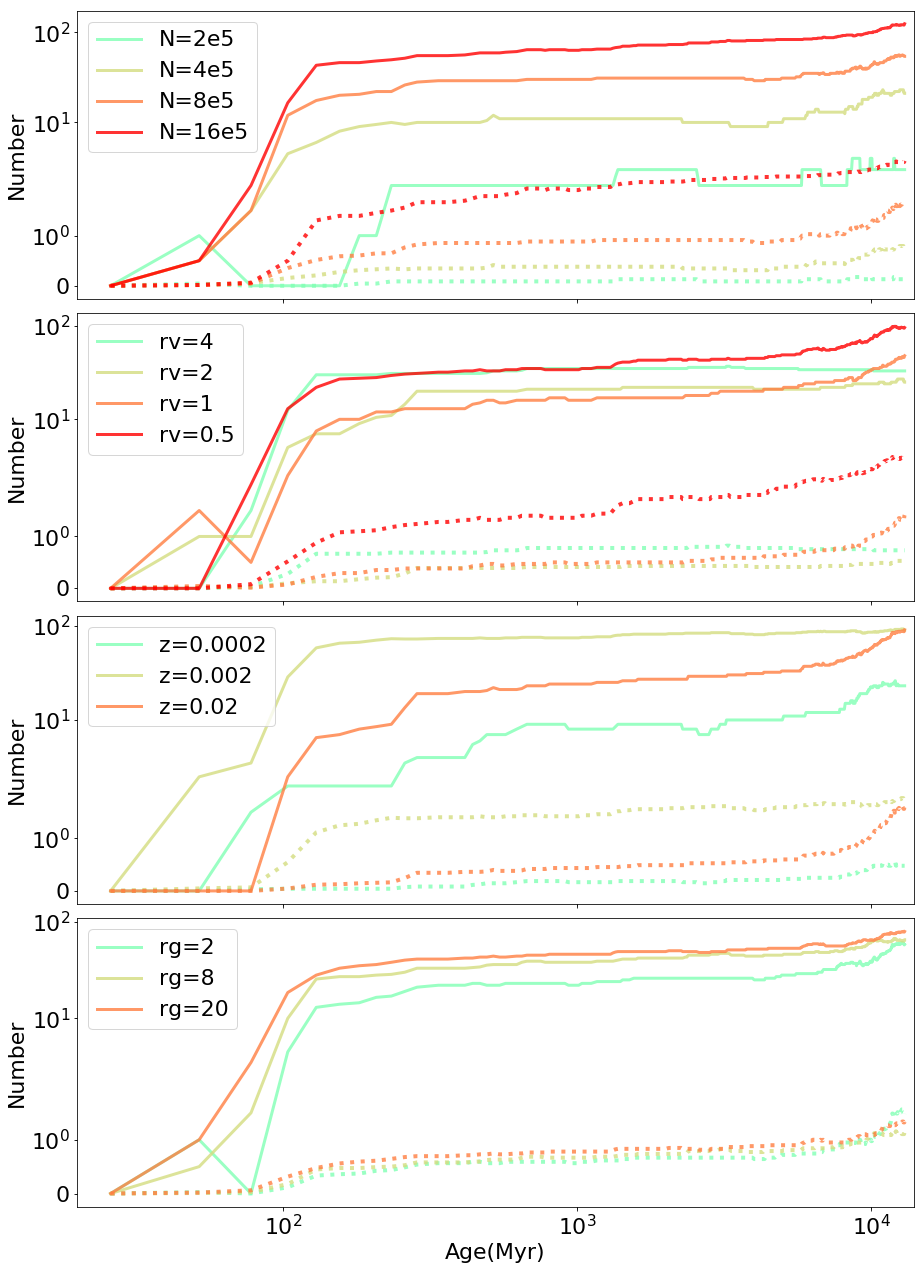

In [16]:
##Plot number of pulsars vs. time for non-dissolved models only
data_mass = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_mass_age_nondissolved.dat')
data_rv = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rv_age_nondissolved.dat')
data_z = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_z_age_nondissolved.dat')
data_rg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rg_age_nondissolved.dat')

scatter_nmsp_mass_sort = []
scatter_nmsp_rv_sort = []
scatter_nmsp_z_sort = []
scatter_nmsp_rg_sort = []

rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
rg_label = ['2', '8', '20']

for ii in range(4):
    data_mass_scatter = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_time_scatter_mass_'+mass_label[ii]+'.dat')
    scatter_nmsp_mass_sort.append(data_mass_scatter[:,0])
    scatter_nmsp_mass_sort.append(data_mass_scatter[:,1])
    
    data_rv_scatter = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_time_scatter_rv_'+rv_label[ii]+'.dat')
    scatter_nmsp_rv_sort.append(data_rv_scatter[:,0])
    scatter_nmsp_rv_sort.append(data_rv_scatter[:,1])   

for ii in range(3):
    data_z_scatter= np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_time_scatter_z_'+z_label[ii]+'.dat')
    scatter_nmsp_z_sort.append(data_z_scatter[:,0])
    scatter_nmsp_z_sort.append(data_z_scatter[:,1])
    
    data_rg_scatter = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_time_scatter_rg_'+rg_label[ii]+'.dat')
    scatter_nmsp_rg_sort.append(data_rg_scatter[:,0])
    scatter_nmsp_rg_sort.append(data_rg_scatter[:,1])
    

cs = cm.rainbow(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(nrows=4, figsize = (15,22), sharex=True)#figsize = (18,25), 
for z in range(4):
    axs[1].plot(data_rv[:,0], data_rv[:,z+1], label = 'rv='+rv_label[z], color = cs[z], lw = 3, alpha=0.8)
    axs[0].plot(data_mass[:,0], data_mass[:,z+1], label = 'N='+mass_label[z], color = cs[z], lw = 3, alpha=0.8)
    axs[1].plot(data_rv[:,0], data_rv[:,z+5], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
               #label = 'rv='+rv_label[z])
    axs[0].plot(data_mass[:,0], data_mass[:,z+5], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
               #label = 'N='+mass_label[z])
    #axs[0].plot(data_rv[:,0], data_rv[:,z+17]*10**6, color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8,
    #           label = 'rv='+rv_label[z])
    #axs[1].plot(data_mass[:,0], data_mass[:,z+17]*10**6, color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8,
    #           label = 'N='+mass_label[z])
    ##label = 'rv='+rv_label[z]+', per model',  
    ##label = 'N='+mass_label[z]+', per model', 
    
    #axs[0].scatter(scatter_nmsp_mass_sort[z*2], scatter_nmsp_mass_sort[z*2+1],
    #              alpha=0.5, marker = '.')
    #axs[1].scatter(scatter_nmsp_rv_sort[z*2], scatter_nmsp_rv_sort[z*2+1],
    #              alpha=0.5, marker = '.')

for z in range(3):
    axs[2].plot(data_z[:,0], data_z[:,z+1], label = 'z='+z_label[z], color = cs[z], lw = 3, alpha=0.8)
    axs[2].plot(data_z[:,0], data_z[:,z+4], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
               #label = 'z='+z_label[z])
    ##label = 'z='+z_label[z]+', per model', 
    
    axs[3].plot(data_rg[:,0], data_rg[:,z+1], label = 'rg='+rg_label[z], color = cs[z], lw = 3, alpha=0.8)
    axs[3].plot(data_rg[:,0], data_rg[:,z+4], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
               #label = 'rg='+rg_label[z])
    
    #axs[2].plot(data_z[:,0], data_z[:,z+17]*10**6, color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8,
    #           label = 'z='+z_label[z])
    
    #axs[3].plot(data_rg[:,0], data_rg[:,z+17]*10**6, color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8,
    #           label = 'rg='+rg_label[z])
    
    #axs[2].scatter(scatter_nmsp_z_sort[z*2], scatter_nmsp_z_sort[z*2+1],
    #              alpha=0.5,marker = '.')
    #axs[3].scatter(scatter_nmsp_rg_sort[z*2], scatter_nmsp_rg_sort[z*2+1],
    #              alpha=0.5,marker = '.')


axs[0].set_xscale('symlog')
axs[0].set_yscale('symlog')
axs[0].set_xlim(xmin = 20, xmax=14000)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel('Number')
axs[0].legend(loc='best')
#axs[0].set_xticks(xticks)
#axs[0].set_yticks(yticks)
#axs[0].set_yticklabels(["$%d$" % y for y in yticks], fontsize=20)
#axs[0].grid(True, alpha = 0.6)

axs[1].set_xscale('symlog')
axs[1].set_yscale('symlog')
axs[1].set_xlim(xmin = 20, xmax=14000)
#axs[1].set_ylim(ymin = 0, ymax=5)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel('Number')
axs[1].legend(loc='best')
#axs[1].set_xticks(xticks)
#axs[1].set_yticks(yticks)
#axs[1].set_yticklabels(["$%d$" % y for y in ylabel], fontsize=20)
#axs[1].grid(True, alpha = 0.6)

axs[2].set_xscale('symlog')
axs[2].set_yscale('symlog')
axs[2].set_xlim(xmin = 20, xmax=14000)
#axs[2].set_xlabel('time(Myr)')
axs[2].set_ylabel('Number')
axs[2].legend(loc='best')
#axs[2].set_xticks(xticks)
#axs[2].set_yticks(yticks)
#axs[2].set_yticklabels(["$%d$" % y for y in ylabel], fontsize=20)
#axs[2].grid(True, alpha = 0.6)

axs[3].set_xscale('symlog')
axs[3].set_yscale('symlog')
axs[3].set_xlim(xmin = 20, xmax=14000)
axs[3].set_xlabel('Age(Myr)')
axs[3].set_ylabel('Number')
axs[3].legend(loc='best')
#axs[3].set_xticks(xticks)
#axs[3].set_xticklabels(["$%d$" % x for x in xlabel], fontsize=20)
#axs[3].set_yticks(yticks)
#axs[3].set_yticklabels(["$%d$" % y for y in ylabel], fontsize=20)
#axs[3].grid(True, alpha = 0.6)


plt.subplots_adjust(hspace=0.05)
#plt.tight_layout()
#plt.savefig('/projects/b1095/syr904/projects/GCE/plots/Nmsp_age.pdf', dpi = 300)

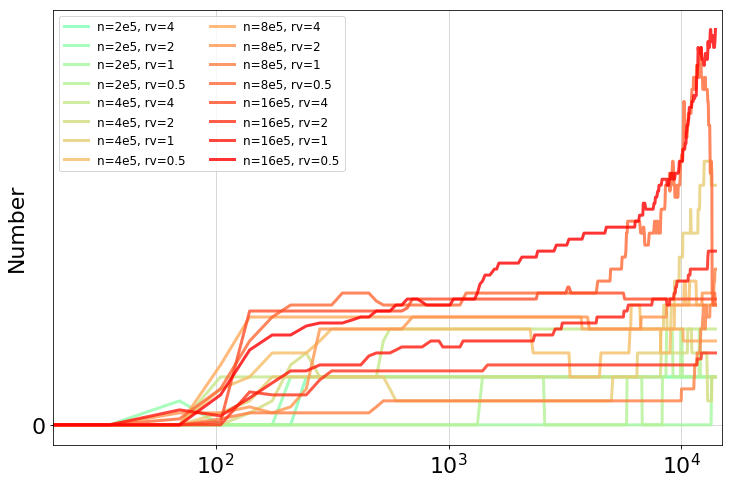

In [2]:
##Plot number of pulsars vs. time for non-dissolved models only
##sort in groups of mass and rv
data_mass_rv = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_mass_rv_age_nondissolved.dat')
#print(data_mass_rv[:,64])

rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
cs = cm.rainbow(np.linspace(0.5, 1, 16))
cmap=matplotlib.colors.ListedColormap([cs[0],cs[1],cs[2],cs[3],cs[4],cs[5],cs[6],cs[7],
                                       cs[8],cs[9],cs[10],cs[11],cs[12],cs[13],cs[14],cs[15]])
matplotlib.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(nrows=1, figsize = (12,8))#figsize = (18,25), 
for z in range(4):
    for z1 in range(4):
        #print((z*4+1)+z1,(z*4+17)+z1)
        axs.plot(data_mass_rv[:,0], data_mass_rv[:,(z*4+1)+z1]/float(mass_label[z]), 
                 label = 'n='+mass_label[z]+', rv='+rv_label[z1], 
                 color = cs[z*4+z1], lw = 3, alpha=0.8)
        #axs.plot(data_mass_rv[:,0], data_mass_rv[:,(z*4+17)+z1], color = cs[z*4+z1], 
        #         ls = 'dotted', lw = 4, alpha = 0.8)
    

axs.set_xscale('symlog')
axs.set_yscale('symlog')
axs.set_xlim(xmin = 20, xmax=15000)
#axs[0].set_xlabel('time(Myr)')
axs.set_ylabel('Number')
axs.legend(loc='best')
#axs[0].set_xticks(xticks)
#axs[0].set_yticks(yticks)
#axs[0].set_yticklabels(["$%d$" % y for y in yticks], fontsize=20)
axs.grid(True, alpha = 0.6)
axs.legend(loc='best', ncol=2, fontsize=12)

plt.subplots_adjust(hspace=0.05)
#plt.tight_layout()
#plt.savefig('/projects/b1095/syr904/projects/GCE/plots/Nmsp_age.pdf', dpi = 300)

In [7]:
def addColorbar(
    ax,cmap,
    vmin,vmax,
    label,logflag = 0,
    fontsize=26,cmap_number=0,
    tick_tuple=None):
    if logflag:
        from matplotlib.colors import LogNorm as norm
        ticks = np.linspace(np.log10(vmin),np.log10(vmax),5,endpoint=True)
        tick_labels= [r"$10^{%.1f}$"%tick for tick in ticks]
        ticks = 10**ticks
    else:
        from matplotlib.colors import Normalize as norm
        ticks = np.linspace(vmin,vmax,5,endpoint=True)
        tick_labels= ticks
    
    if tick_tuple is not None:
        ticks,tick_labels = tick_tuple

    fig = ax.get_figure()
    
    ## x,y of bottom left corner, width,height in percentage of figure size
    ## matches the default aspect ratio of matplotlib
    cur_size = fig.get_size_inches()*fig.dpi

    cur_height = cur_size[1]
    cur_width = cur_size[0]
    offset = 0. + cmap_number*(25/cur_width+50/cur_width)

    ax1 = fig.add_axes([1. + offset, 0.13, 25./cur_width, 0.9])

    cb1 = matplotlib.colorbar.ColorbarBase(
        ax1, cmap=cmap,
        #extend='both',
        extendfrac=0.05,
        norm=norm(vmin=vmin,vmax=vmax),
        orientation='vertical')


    cb1.set_label(label,fontsize=fontsize)

    cb1.set_ticks(ticks)
    cb1.set_ticklabels(tick_labels)
    cb1.ax.tick_params(labelsize=fontsize-2)
    return cb1,ax1

66.0
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]


/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]
[1080.  360.]


/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


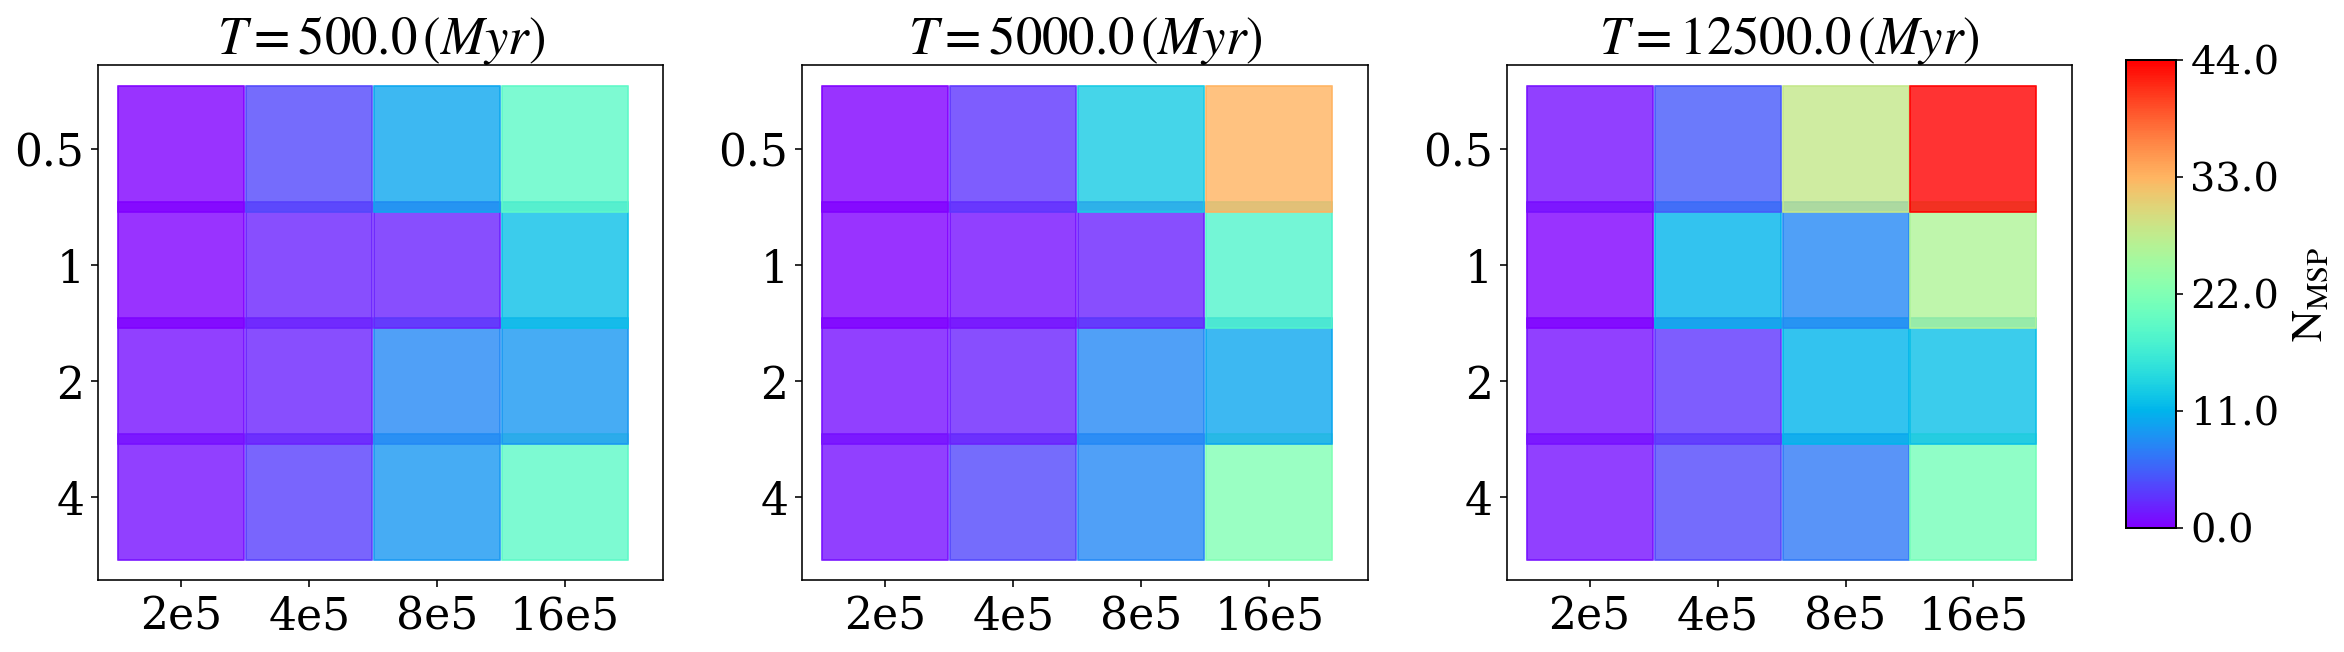

In [59]:
##Plot number of pulsars as a function of N and Rv at different times
##Non-dissolved models only
data_mass_rv = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_mass_rv_age_nondissolved.dat')
tmyr = data_mass_rv[:,0]

rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']

time_step = [500, 5000, 12500] ##in Myr
Twoaxis = [0,1,2,3]
    
##Finf the maximum number of MSPs
nmsp_max=0
for kk in range(16):
    if np.max(data_mass_rv[:,kk+1])>nmsp_max:
        nmsp_max=np.max(data_mass_rv[:,kk+1])
    
print(nmsp_max)
nmsp_max = float(nmsp_max)
    
colormap = plt.cm.rainbow #or any other colormap
normalize = matplotlib.colors.Normalize(vmin=0, vmax=44)
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
for ii in range(len(time_step)):
    for zz in range(len(tmyr)):
        if tmyr[zz]>=time_step[ii]:
            for xx in range(4):
                for yy in range(4):
                    #print(data_mass_rv[:,(xx*4+1)+yy][zz])
                    axs[ii].scatter(xx, yy, marker='s', c=data_mass_rv[:,(xx*4+1)+yy][zz],
                                    cmap=colormap, norm=normalize,
                                    s=4000, alpha=0.8)
                    axs[ii].xaxis.set_major_locator(plt.MaxNLocator(4))
                    axs[ii].yaxis.set_major_locator(plt.MaxNLocator(4))    
                    
                    axs[ii].set_xticks(Twoaxis)
                    axs[ii].set_xticklabels(mass_label)
                    axs[ii].set_yticks(Twoaxis)
                    axs[ii].set_yticklabels(rv_label)
                    addColorbar(axs[ii], plt.get_cmap('rainbow'), 0., 44., 
                                label=r"$\rm{N_{MSP}}$")
                    axs[ii].set_title(r'$T=%.1f\,(Myr)$'%time_step[ii])
                    
            break                                         

fig.tight_layout()
#fig.savefig(figsave+'test.pdf', dpi=fig.dpi, bbox_inches='tight')

4.0
400
3.0


/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


7.0
400
5.0
2.0
400
2.0
11.0
400
9.0
10.0
400
10.0
14.0
400
14.0
16.0
400
12.0
9.333333333333334
400
6.0
11.0
400
8.0


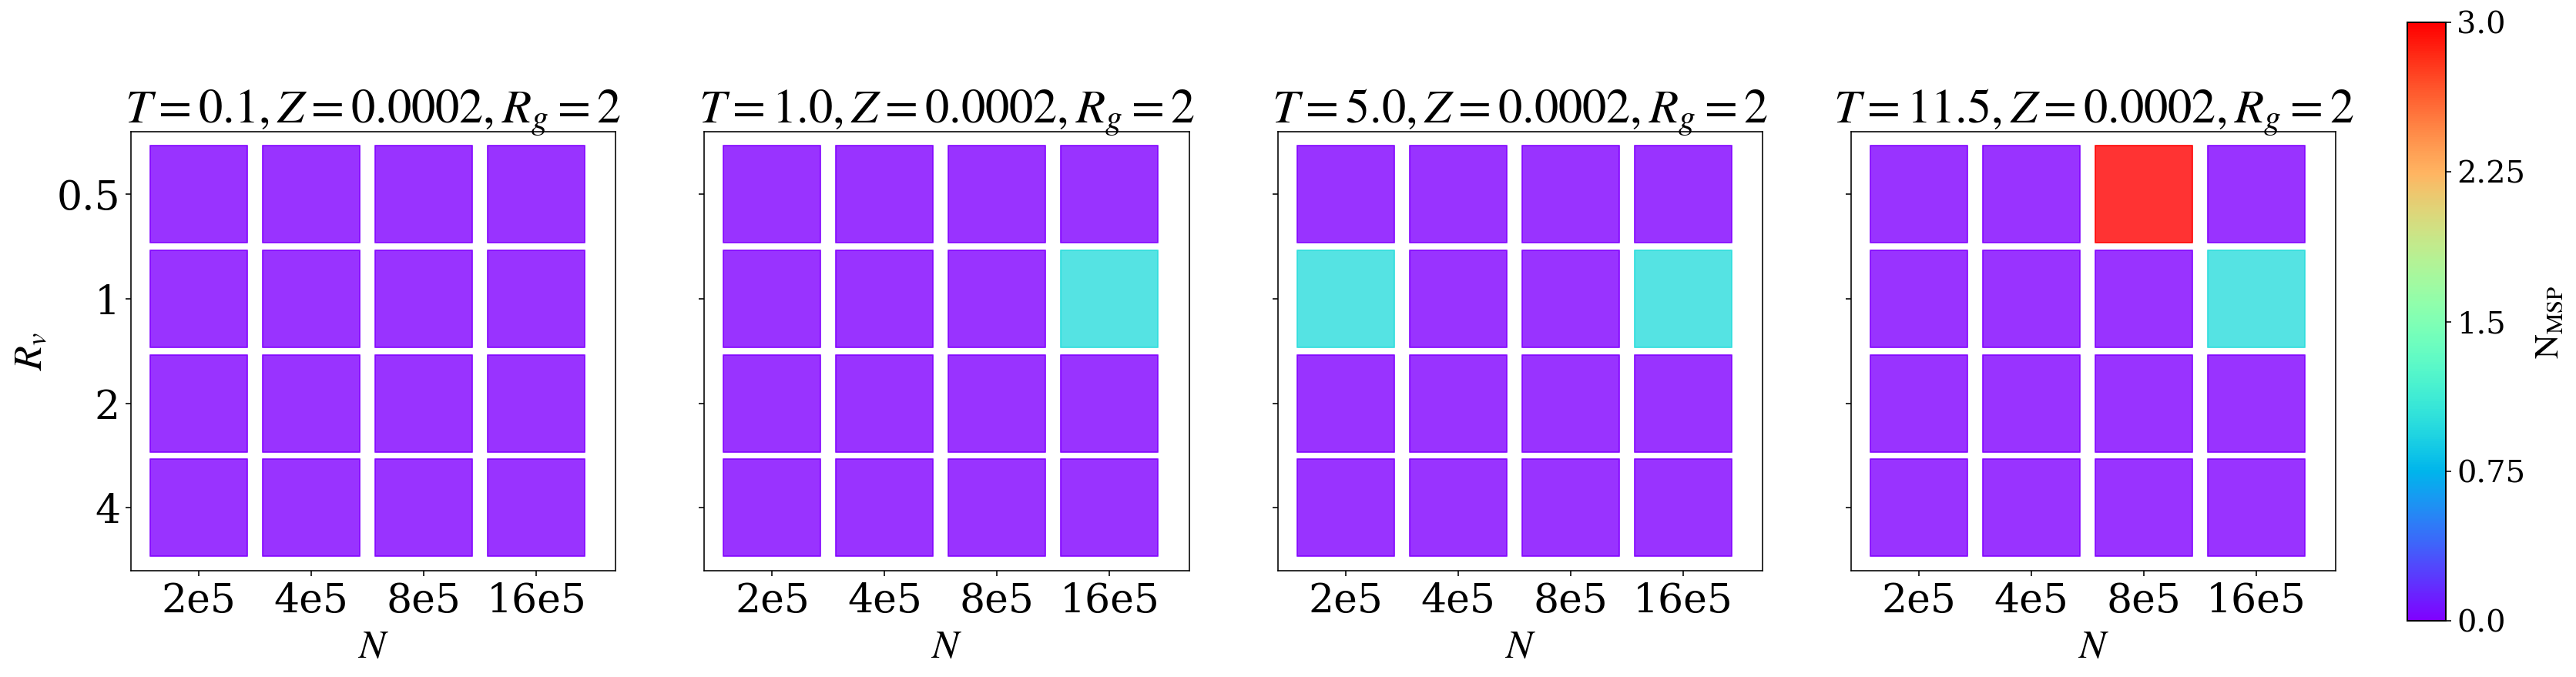

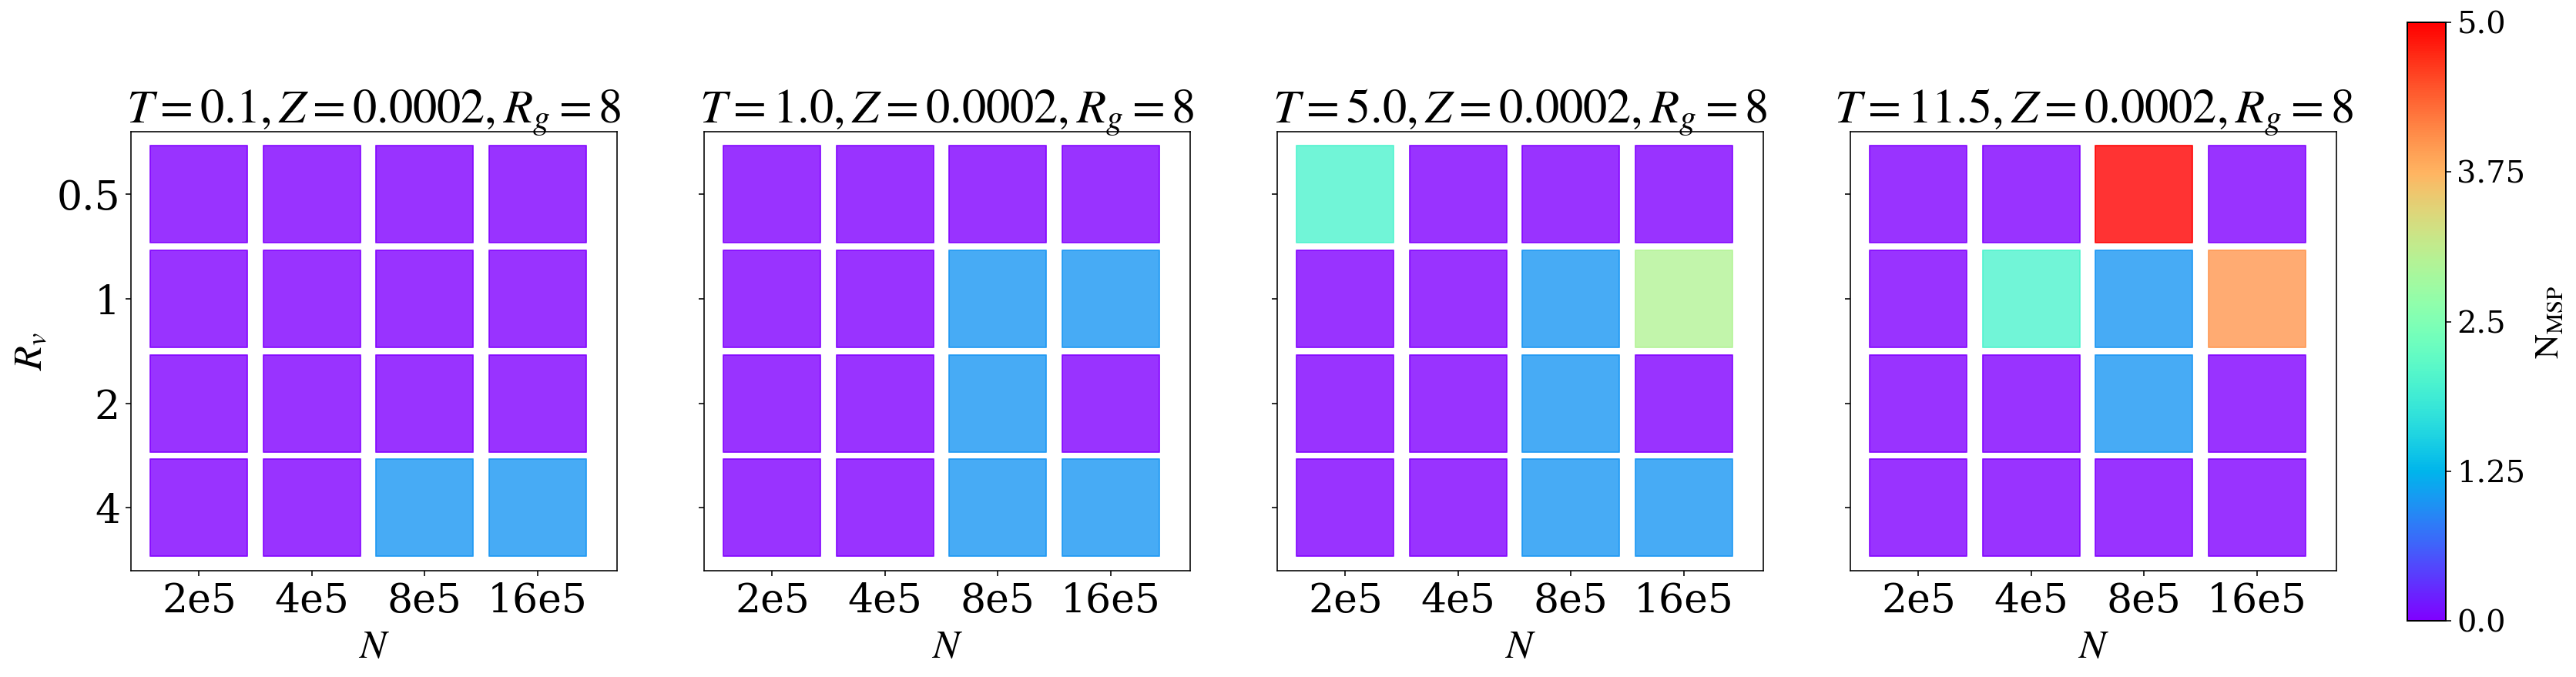

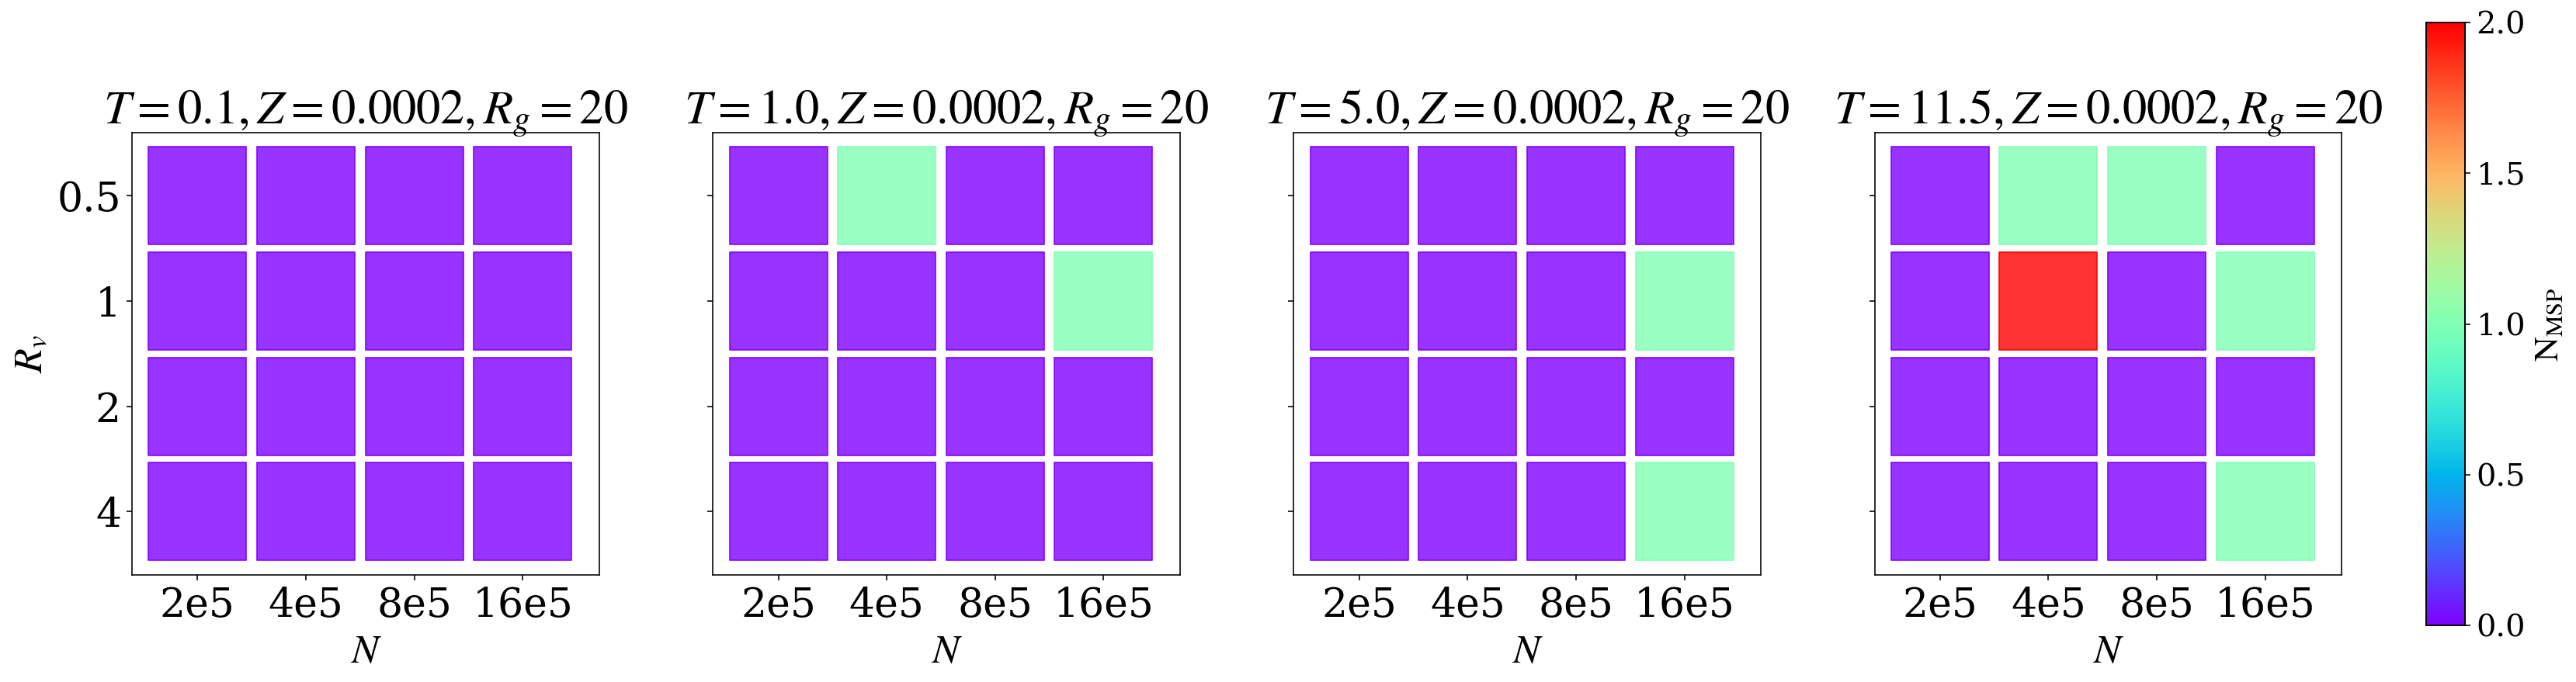

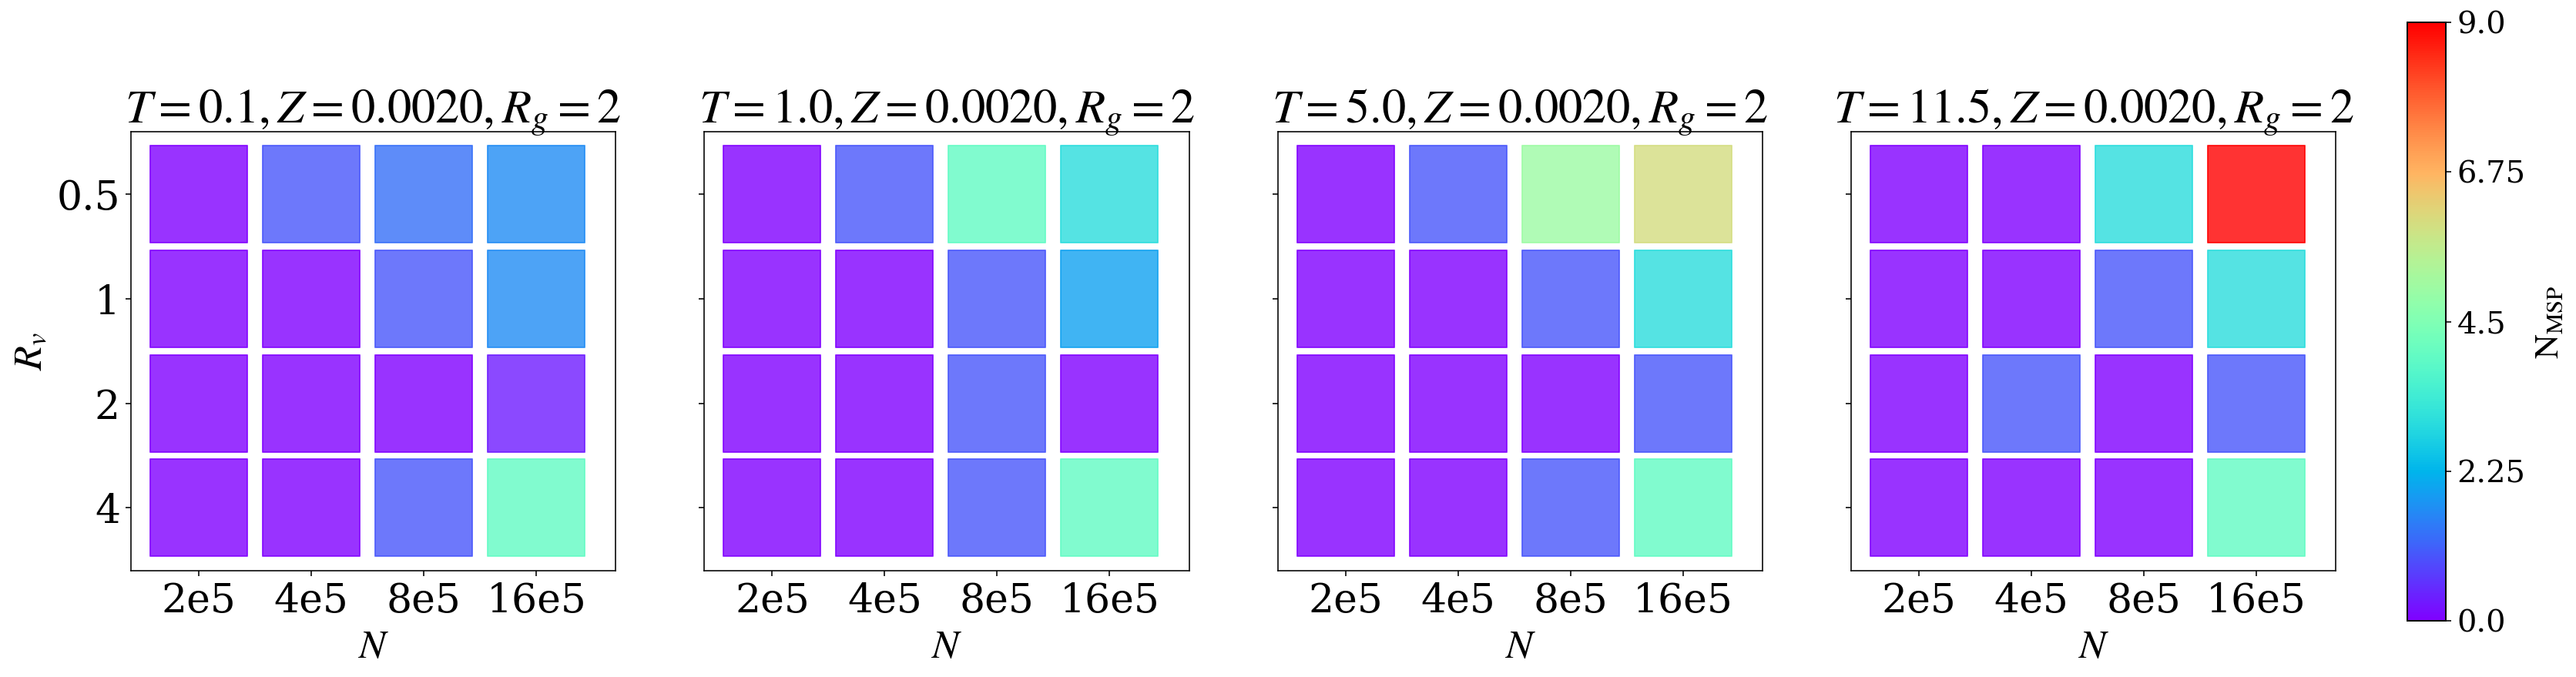

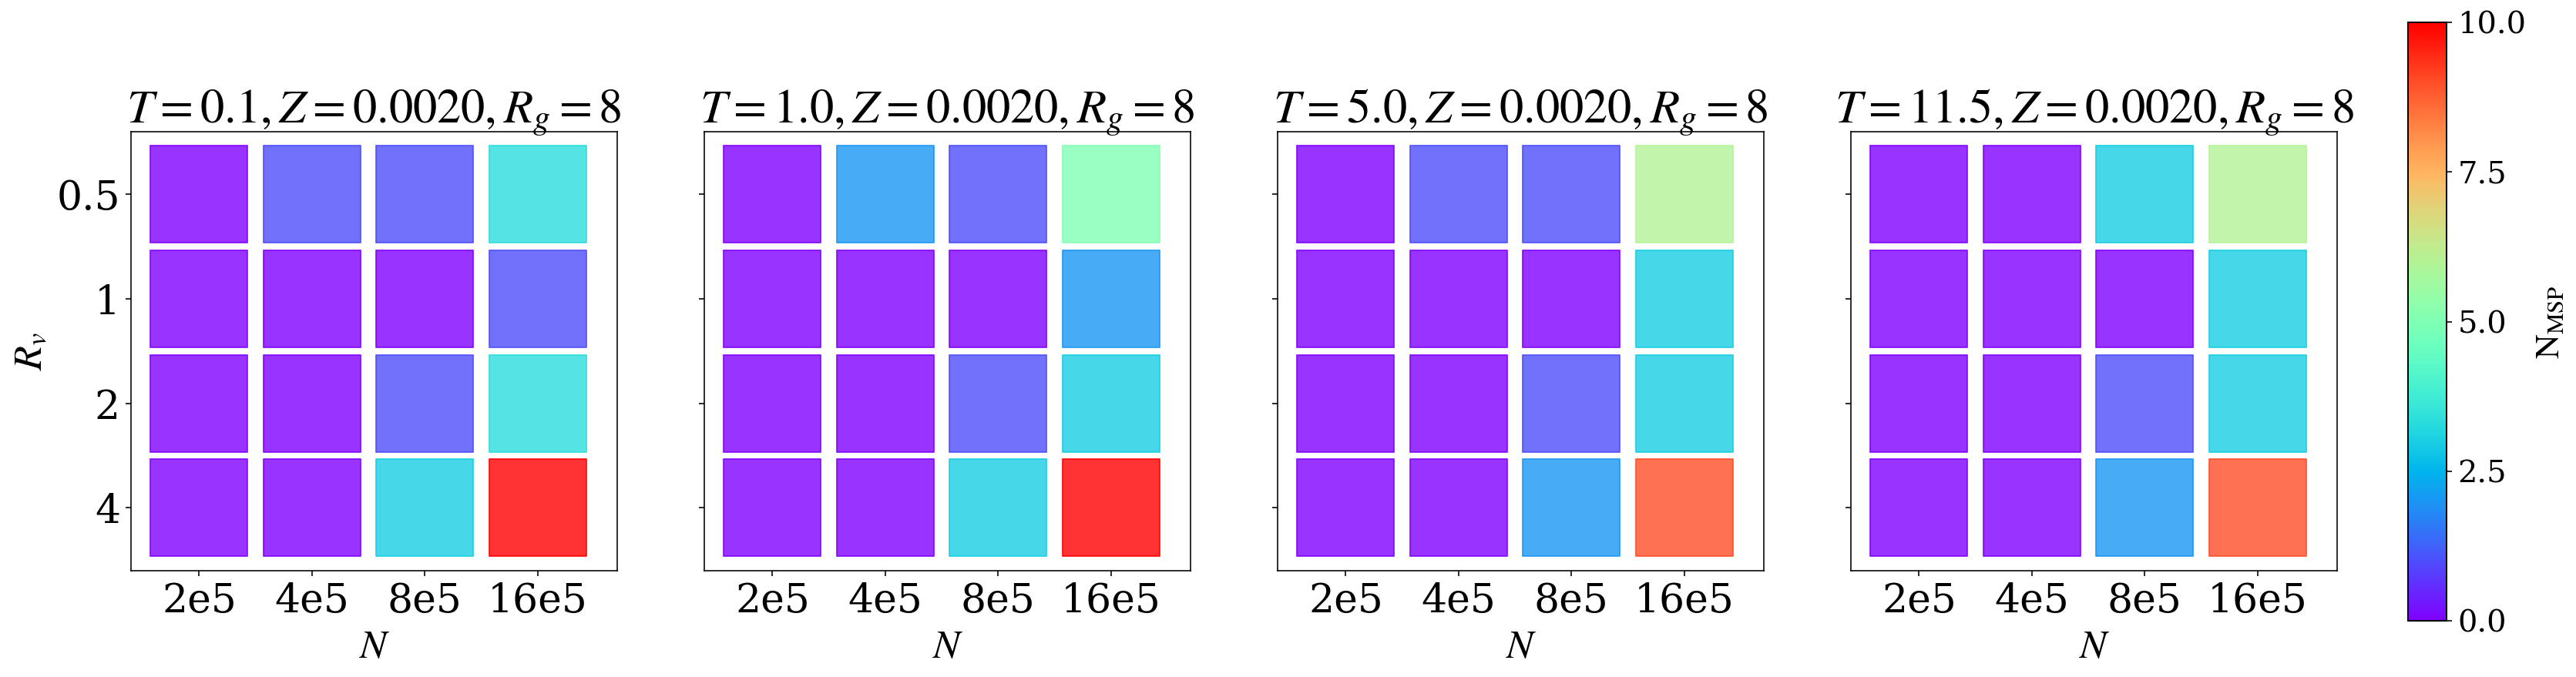

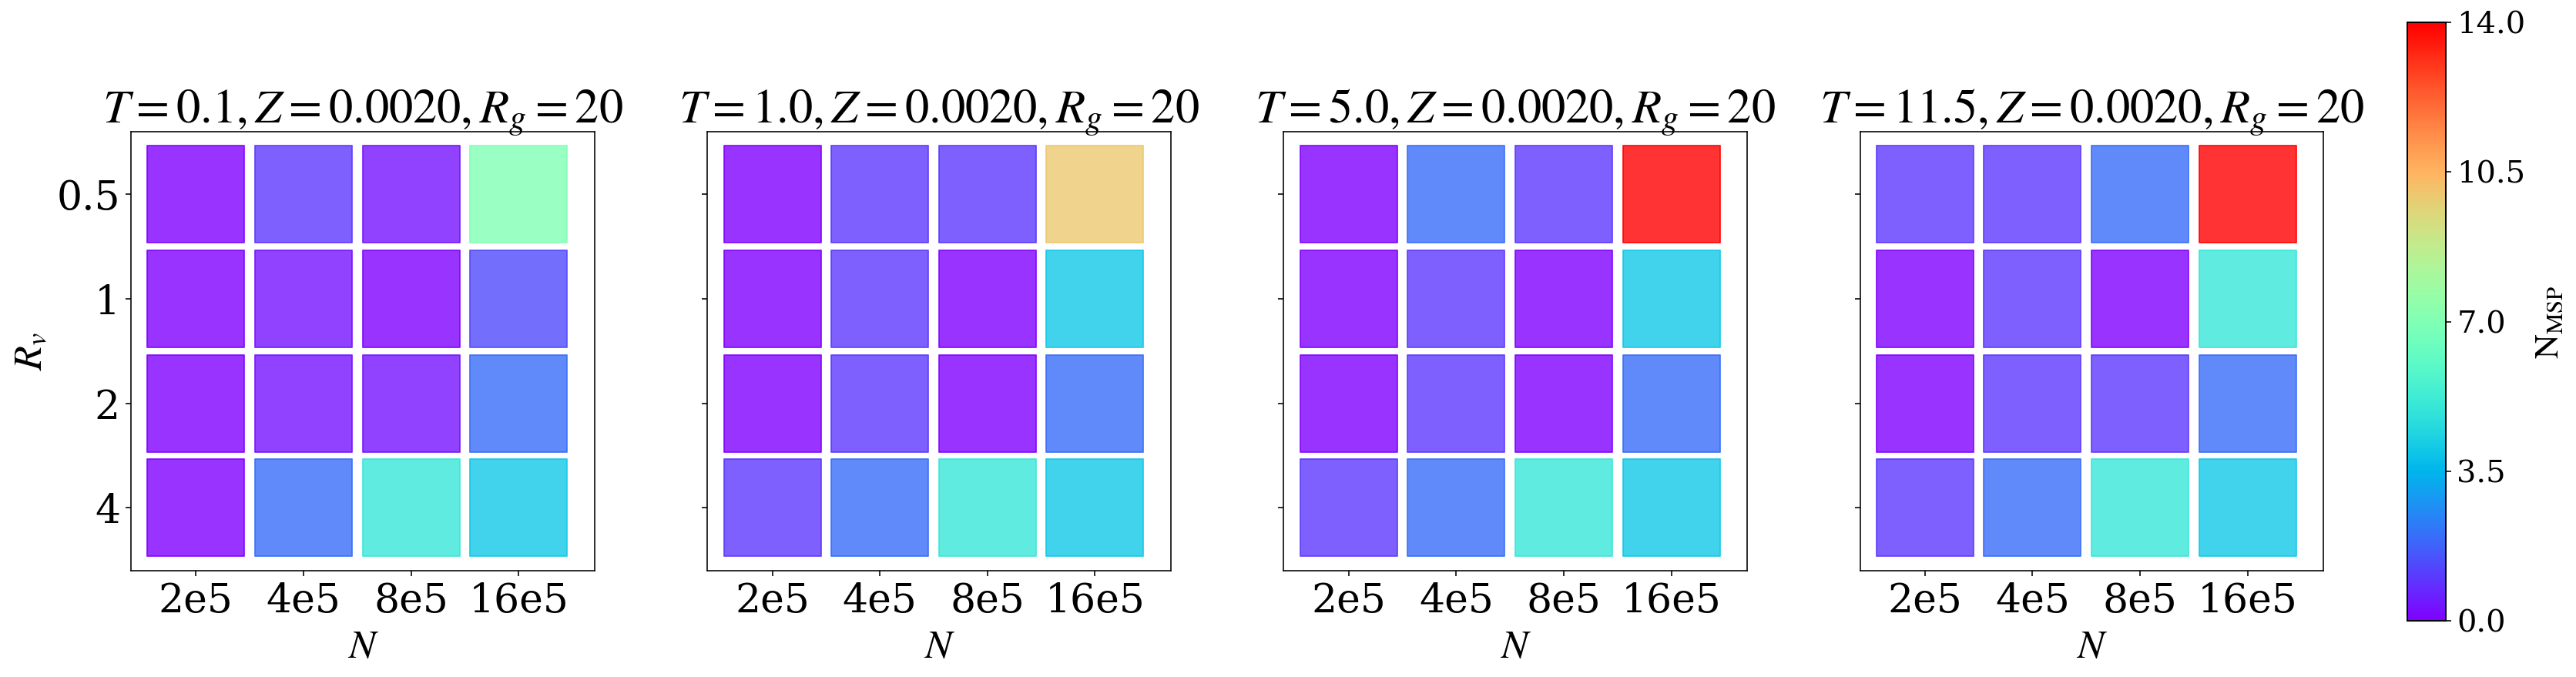

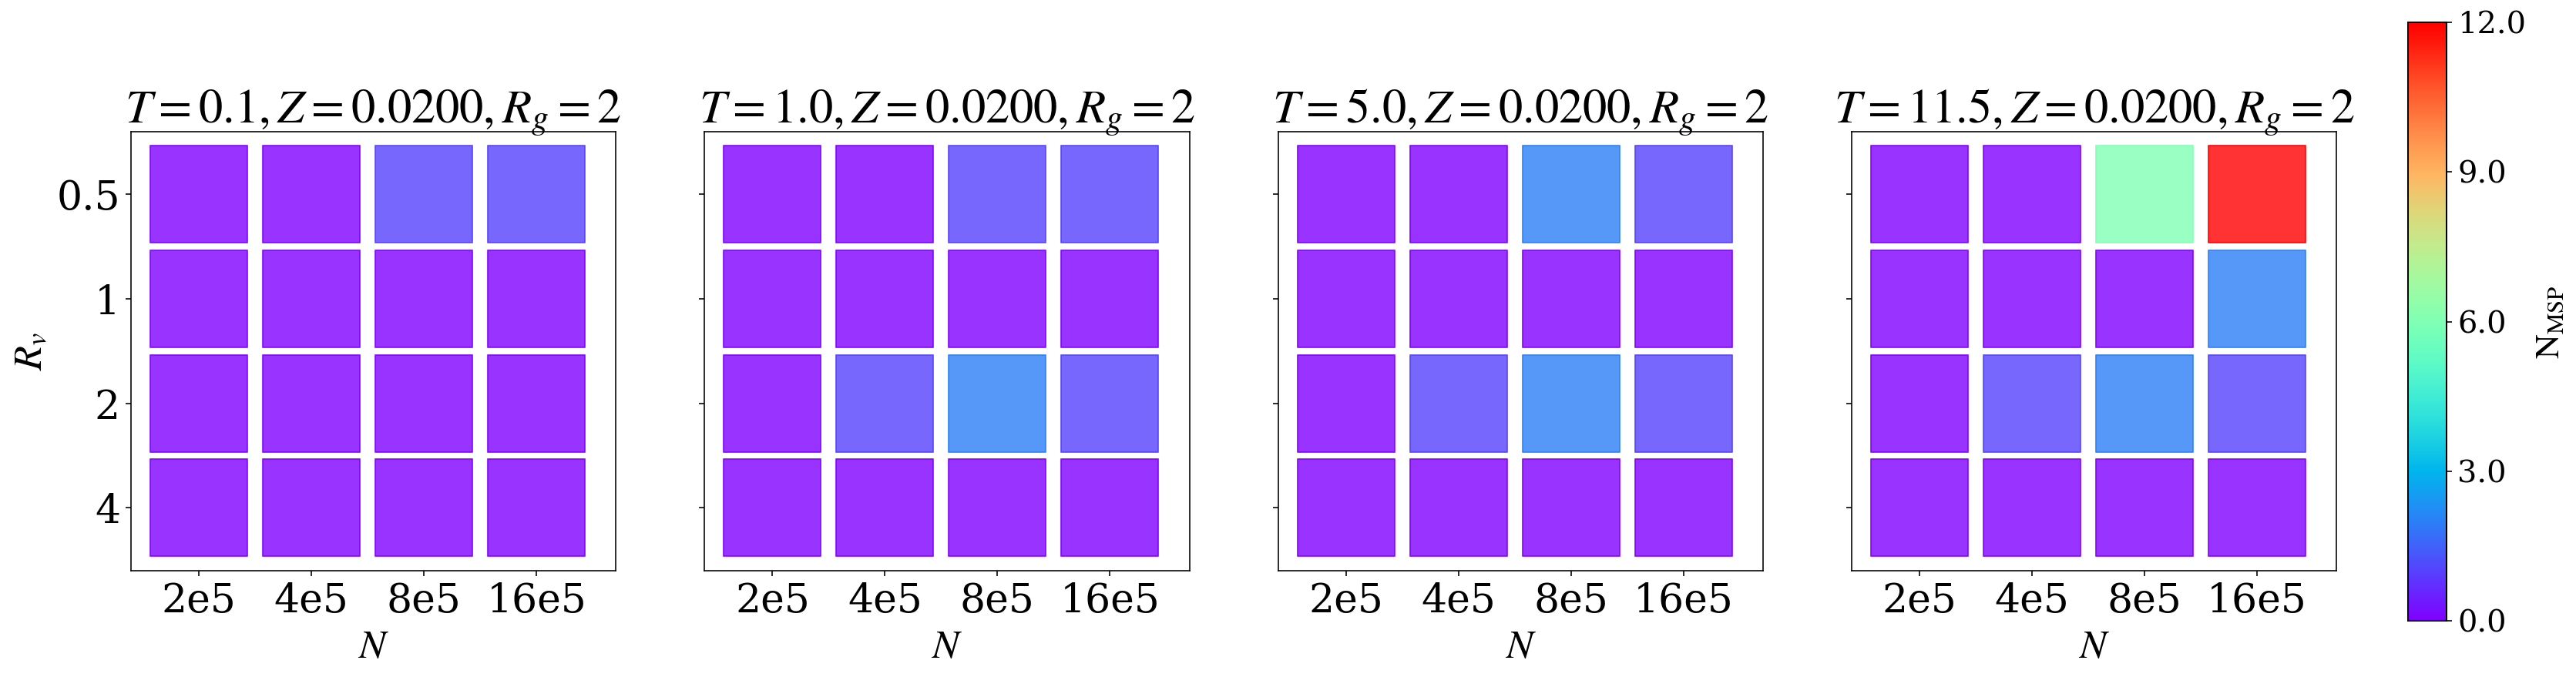

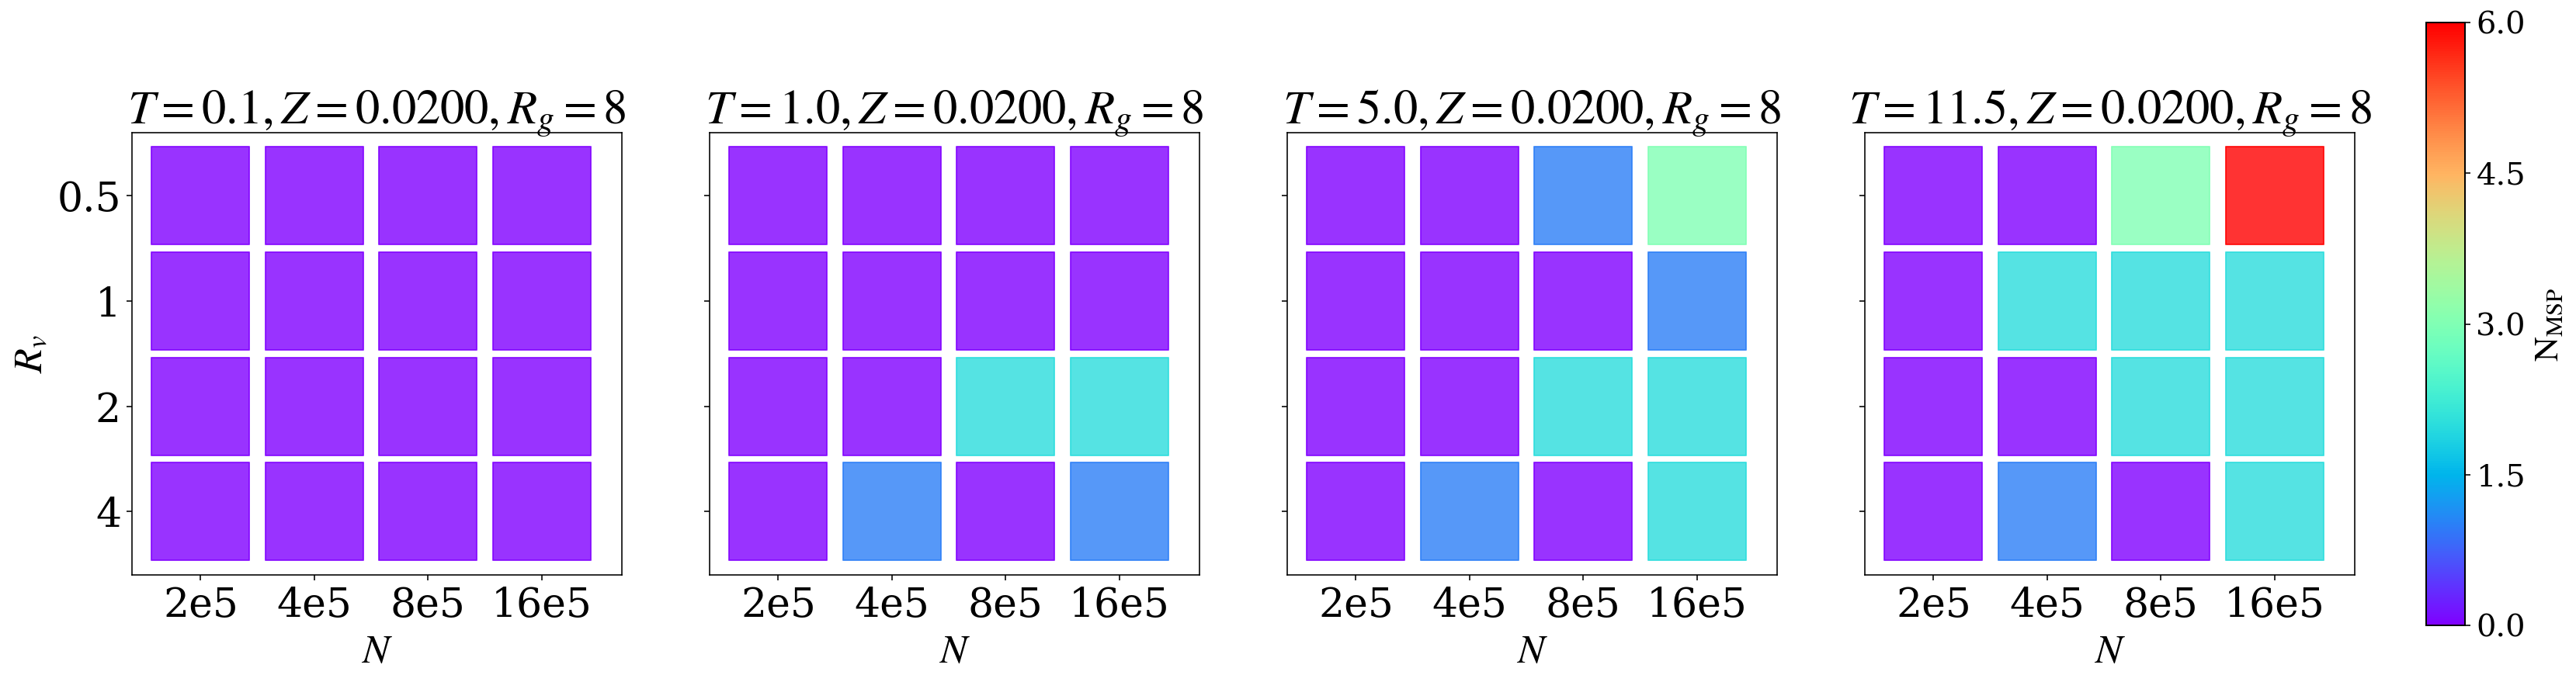

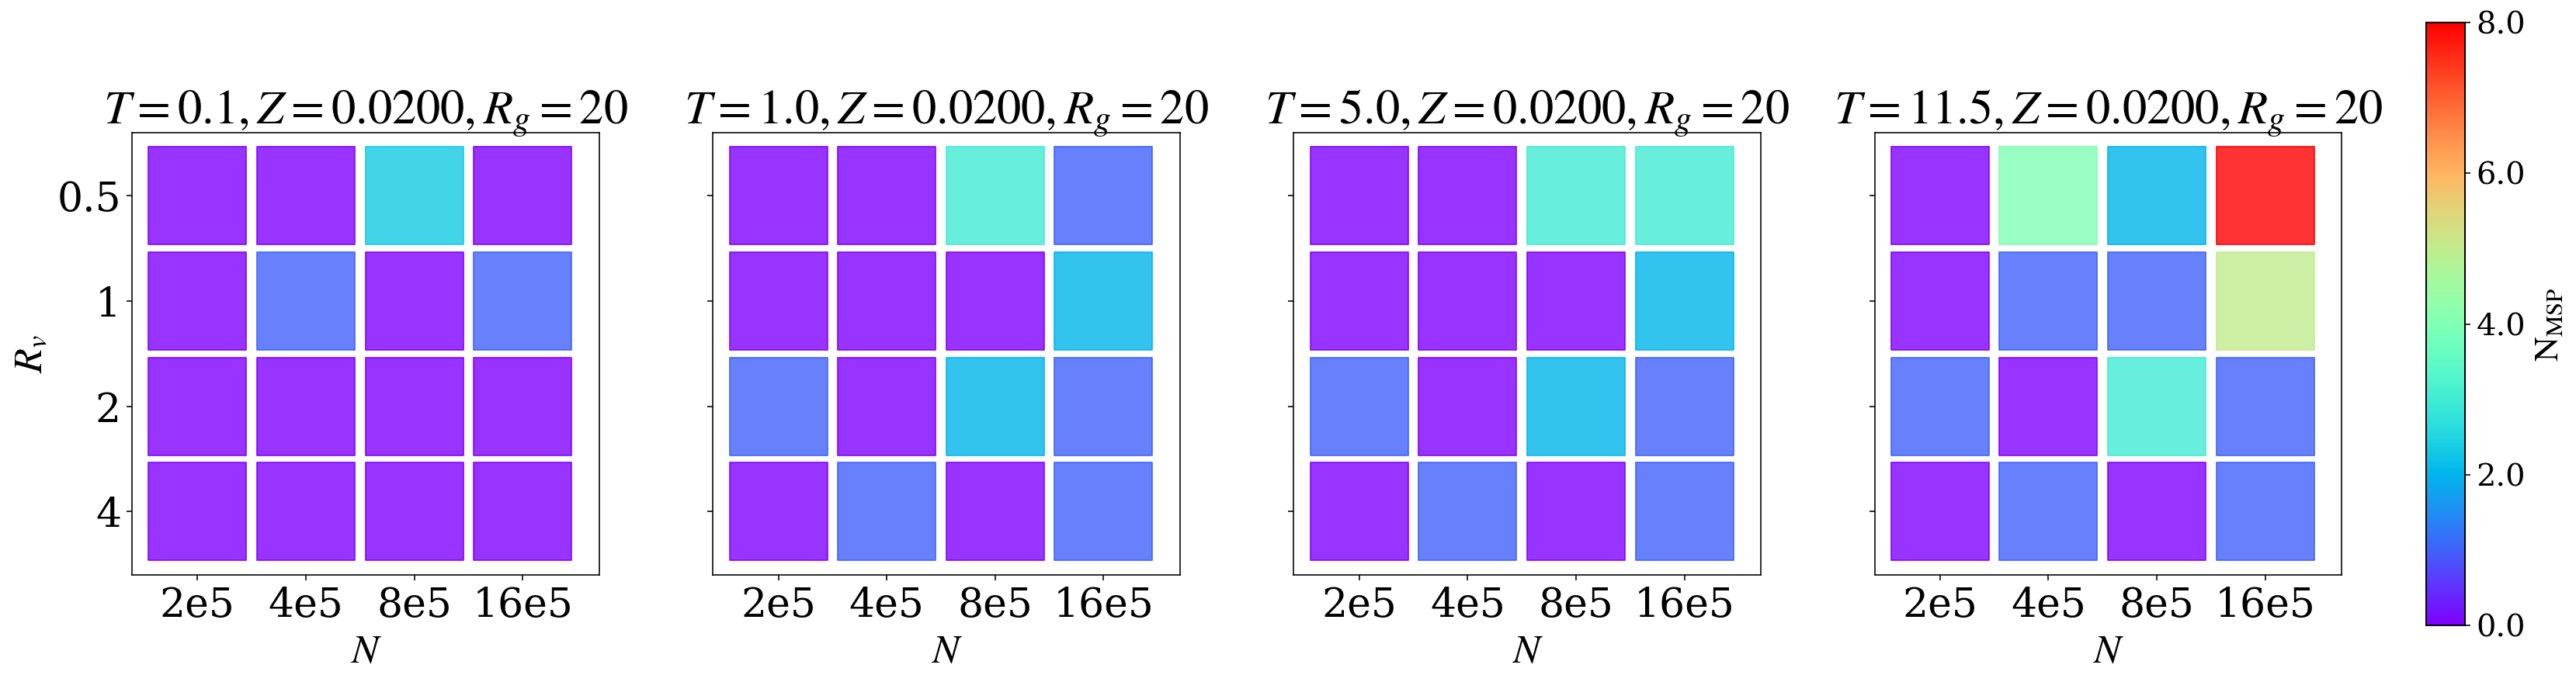

In [8]:
##Plot number of pulsars as a function of N and Rv at different times 
##for different metallicity and galactocentric distance
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', 
                         dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

bin_size = 400

Nstar = [200000.,400000.,800000.,1600000.]
RV = [4.,2.,1.,0.5]
Zmetal = [0.0002,0.002,0.02]
RG = [2.,8.,20.]
rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']


time_step = [0.1,1.,5.,11.5] ##in Myr
Twoaxis = [0,1,2,3]

matplotlib.rcParams.update({'font.size': 26})

for aa in range(3):
    for bb in range(3):
        t_all = np.linspace(0, 13000., bin_size+1)
        n_mass_rv = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
        for kk in range(0, 144):
            #print(paths[kk])

            ##Initial Conditions
            s=paths[kk].split('/')
            n_star=float(s[-2])
            z=float(s[-3][1:])
            rg=int(s[-4][2:])
            rv=float(s[-5][2:])
            
            if z!=Zmetal[aa] or rg!=int(RG[bb]):
                continue
        
            t_conv = dyn.conv('t', paths[kk]+'initial.conv.sh')
            m_conv = dyn.conv('m', paths[kk]+'initial.conv.sh')

            datans = np.genfromtxt(paths[kk]+'initial.ns.dat')
            times = datans[:,0]*t_conv
            n_psr = datans[:,5]; n_msp = datans[:,6]
         
            ##Interpolate the number of NS data
            f = interp1d(times, n_msp, kind='nearest')
            t_interpld = np.linspace(0, np.max(times), 3*bin_size)
            n_msp_new = f(t_interpld)
            #print(n_msp_new)

            for jj in range(len(t_all)-1):
                #print(jj)
                n_mass_rv_temp = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
                count_mass_rv = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
            
                ##Group by initial mass and initial rv
                for xx in range(4):
                    if n_star==Nstar[xx]:
                        for yy in range(4):
                            if rv==RV[yy]:
                                for i in range(len(t_interpld)):
                                    if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                                        n_mass_rv_temp[xx][yy]+=n_msp_new[i]
                                        count_mass_rv[xx][yy]+=1
                #print(n_mass_rv_temp)
 
                                if count_mass_rv[xx][yy]!=0:
                                    n_mass_rv_temp[xx][yy] = float(n_mass_rv_temp[xx][yy])/float(count_mass_rv[xx][yy])

                                n_mass_rv[xx][yy].append(n_mass_rv_temp[xx][yy])
        
        t_all = np.delete(t_all , 0)
        
        ##Find the maximum number of msp
        nmsp_max=0
        print(np.max(n_mass_rv))
        print(len(t_all))
        for ii in range(len(time_step)):
            for zz in range(len(t_all)):
                if t_all[zz]/1000.>=time_step[ii]:
                    for xx in range(4):
                        for yy in range(4):
                        #print(len(n_mass_rv[xx][yy]))
                            if n_mass_rv[xx][yy][zz]>nmsp_max:
                                nmsp_max=n_mass_rv[xx][yy][zz]
                    break
        print(nmsp_max)
    
        colormap = plt.cm.rainbow #or any other colormap
        normalize = matplotlib.colors.Normalize(vmin=0, vmax=nmsp_max)
        fig, axs = plt.subplots(ncols=4, sharey =True, figsize=(22,6))
        for ii in range(len(time_step)):
            for zz in range(len(t_all)):
                if t_all[zz]/1000.>=time_step[ii]:
                    #print(t_all[zz])
                    for xx in range(4):
                        for yy in range(4):
                            #print(n_mass_rv[xx][yy])
                            axs[ii].scatter(xx, yy, marker='s', c=n_mass_rv[xx][yy][zz],
                                            cmap=colormap, norm=normalize,
                                            s=4000, alpha=0.8, rasterized = True)
                            axs[ii].xaxis.set_major_locator(plt.MaxNLocator(4))   
                            
                            axs[ii].set_xticks(Twoaxis)
                            axs[ii].set_xticklabels(mass_label)
                            axs[ii].set_xlabel(r'$N$')
                            
                            axs[ii].set_title(r'$T=%.1f, Z=%.4f, R_g=%d$'%(time_step[ii],Zmetal[aa],RG[bb]))
                            
                    axs[0].yaxis.set_major_locator(plt.MaxNLocator(4)) 
                    axs[0].set_yticklabels(rv_label)
                    axs[0].set_yticks(Twoaxis)
                    axs[0].set_ylabel(r'$R_v$')
                    addColorbar(axs[3], plt.get_cmap('rainbow'), 0., nmsp_max, 
                                        label=r"$\rm{N_{MSP}}$")
                    
                    break                                         
        plt.subplots_adjust(wspace=0.02)
        fig.tight_layout()
        
        fig.savefig(figsave+'Z'+str(Zmetal[aa])+'_Rg'+str(RG[bb])+'.jpg', dpi=fig.dpi, bbox_inches='tight')

In [10]:
##Number of pulsars as a function of N and Rv at different times that are ejected
##for different metallicity and galactocentric distance
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', 
                         dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

Nstar = [200000.,400000.,800000.,1600000.]
RV = [4.,2.,1.,0.5]
Zmetal = [0.0002,0.002,0.02]
RG = [2.,8.,20.]
rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']

        
n_max_ej = []
n_sum_ej = []
for kk in range(0, 144):
    s=paths[kk].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    if rg>2:
        continue
        
    t_conv = dyn.conv('t', paths[kk]+'initial.conv.sh')
        
    datans = np.genfromtxt(paths[kk]+'initial.esc_ns.dat')
    if len(datans)==0:
        #print('no ejection')
        continue
    elif len(datans)==1:
        #print('one ejection')
        continue
    else:
        #print('multiple ejections')
        times = datans[:,0]*t_conv
        n_psr = datans[:,5]; n_msp = datans[:,6]
        n_nswd = datans[:,9]; n_nsms = datans[:,10]
        n_nsg = datans[:,11]; n_mtb = datans[:,4]
        n_ej = n_msp+n_mtb#+n_nswd+n_nsms+n_nsg
        #print(times)
        
        n_sum_ej.append(np.sum(n_ej))
        n_max_ej.append(np.max(n_ej))
        
        #print(n_msp)
        
print(n_max_ej)
print(np.max(n_max_ej))
print(n_sum_ej)
print(np.sum(n_sum_ej))

[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 0.0, 0.0, 1.0, 0.0]
3.0
[0.0, 1.0, 0.0, 0.0, 2.0, 1.0, 4.0, 3.0, 0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 5.0, 2.0, 4.0, 4.0, 3.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 5.0, 7.0, 14.0, 0.0, 0.0, 1.0, 0.0]
94.0


[array([ 4.62414978e-02, -1.54385050e-02,  1.90737467e-03, -7.46818546e-05,
        5.97079785e-02]), array([ 7.82366429e-02, -3.10244032e-02,  4.46764583e-03, -1.79640231e-04,
        2.94894756e-01]), array([ 2.27400957e-01, -6.36583478e-02,  7.11253928e-03, -2.39048901e-04,
        6.48947039e-01]), array([ 8.24925472e-01, -1.90086842e-01,  1.84290455e-02, -5.79800863e-04,
        1.19928784e+00])] [array([5.16684408e-03, 1.61075458e-03, 1.85705838e-04, 7.07259074e-06,
       4.86753390e-03]), array([9.41122410e-03, 2.93393258e-03, 3.38256625e-04, 1.28824741e-05,
       8.86604137e-03]), array([1.69047331e-02, 5.27002084e-03, 6.07587063e-04, 2.31399004e-05,
       1.59254588e-02]), array([2.91103379e-02, 9.07509650e-03, 1.04627881e-03, 3.98474371e-05,
       2.74240052e-02])]
[array([ 0.04550858, -0.06013994]), array([-0.01084176,  0.00813092]), array([ 0.00109046, -0.00025327]), array([-3.43926674e-05, -1.13121863e-05]), array([ 0.08867306, -0.10391834])] [array([0.00172818, 0.0069

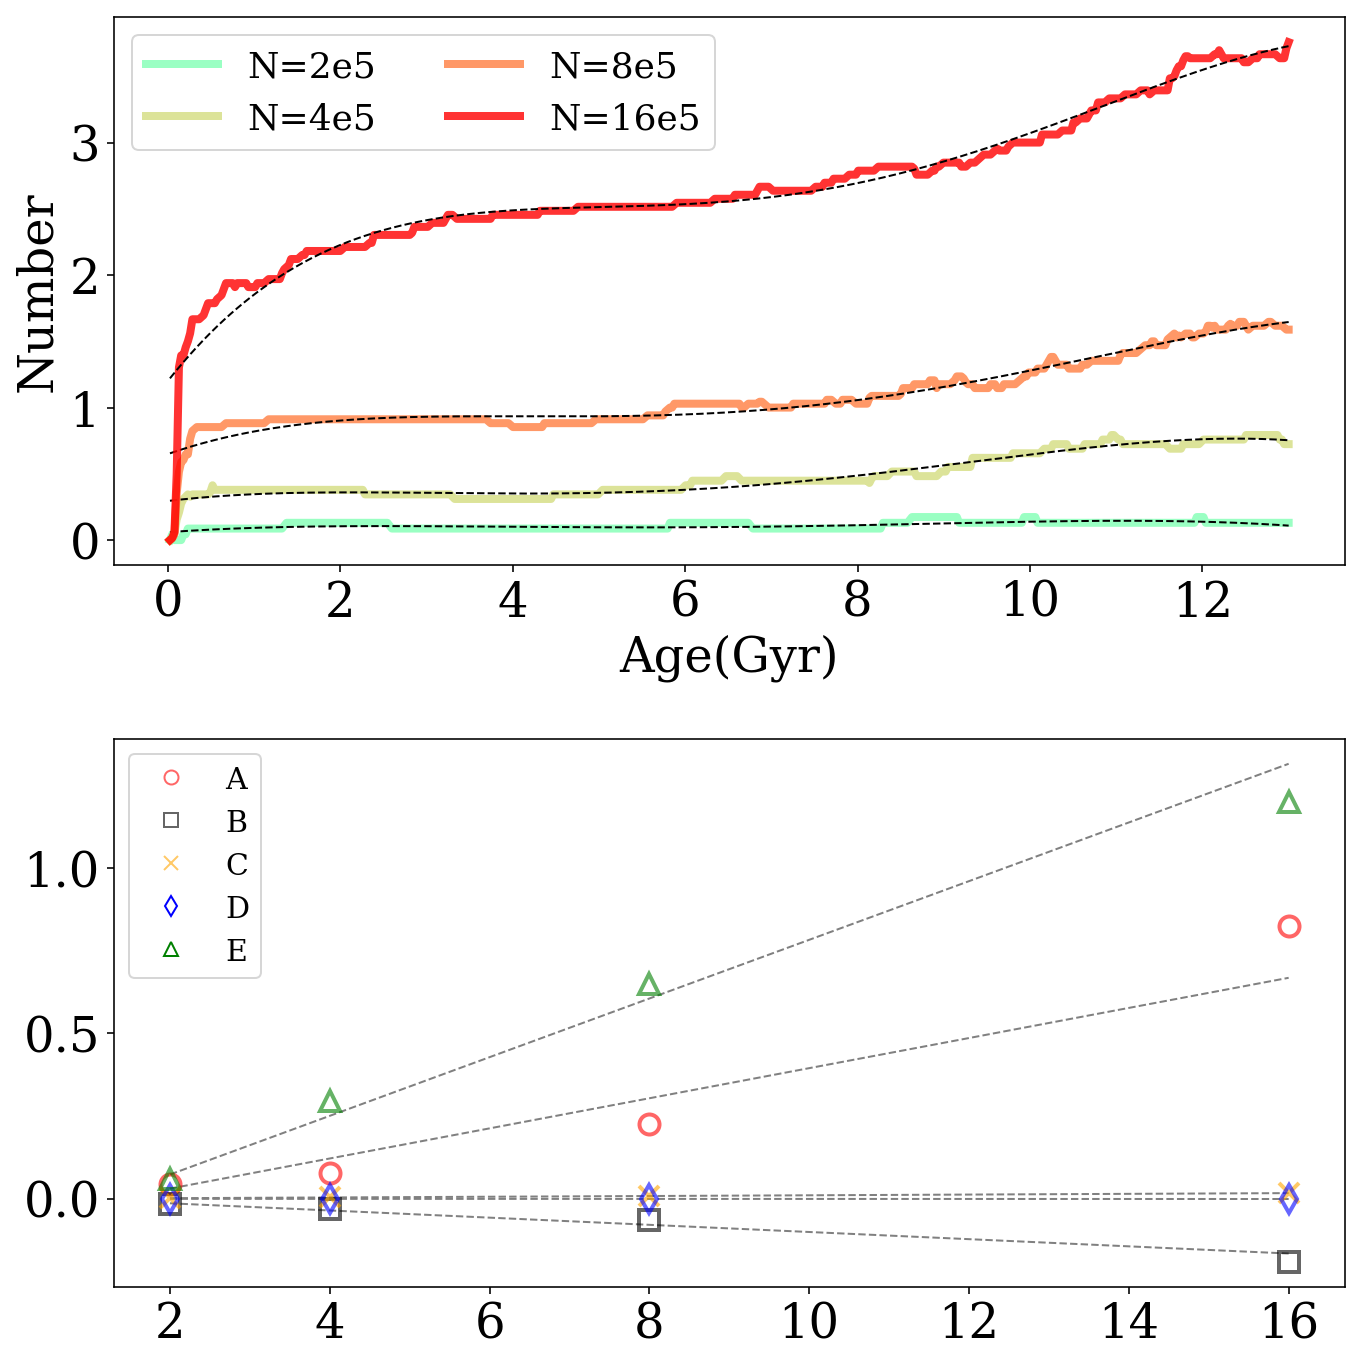

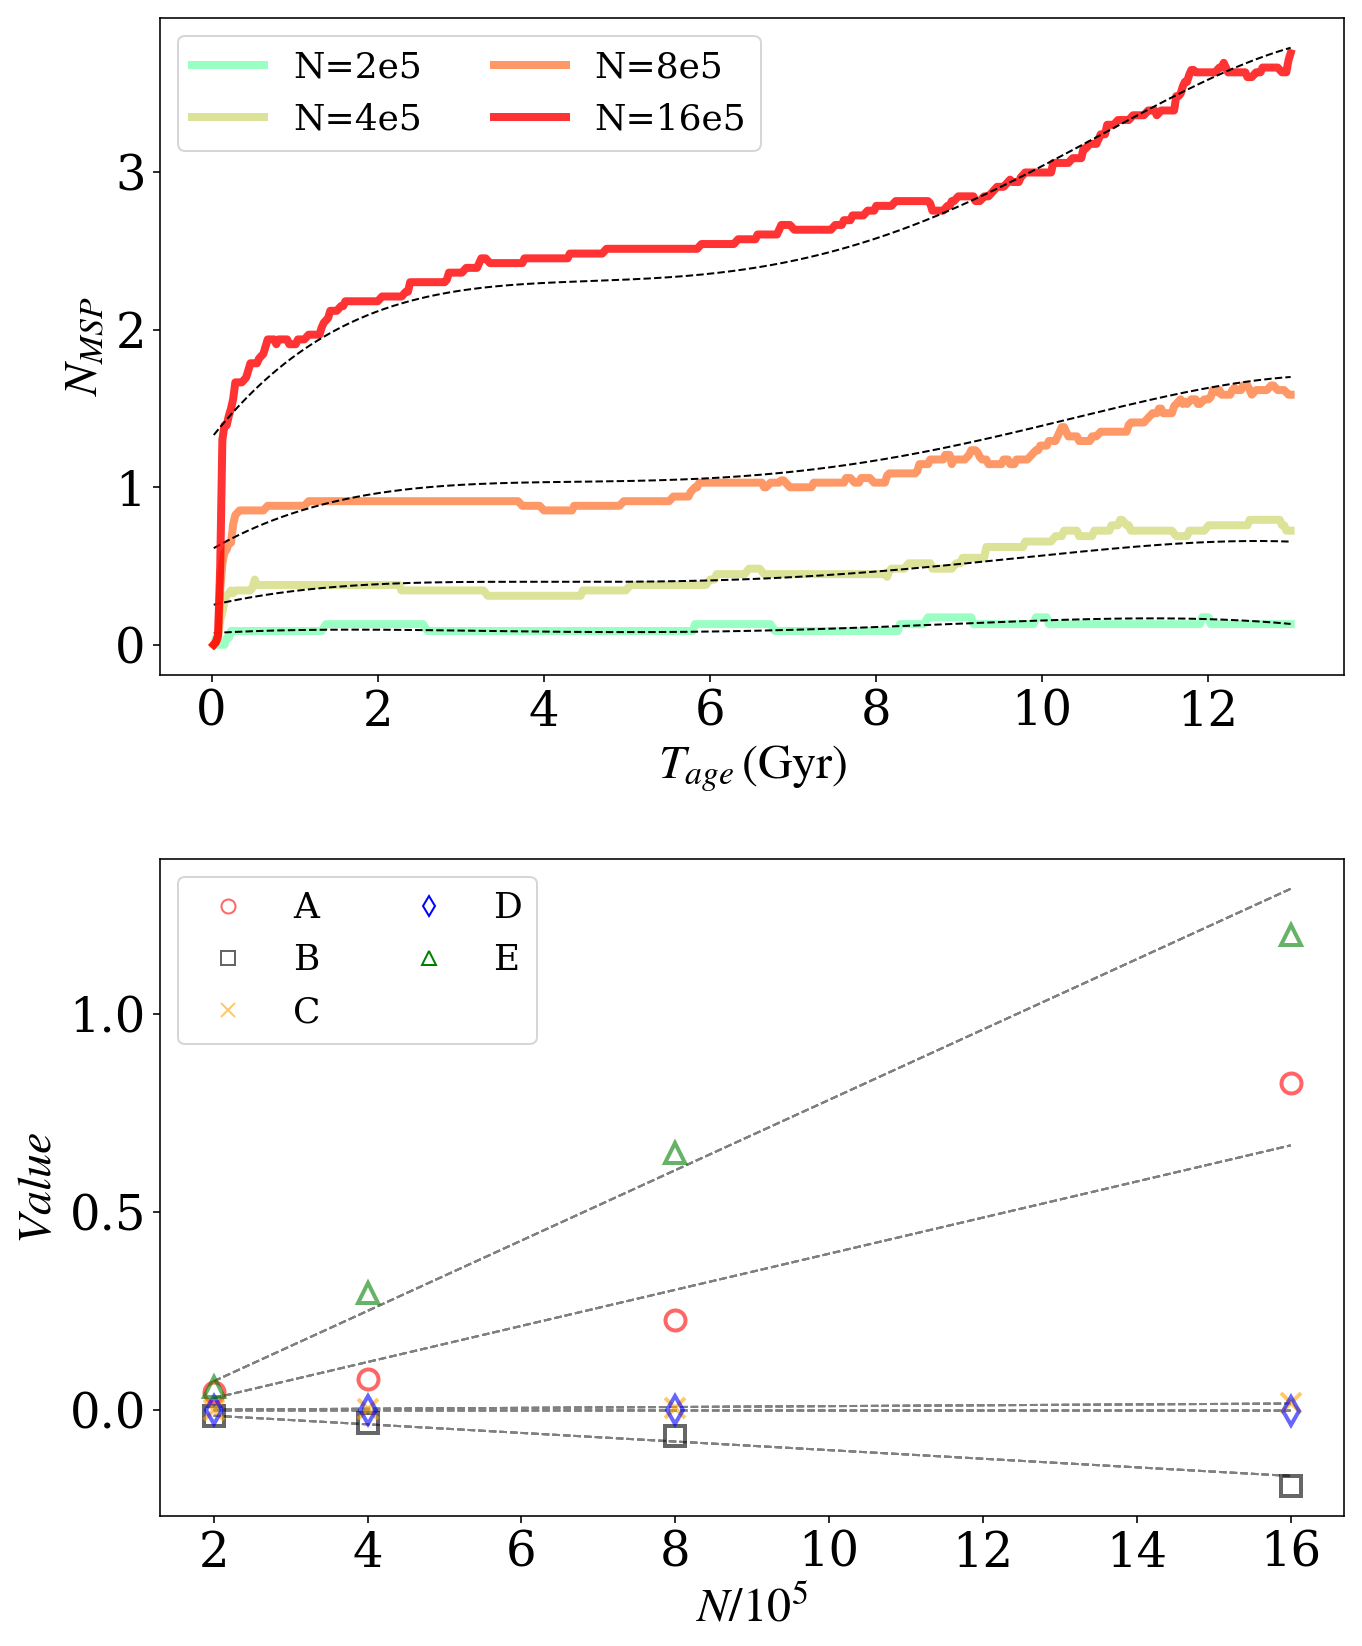

In [4]:
## Curve fitting to number of MSPs vs. time for the N-set
from scipy.optimize import curve_fit
from scipy import special

def func_tanh(input_val,A,B):
    #y = A*x + B*x**2 + C*x**3 + D*x**4 + E
    x, N = input_val
    y = A*np.tanh(x)*x+B
    #y = A*np.tanh(x)*x+B
    #y = (A*16e5+B)*x*special.erf(x)+(C*16e5+D)
    
    return y

def func_poly(input_val,A,B,C,D,E):
    x, N = input_val
    y = A*x+B*x**2+C*x**3+D*x**4+E
    
    return y

def func_poly_params(input_val,A,B):
    N = input_val
    y = A*N+B
    
    return y

data_mass = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_mass_age_nondissolved.dat')
data_rv = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rv_age_nondissolved.dat')
data_z = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_z_age_nondissolved.dat')
data_rg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rg_age_nondissolved.dat')


rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
n_grid = np.array(mass_label).astype(np.float)/1.e5
#mass_label = ['1.197630e+05', '2.423500e+05', '4.848440e+05', '9.703820e+05']
#n_grid = np.array(mass_label).astype(np.float)/0.6e5
z_label = ['0.0002', '0.002', '0.02']
rg_label = ['2', '8', '20']
tanh_label = ['A', 'B']; poly_label = ['A','B','C','D','E']
x_tanh = [1,2]; x_poly = [1,2,3,4,5]



pars_tanh_all = []; cov_tanh_all = []; stdevs_tanh_all = []
pars_poly_all = []; cov_poly_all = []; stdevs_poly_all = []
pars_poly_up = []; cov_poly_up = []; stdevs_poly_up = []
#fpar = open('/projects/b1095/syr904/projects/GCE/catalog/polyfit_params_mass_age_nondissolved.dat', 'w+')
for z in range(4):
    pars_tanh, cov_tanh = curve_fit(f=func_tanh, 
                                    xdata=(data_mass[:,0]/1000., float(mass_label[z])), ydata=data_mass[:,z+5])#,
                                    #sigma = data_mass[:,z+9],absolute_sigma=True)
    pars_poly, cov_poly = curve_fit(f=func_poly, 
                                    xdata=(data_mass[:,0]/1000., float(mass_label[z])), ydata=data_mass[:,z+5])#,
                                    #sigma = data_mass[:,z+9],absolute_sigma=True)
    stdevs_tanh = np.sqrt(np.diag(cov_tanh))
    stdevs_poly = np.sqrt(np.diag(cov_poly))
    
    #fpar.write('%f %f %f %f %f %f %f %f %f %f\n'%(pars_poly[0],pars_poly[1],pars_poly[2],pars_poly[3],pars_poly[4],
    #                                             stdevs_poly[0],stdevs_poly[1],stdevs_poly[2],stdevs_poly[3],stdevs_poly[4]))
    
    pars_tanh_all.append(pars_tanh); cov_tanh_all.append(cov_tanh); stdevs_tanh_all.append(stdevs_tanh)
    pars_poly_all.append(pars_poly); cov_poly_all.append(cov_poly); stdevs_poly_all.append(stdevs_poly)
    
    
    ####Upper Limits####
    pars_poly_u, cov_poly_u = curve_fit(f=func_poly, 
                                    xdata=(data_mass[:,0]/1000., float(mass_label[z])), 
                                          ydata=data_mass[:,z+5]+data_mass[:,z+9])#,
                                    #sigma = data_mass[:,z+9],absolute_sigma=True)
    stdevs_poly_u = np.sqrt(np.diag(cov_poly_u))
    
    pars_poly_up.append(pars_poly_u); cov_poly_up.append(cov_poly_u); stdevs_poly_up.append(stdevs_poly_u)


pars_poly_t = np.array(pars_poly_all).T
stdevs_poly_t = np.array(stdevs_poly_all).T

####Upper Limits####
pars_poly_upt = np.array(pars_poly_up).T
stdevs_poly_upt = np.array(stdevs_poly_up).T

        
cs = cm.rainbow(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
mks = ['o', 's', 'x', 'd', '^']
edcs = ['r', 'k','orange','b', 'g']
Adot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, markerfacecolor='None', alpha=0.6, label='A')
Bdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='s',
                  markersize=7, markerfacecolor='None', alpha=0.6, label='B')
Cdot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='x',
                  markersize=7, markerfacecolor='None', alpha=0.6, label='C')
Ddot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='d',
                  markersize=7, markerfacecolor='None', label='D')
Edot=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='^',
                  markersize=7, markerfacecolor='None', label='E')

matplotlib.rcParams.update({'font.size': 24})
fig,axs = plt.subplots(nrows = 2, figsize=(10,10))

for z in range(4):
    ####Over plotting data and fits
    #axs1.plot(data_mass[:,0]/1000., func_tanh((data_mass[:,0]/1000.,float(mass_label[z])), *pars_tanh), 'k-', lw=1)
    
    axs[0].plot(data_mass[:,0]/1000., data_mass[:,z+5], color = cs[z], lw = 4, alpha = 0.8,
            label = 'N='+mass_label[z])
    axs[0].plot(data_mass[:,0]/1000., func_poly((data_mass[:,0]/1000.,float(mass_label[z])), *pars_poly_all[z]), 
              'k--', lw=1)
    
    ##Plotting fit parameters and standard deviations
    #axs2.errorbar(x_tanh, pars_tanh, yerr = stdevs_tanh, 
    #              ls = 'none', color=cs[z], marker = 'o', markersize = 20, alpha=0.6)
    #axs3.errorbar(x_poly, pars_poly, yerr = stdevs_poly, 
    #              ls = 'none', color=cs[z], marker = 'o', markersize = 20, alpha=0.6)
    for kk in range(len(poly_label)):
        axs[1].errorbar(float(mass_label[z])/10.**5, pars_poly_all[z][kk],
                  ls = 'none', color=edcs[kk], marker = mks[kk], markeredgewidth=2,
                        markerfacecolor='None', markersize = 10, alpha=0.6)

#data_parsN = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/polyfit_params_mass_age_nondissolved.dat')
N_pars_poly_all = []; N_cov_poly_all = []; N_stdevs_poly_all = []  
N_pars_poly_up = []; N_cov_poly_up = []; N_stdevs_poly_up = []       
for kk in range(len(poly_label)):
    #Fitting the params to N
    N_pars_poly,N_cov_poly = curve_fit(f=func_poly_params, 
                                       xdata=n_grid,
                                       ydata=pars_poly_t[kk],#,
                                       sigma = stdevs_poly_t[kk],absolute_sigma=True)
    N_stdevs_poly = np.sqrt(np.diag(N_cov_poly))
    N_pars_poly_all.append(N_pars_poly); N_cov_poly_all.append(N_cov_poly); N_stdevs_poly_all.append(N_stdevs_poly)

    axs[1].plot(n_grid, func_poly_params(n_grid, *N_pars_poly), '--', 
                color='gray', lw=1)
    
    ####Upper Limits####
    N_pars_poly_u,N_cov_poly_u = curve_fit(f=func_poly_params, 
                                       xdata=n_grid, 
                                       ydata=pars_poly_upt[kk],#)
                                       sigma = stdevs_poly_upt[kk],absolute_sigma=True)
    N_stdevs_poly_u = np.sqrt(np.diag(N_cov_poly_u))
    N_pars_poly_up.append(N_pars_poly_u); N_cov_poly_up.append(N_cov_poly_u); N_stdevs_poly_up.append(N_stdevs_poly_u)

    
#fpar.close()
    
#axs2.set_yscale('symlog')
#axs3.set_yscale('symlog')
#axs2.set_xticks(x_tanh)
#axs2.set_xticklabels(tanh_label)
#axs3.set_xticks(x_poly)
#axs3.set_xticklabels(mass_label)
axs[0].set_ylabel('Number')
axs[0].set_xlabel('Age(Gyr)')
axs[0].legend(loc='best', ncol=2, fontsize=18)
axs[1].legend(handles=[Adot, Bdot, Cdot, Ddot, Edot], loc='best', prop={'size': 15}, numpoints=1, frameon=True)
fig.tight_layout()

#print(pars_tanh_all, stdevs_tanh_all)
print(pars_poly_all, stdevs_poly_all)
print(N_pars_poly_all, N_stdevs_poly_all)


fig, ax = plt.subplots(nrows = 2, figsize = (10,12))
for z in range(4):
    ####Over plotting data and fits  
    ax[0].plot(data_mass[:,0]/1000., data_mass[:,z+5], color = cs[z], lw = 4, alpha = 0.8,
            label = 'N='+mass_label[z])
    As = []; As_up = []
    for kk in range(len(poly_label)):
        a = N_pars_poly_all[kk][0]*float(mass_label[z])/1e5
        #b = N_pars_poly_all[kk][1]*(float(mass_label[z])/1e5)**2
        c = N_pars_poly_all[kk][1]
        #if z==1 and kk==3:
        #    a = a-N_stdevs_poly_all[kk][0]*float(mass_label[z])/1e5
        ##    #b = b-2*N_stdevs_poly_all[kk][1]*(float(mass_label[z])/1e5)**2
        #    c = c-N_stdevs_poly_all[kk][1]
        #if z==2 and kk==3:
        #    a = a+N_stdevs_poly_all[kk][0]*float(mass_label[z])/1e5
        ##    #b = b+3*N_stdevs_poly_all[kk][1]*(float(mass_label[z])/1e5)**2
        #    c = c+N_stdevs_poly_all[kk][1]
        
        #if z==1 and kk==3:
        #    c-=0.07
        #if z==2 and kk==3:
        #    c+=0.26
        #if z==3 and kk==3:
        #    c-=0.05
        As.append(a+c)
        
        ax[1].errorbar(float(mass_label[z])/1e5, pars_poly_all[z][kk],
                  ls = 'none', marker = mks[kk], markersize = 10, 
                        markeredgewidth=2, markerfacecolor='none', markeredgecolor =edcs[kk], alpha=0.6)
        ax[1].plot(n_grid, func_poly_params(n_grid, *N_pars_poly_all[kk]), '--', 
                   color='gray',lw=1)    
        
        
        ####Upper Limits####
        a = N_pars_poly_up[kk][0]*float(mass_label[z])/1e5
        c = N_pars_poly_up[kk][1]
        As_up.append(a+c)
        
    
    xs = data_mass[:,0]/1000.
    ys = As[0]*xs+As[1]*xs**2+As[2]*xs**3+As[3]*xs**4+As[4]
    ax[0].plot(xs, ys,'k--', lw=1)  
    
    ####Upper Limits####
    ys_up = As_up[0]*xs+As_up[1]*xs**2+As_up[2]*xs**3+As_up[3]*xs**4+As_up[4]
    #ax[0].plot(xs, ys_up,'b--', lw=1)
    
    ys_up[ys_up<0]=0; ys[ys<0]=0
    ys_up_temp = ys_up[ys!=0]
    ys_temp = ys[ys_up!=0]
    print(mass_label[z], np.mean(ys_up_temp[ys_up_temp!=0]/ys_temp[ys_temp!=0]))
        
ax[0].set_ylabel(r'$N_{MSP}$')
ax[0].set_xlabel(r'$T_{age}\,(\rm{Gyr})$')
ax[0].legend(loc='best', ncol=2, fontsize=18)
ax[1].set_xlabel(r'$N/10^5$')
ax[1].set_ylabel(r'$Value$')
ax[1].legend(handles=[Adot, Bdot, Cdot, Ddot,Edot], 
            loc='best', prop={'size': 18}, numpoints=1, frameon=True, ncol=2)

fig.tight_layout()
plt.savefig(figsave+'allmodel_fit_N.pdf', dpi=300, bbox_inches="tight")

In [6]:
##Fitting formulae
params = [[ 0.04550858, -0.06013994],[-0.01084176,  0.00813092],[ 0.00109046, -0.00025327],
          [-3.43926674e-05, -1.13121864e-05],[ 0.08867306, -0.10391834]]

xs = np.linspace(0, 11, 100)
N = 1e6/0.5/0.6e5
print(N)
As = []
for ii in range(len(params)):
    print(params[ii][0],params[ii][1])
    print(params[ii][0]*N+params[ii][1])
    As.append(params[ii][0]*N+params[ii][1])
    
ys = As[0]*xs+As[1]*xs**2+As[2]*xs**3+As[3]*xs**4+As[4]
print(ys)
print(ys[-1]*2/0.3)

33.333333333333336
0.04550858 -0.06013994
1.4568127266666668
-0.01084176 0.00813092
-0.35326108000000006
0.00109046 -0.00025327
0.03609539666666667
-3.43926674e-05 -1.13121864e-05
-0.0011577344330666668
0.08867306 -0.10391834
2.851850326666667
[2.85185033 3.0094065  3.15853478 3.29952591 3.43266638 3.55823844
 3.67652013 3.78778523 3.89230329 3.99033964 4.08215535 4.16800728
 4.24814804 4.32282602 4.39228535 4.45676594 4.51650348 4.57172939
 4.62267088 4.66955093 4.71258827 4.75199739 4.78798856 4.82076781
 4.85053694 4.87749351 4.90183083 4.92373801 4.94339989 4.96099709
 4.976706   4.99069878 5.00314332 5.01420332 5.02403822 5.03280323
 5.04064933 5.04772324 5.05416749 5.06012033 5.06571582 5.07108373
 5.07634965 5.08163489 5.08705656 5.09272752 5.09875639 5.10524756
 5.11230119 5.1200132  5.12847527 5.13777485 5.14799516 5.15921518
 5.17150966 5.18494911 5.19959979 5.21552376 5.23277882 5.25141853
 5.27149224 5.29304505 5.31611782 5.34074718 5.36696553 5.39480102
 5.4242776  5.45541

[[ 2.59222227e-02  6.40366679e-02  1.38171535e-01  2.70198571e-01]
 [-3.65867336e-03 -1.41443077e-02 -2.19724037e-02 -4.34556940e-02]
 [ 1.37487251e-04  8.27794386e-04  1.32757324e-03  2.91292959e-03]
 [-2.59205571e-02  1.04078841e-01  6.21509310e-01  8.10505482e-01]]
[array([ 0.02592222, -0.00365867,  0.00013749, -0.02592056]), array([ 0.06403667, -0.01414431,  0.00082779,  0.10407884]), array([ 0.13817154, -0.0219724 ,  0.00132757,  0.62150931]), array([ 0.27019857, -0.04345569,  0.00291293,  0.81050548])] [array([3.38923593e-03, 6.06257982e-04, 3.06531971e-05, 5.08127045e-03]), array([6.15461939e-03, 1.10092280e-03, 5.56640972e-05, 9.22723791e-03]), array([0.01527517, 0.00273238, 0.00013815, 0.02290111]), array([0.0171948 , 0.00307576, 0.00015551, 0.0257791 ])]
[array([ 0.0177543 , -0.00893551]), array([-0.00303015,  0.00150571]), array([ 0.00020767, -0.00022359]), array([ 0.06783828, -0.15749236])] [array([0.00112366, 0.00446296]), array([0.000201  , 0.00079832]), array([1.01626659

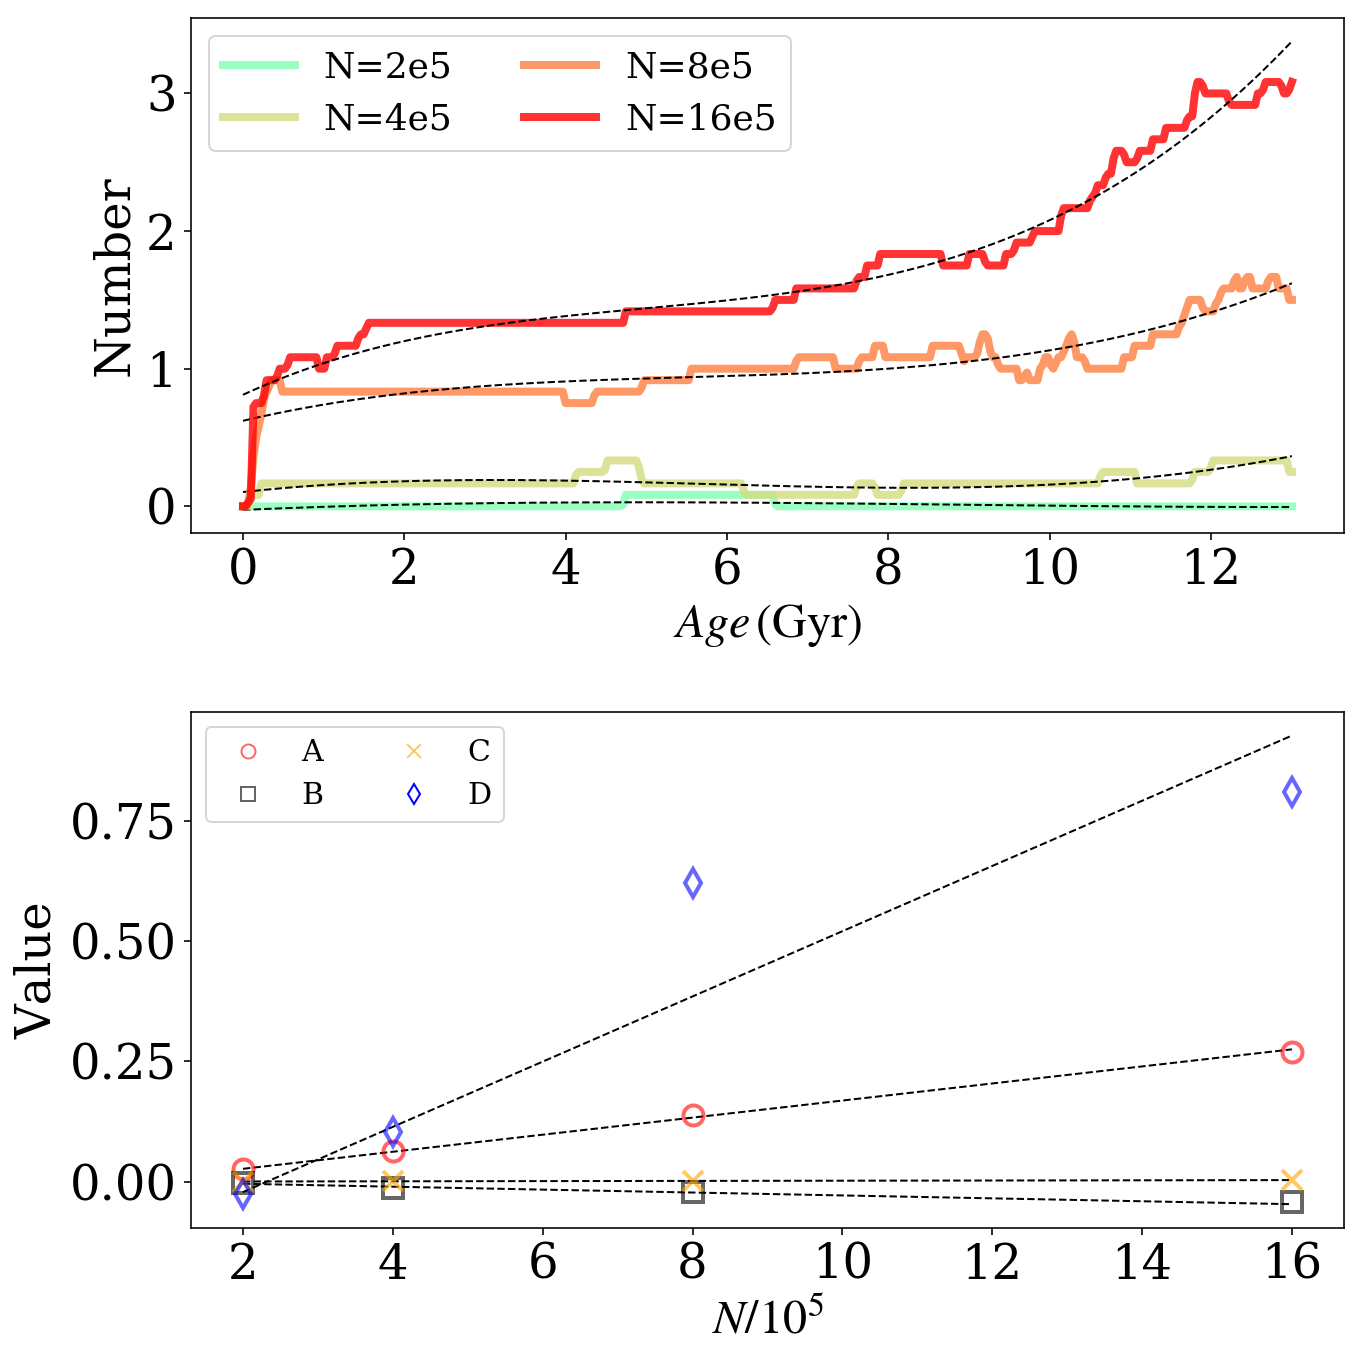

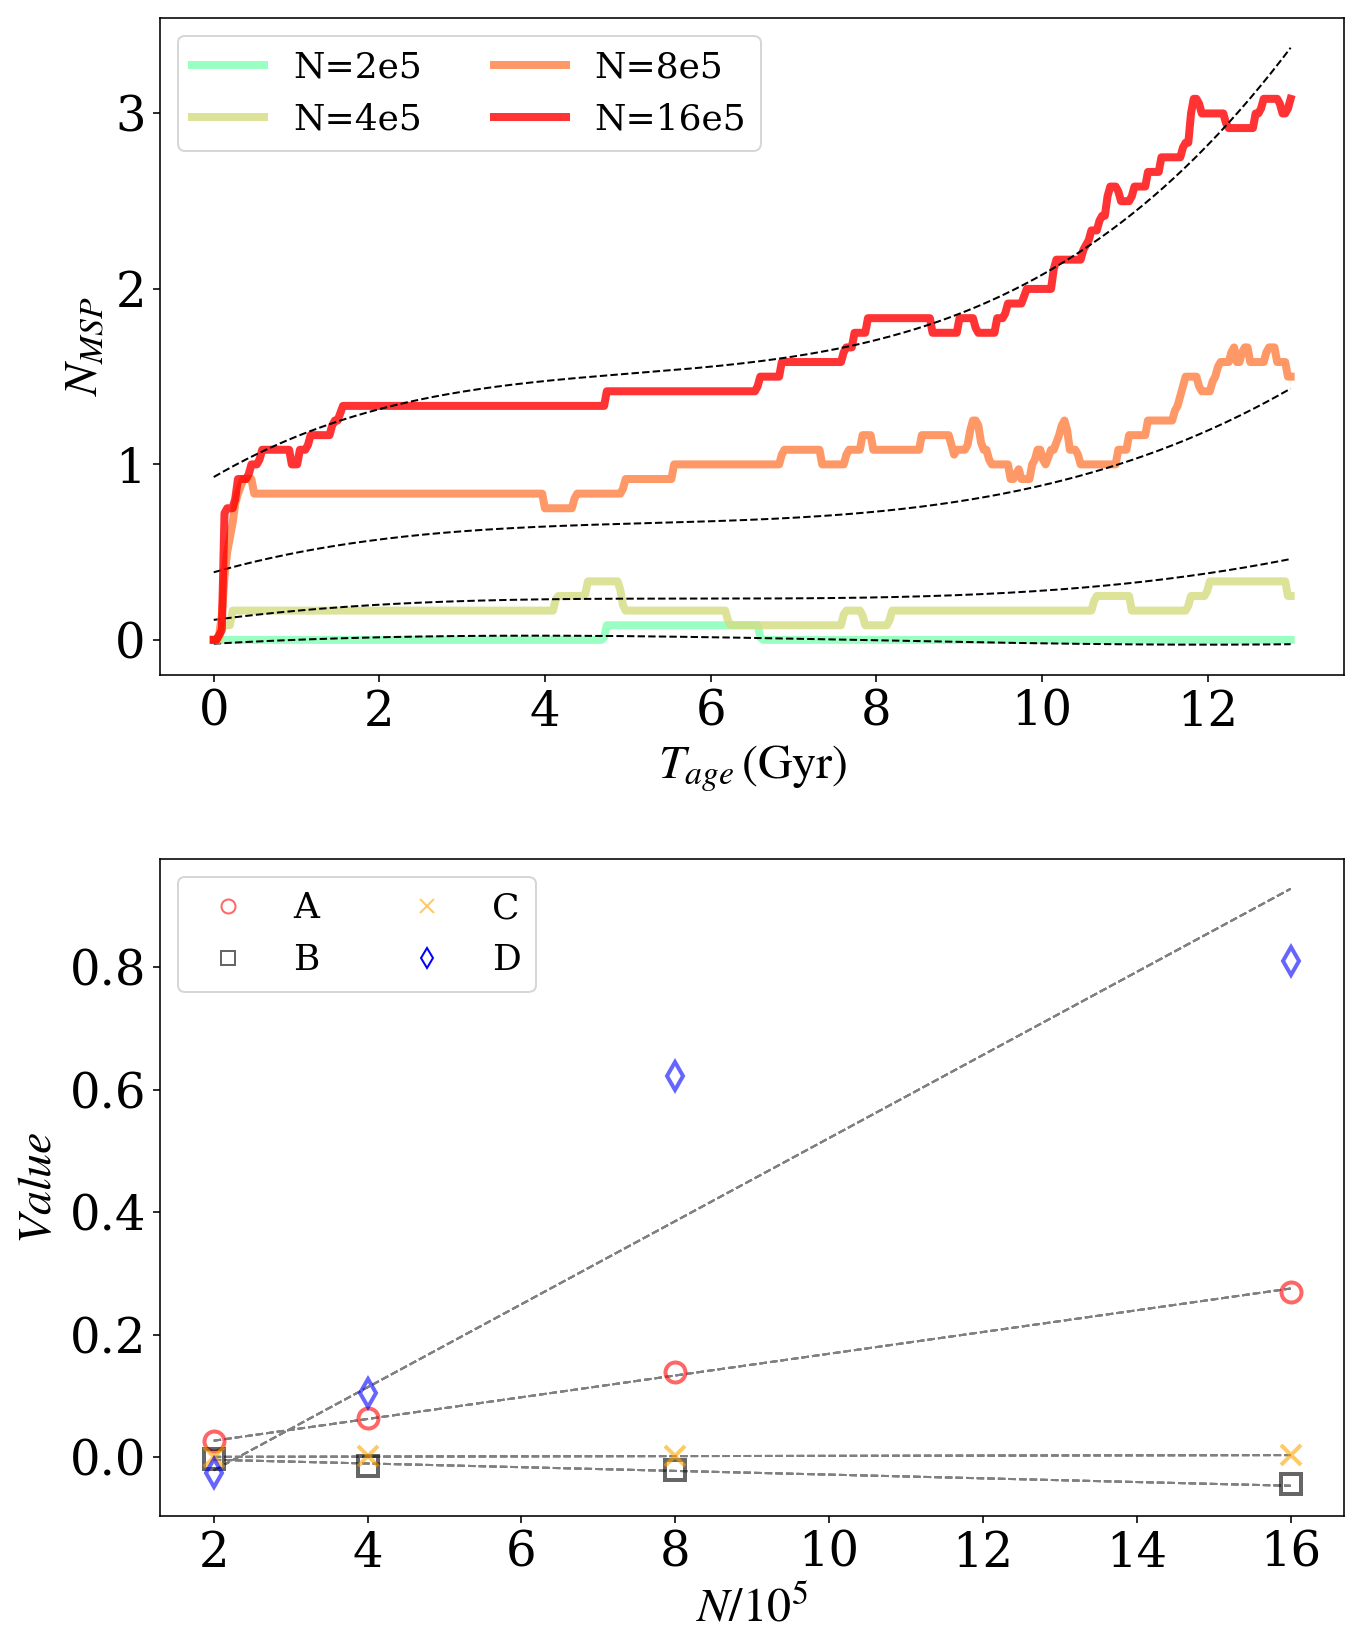

In [5]:
## Curve fitting to number of MSPs vs. time for the N-set
##RG2
from scipy.optimize import curve_fit
from scipy import special


def func_poly(input_val,A,B,C,D):
    x, N = input_val
    N = N/1.e5
    y = A*x+B*x**2+C*x**3+D
    return y

def func_poly_params(input_val,O,P):
    N = input_val
    y = O*N+P
    return y

data_mass = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_mass_age_rg2.dat')

mass_label = ['2e5', '4e5', '8e5', '16e5']
n_grid = np.array(mass_label).astype(np.float)/1.e5
#mass_label = ['1.197630e+05', '2.423500e+05', '4.848440e+05', '9.703820e+05']
#n_grid = np.array(mass_label).astype(np.float)/0.6e5
poly_label = ['A','B','C', 'D']
x_poly = [1,2,3,4]


pars_poly_all = []; cov_poly_all = []; stdevs_poly_all = []
pars_poly_up = []; cov_poly_up = []; stdevs_poly_up = []

for z in range(4):
    pars_poly, cov_poly = curve_fit(f=func_poly, 
                                    xdata=(data_mass[:,0]/1000., float(mass_label[z])), ydata=data_mass[:,z+5])#,
                                    #sigma = data_mass[:,z+9],absolute_sigma=True)
    stdevs_poly = np.sqrt(np.diag(cov_poly))
    
    pars_poly_all.append(pars_poly); cov_poly_all.append(cov_poly); stdevs_poly_all.append(stdevs_poly)
    
    ####Upper Limits####
    pars_poly_u, cov_poly_u = curve_fit(f=func_poly, 
                                    xdata=(data_mass[:,0]/1000., float(mass_label[z])), 
                                          ydata=data_mass[:,z+5]+data_mass[:,z+9])#,
                                    #sigma = data_mass[:,z+9],absolute_sigma=True)
    stdevs_poly_u = np.sqrt(np.diag(cov_poly_u))
    
    pars_poly_up.append(pars_poly_u); cov_poly_up.append(cov_poly_u); stdevs_poly_up.append(stdevs_poly_u)

    
pars_poly_t = np.array(pars_poly_all).T
stdevs_poly_t = np.array(stdevs_poly_all).T
#print(pars_poly_t[0])
print(pars_poly_t)

####Upper Limits####
pars_poly_upt = np.array(pars_poly_up).T
stdevs_poly_upt = np.array(stdevs_poly_up).T
              
cs = cm.rainbow(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
mks = ['o', 's', 'x', 'd']
edcs = ['r', 'k','orange','b']
Adot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, markerfacecolor = 'None', alpha=0.6, label='A')
Bdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='s',
                  markersize=7, markerfacecolor = 'None', alpha=0.6, label='B')
Cdot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='x',
                  markersize=7, markerfacecolor = 'None', alpha=0.6, label='C')
Ddot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='d',
                  markersize=7, markerfacecolor = 'None', label='D')

matplotlib.rcParams.update({'font.size': 24})
fig, axs = plt.subplots(nrows = 2, figsize = (10,10))

for z in range(4):
    ####Over plotting data and fits  
    axs[0].plot(data_mass[:,0]/1000., data_mass[:,z+5], color = cs[z], lw = 4, alpha = 0.8,
            label = 'N='+mass_label[z])
    axs[0].plot(data_mass[:,0]/1000., func_poly((data_mass[:,0]/1000.,float(mass_label[z])), *pars_poly_all[z]), 
              'k--', lw=1)
    
    ##Plotting fit parameters and standard deviations
    #axs3.errorbar(x_poly, pars_poly, yerr = stdevs_poly, 
    #              ls = 'none', color=cs[z], marker = 'o', markersize = 20, alpha=0.6)
    for kk in range(len(poly_label)):
        axs[1].errorbar(float(mass_label[z])/1.e5, pars_poly_all[z][kk],
                  ls = 'none', marker = mks[kk], markersize = 10, 
                        markeredgewidth=2, markerfacecolor='none', markeredgecolor =edcs[kk], alpha=0.6)

        
N_pars_poly_all = []; N_cov_poly_all = []; N_stdevs_poly_all = []
N_pars_poly_up = []; N_cov_poly_up = []; N_stdevs_poly_up = []       
for kk in range(len(poly_label)):
    #Fitting the params to N
    N_pars_poly,N_cov_poly = curve_fit(f=func_poly_params, 
                                       xdata=n_grid, 
                                       ydata=pars_poly_t[kk],#)
                                       sigma = stdevs_poly_t[kk],absolute_sigma=True)
    N_stdevs_poly = np.sqrt(np.diag(N_cov_poly))
    N_pars_poly_all.append(N_pars_poly); N_cov_poly_all.append(N_cov_poly); N_stdevs_poly_all.append(N_stdevs_poly)

    axs[1].plot(n_grid, func_poly_params(n_grid, *N_pars_poly), 'k--', lw=1) 
    
    
    ####Upper Limits####
    N_pars_poly_u,N_cov_poly_u = curve_fit(f=func_poly_params, 
                                       xdata=n_grid, 
                                       ydata=pars_poly_upt[kk],#)
                                       sigma = stdevs_poly_upt[kk],absolute_sigma=True)
    N_stdevs_poly_u = np.sqrt(np.diag(N_cov_poly_u))
    N_pars_poly_up.append(N_pars_poly_u); N_cov_poly_up.append(N_cov_poly_u); N_stdevs_poly_up.append(N_stdevs_poly_u)


#axs2.set_xticks(x_tanh)
#axs2.set_xticklabels(tanh_label)
#axs3.set_xticks(x_poly)
#axs3.set_xticklabels(mass_label)
axs[0].set_ylabel('Number')
axs[0].set_xlabel(r'$Age\,(\rm{Gyr})$')
axs[0].legend(loc='best', ncol=2, fontsize=18)

axs[1].set_xlabel(r'$N/10^5$')
axs[1].set_ylabel(r'Value')
axs[1].legend(handles=[Adot, Bdot, Cdot, Ddot], 
            loc='best', prop={'size': 15}, numpoints=1, frameon=True, ncol=2)

fig.tight_layout()
#plt.savefig(figsave+'rg2_fit.pdf', dpi=300)

print(pars_poly_all, stdevs_poly_all)
print(N_pars_poly_all, N_stdevs_poly_all)


fig, ax = plt.subplots(nrows = 2, figsize = (10,12))
for z in range(4):
    ####Over plotting data and fits  
    ax[0].plot(data_mass[:,0]/1000., data_mass[:,z+5], color = cs[z], lw = 4, alpha = 0.8,
            label = 'N='+mass_label[z])
    
    As = []; As_up = []
    for kk in range(len(poly_label)):
        a = N_pars_poly_all[kk][0]*float(mass_label[z])/1e5
        #b = N_pars_poly_all[kk][1]*(float(mass_label[z])/1e5)**2
        c = N_pars_poly_all[kk][1]
        #if z==1 and kk==3:
        #    a = a-N_stdevs_poly_all[kk][0]*float(mass_label[z])/1e5
        ##    #b = b-2*N_stdevs_poly_all[kk][1]*(float(mass_label[z])/1e5)**2
        #    c = c-N_stdevs_poly_all[kk][1]
        #if z==2 and kk==3:
        #    a = a+N_stdevs_poly_all[kk][0]*float(mass_label[z])/1e5
        ##    #b = b+3*N_stdevs_poly_all[kk][1]*(float(mass_label[z])/1e5)**2
        #    c = c+N_stdevs_poly_all[kk][1]
        
        #if z==1 and kk==3:
        #    c-=0.07
        #if z==2 and kk==3:
        #    c+=0.26
        #if z==3 and kk==3:
        #    c-=0.05
        As.append(a+c)
        
        ax[1].errorbar(float(mass_label[z])/1e5, pars_poly_all[z][kk],
                  ls = 'none', marker = mks[kk], markersize = 10, 
                        markeredgewidth=2, markerfacecolor='none', markeredgecolor =edcs[kk], alpha=0.6)
        ax[1].plot(n_grid, func_poly_params(n_grid, *N_pars_poly_all[kk]), '--', 
                   color='gray',lw=1)
        
        ####Upper Limits####
        a = N_pars_poly_up[kk][0]*float(mass_label[z])/1e5
        c = N_pars_poly_up[kk][1]
        As_up.append(a+c)
        
        #ax[1].errorbar(float(mass_label[z])/1.e5, pars_poly_up[z][kk],
        #          ls = 'none', marker = mks[kk], markersize = 5, 
        #                markeredgewidth=2, markerfacecolor='none', markeredgecolor =edcs[kk], alpha=0.6)
        #ax[1].plot(np.array([2,4,8,16]), func_poly_params(np.array([2,4,8,16]), *N_pars_poly_up[kk]), '--', 
        #           color='b',lw=1)    
        
    
    xs = data_mass[:,0]/1000.
    ys = As[0]*xs+As[1]*xs**2+As[2]*xs**3+As[3]
    ax[0].plot(xs, ys,'k--', lw=1)
    
    ####Upper Limits####
    ys_up = As_up[0]*xs+As_up[1]*xs**2+As_up[2]*xs**3+As_up[3]
    #ax[0].plot(xs, ys_up,'b--', lw=1)
    
    ys_up[ys_up<0]=0; ys[ys<0]=0
    ys_up_temp = ys_up[ys!=0]
    ys_temp = ys[ys_up!=0]
    print(np.mean(ys_up_temp[ys_up_temp!=0]/ys_temp[ys_temp!=0]))
    
        
ax[0].set_ylabel(r'$N_{MSP}$')
ax[0].set_xlabel(r'$T_{age}\,(\rm{Gyr})$')
ax[0].legend(loc='best', ncol=2, fontsize=18)
ax[1].set_xlabel(r'$N/10^5$')
ax[1].set_ylabel(r'$Value$')
ax[1].legend(handles=[Adot, Bdot, Cdot, Ddot], 
            loc='best', prop={'size': 18}, numpoints=1, frameon=True, ncol=2)

fig.tight_layout()
plt.savefig(figsave+'rg2_fit_N.pdf', dpi=300)

[array([ 1.94521632e-01, -5.18047771e-02,  5.16962934e-03, -1.75298819e-04,
        5.69633609e-01]), array([ 1.45569721e-01, -4.06159688e-02,  4.31941200e-03, -1.50440103e-04,
        2.66065304e-01]), array([ 1.60641019e-01, -3.19712898e-02,  3.04448223e-03, -7.97418938e-05,
        3.04370710e-01]), array([ 6.65887411e-01, -1.68094399e-01,  1.86790812e-02, -6.36644138e-04,
        8.80581729e-01])] [array([1.25908558e-02, 3.92517712e-03, 4.52538402e-04, 1.72348856e-05,
       1.18614801e-02]), array([7.93647885e-03, 2.47418331e-03, 2.85251576e-04, 1.08637814e-05,
       7.47672676e-03]), array([9.17586664e-03, 2.86056028e-03, 3.29797440e-04, 1.25603067e-05,
       8.64431784e-03]), array([2.93837987e-02, 9.16034767e-03, 1.05610753e-03, 4.02217637e-05,
       2.76816245e-02])]
[array([0.00883192, 2.26280632, 0.13501807]), array([-0.00260511,  2.22126997, -0.03192816]), array([2.80997307e-04, 2.23674066e+00, 3.16829994e-03]), array([-1.03126415e-05,  2.22069130e+00, -9.76855927e-05]),

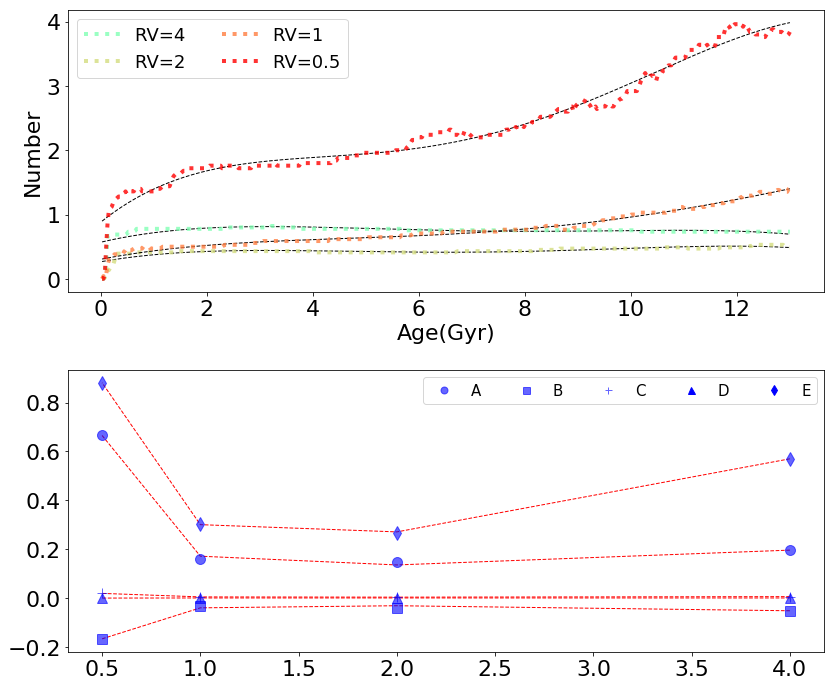

In [25]:
## Curve fitting to number of MSPs vs. time for the RV-set
from scipy.optimize import curve_fit
from scipy import special

def func_tanh(input_val,A,B):
    #y = A*x + B*x**2 + C*x**3 + D*x**4 + E
    x, N = input_val
    y = A*np.tanh(x)*x+B
    #y = A*np.tanh(x)*x+B
    #y = (A*16e5+B)*x*special.erf(x)+(C*16e5+D)
    
    return y

def func_poly(input_val,A,B,C,D,E):
    x, N = input_val
    y = A*x+B*x**2+C*x**3+D*x**4+E
    
    return y

def func_poly_params(input_val,B,C,D):
    N = input_val
    y = B*(N-C)**6/N+D
                 
    return y

data_mass = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_mass_age_nondissolved.dat')
data_rv = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rv_age_nondissolved.dat')
data_z = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_z_age_nondissolved.dat')
data_rg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rg_age_nondissolved.dat')


rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
rg_label = ['2', '8', '20']
tanh_label = ['A', 'B']; poly_label = ['A','B','C','D','E']


x_tanh = [1,2]; x_poly = [1,2,3,4,5]
pars_tanh_all = []; cov_tanh_all = []; stdevs_tanh_all = []
pars_poly_all = []; cov_poly_all = []; stdevs_poly_all = []
#fpar = open('/projects/b1095/syr904/projects/GCE/catalog/polyfit_params_rv_age_nondissolved.dat', 'w+')
for z in range(4):
    pars_tanh, cov_tanh = curve_fit(f=func_tanh, 
                    xdata=(data_rv[:,0]/1000., float(rv_label[z])), ydata=data_rv[:,z+5])
    pars_poly, cov_poly = curve_fit(f=func_poly, 
                    xdata=(data_rv[:,0]/1000., float(rv_label[z])), ydata=data_rv[:,z+5])
    stdevs_tanh = np.sqrt(np.diag(cov_tanh))
    stdevs_poly = np.sqrt(np.diag(cov_poly))
    
    #fpar.write('%f %f %f %f %f %f %f %f %f %f\n'%(pars_poly[0],pars_poly[1],pars_poly[2],pars_poly[3],pars_poly[4],
    #                                             stdevs_poly[0],stdevs_poly[1],stdevs_poly[2],stdevs_poly[3],stdevs_poly[4]))
    
    pars_tanh_all.append(pars_tanh); cov_tanh_all.append(cov_tanh); stdevs_tanh_all.append(stdevs_tanh)
    pars_poly_all.append(pars_poly); cov_poly_all.append(cov_poly); stdevs_poly_all.append(stdevs_poly)
    
#fpar.close()

cs = cm.rainbow(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 22})
mks = ['o', 's', '+', '^', 'd']
Adot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, alpha=0.6, label='A')
Bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='s',
                  markersize=7, alpha=0.6, label='B')
Cdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='+',
                  markersize=7, alpha=0.6, label='C')
Ddot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='^',
                  markersize=7, label='D')
Edot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='d',
                  markersize=7, label='E')



fig = plt.figure(figsize = (12,10))
axs1 = plt.subplot(211)
axs2 = plt.subplot(212)
    
for z in range(4):
    ####Over plotting data and fits
    axs1.plot(data_rv[:,0]/1000., func_poly((data_rv[:,0]/1000.,float(rv_label[z])), *pars_poly_all[z]), 
              'k--', lw=1)
    #axs1.plot(data_rv[:,0]/1000., func_tanh((data_rv[:,0]/1000.,float(rv_label[z])), *pars_tanh), 'k-', lw=1)
    
    axs1.plot(data_rv[:,0]/1000., data_rv[:,z+5], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8,
            label = 'RV='+rv_label[z])
    
    for kk in range(len(poly_label)):
        axs2.errorbar(float(rv_label[z]), pars_poly_all[z][kk],
                  ls = 'none', color='b', marker = mks[kk], markersize = 10, alpha=0.6)
    
    
##Plotting fit parameters and standard deviations
data_parsRV = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/polyfit_params_rv_age_nondissolved.dat')
RV_pars_poly_all = []; RV_cov_poly_all = []; RV_stdevs_poly_all = []
for kk in range(len(poly_label)):
    #Fitting the params to N
    RV_pars_poly,RV_cov_poly = curve_fit(f=func_poly_params, 
                                       xdata=[4,2,1,0.5], 
                                       ydata=data_parsRV[:,kk])#,
                                       #sigma = data_mass[:,z+9],absolute_sigma=True)
    RV_stdevs_poly = np.sqrt(np.diag(RV_cov_poly))
    RV_pars_poly_all.append(RV_pars_poly); RV_cov_poly_all.append(RV_cov_poly); RV_stdevs_poly_all.append(RV_stdevs_poly)

    axs2.plot(np.array([4,2,1,0.5]), func_poly_params(np.array([4,2,1,0.5]), *RV_pars_poly), 'r--', lw=1)
    
axs1.set_ylabel('Number')
axs1.set_xlabel('Age(Gyr)')
axs1.legend(loc='best', ncol=2, fontsize=18)
axs2.legend(handles=[Adot, Bdot, Cdot, Ddot, Edot], loc='best', prop={'size': 15}, numpoints=1, frameon=True,
           ncol=5)

#print(pars_tanh_all, stdevs_tanh_all)
print(pars_poly_all, stdevs_poly_all)
print(RV_pars_poly_all, RV_stdevs_poly_all)

fig.tight_layout()

[array([ 0.13098248, -0.04135507,  0.00522566, -0.00020248,  0.05643653]), array([ 3.43335507e-01, -7.90717017e-02,  7.38297996e-03, -2.35187370e-04,
        1.11492584e+00]), array([ 2.57191103e-01, -6.53661249e-02,  7.06648296e-03, -2.22532233e-04,
        1.97839483e-01])] [array([5.12065237e-03, 1.59635437e-03, 1.84045619e-04, 7.00936143e-06,
       4.82401816e-03]), array([2.49407394e-02, 7.77523155e-03, 8.96415821e-04, 3.41399182e-05,
       2.34959481e-02]), array([8.84586329e-03, 2.75768238e-03, 3.17936530e-04, 1.21085851e-05,
       8.33343104e-03])]


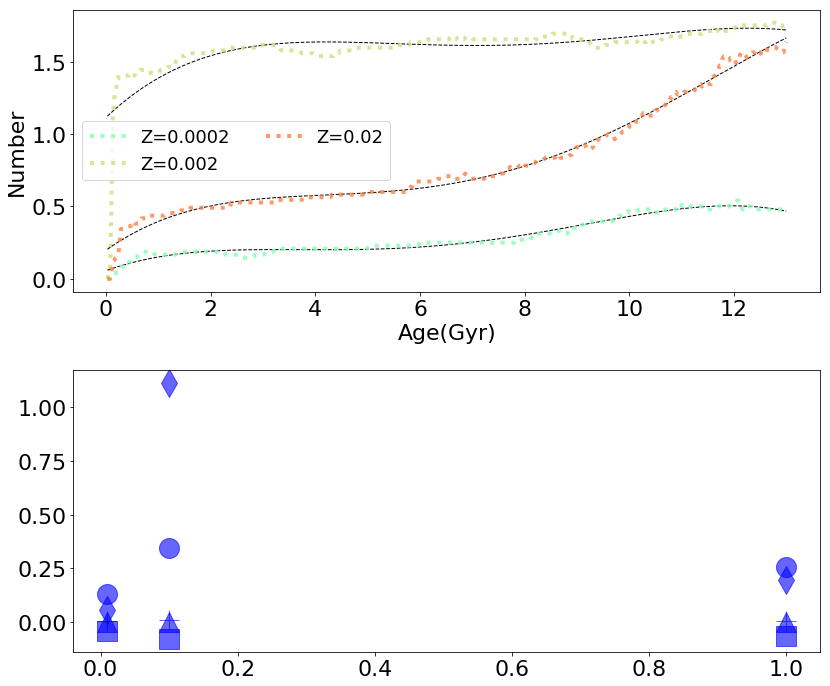

In [31]:
## Curve fitting to number of MSPs vs. time for the Z-set
from scipy.optimize import curve_fit
from scipy import special

def func_tanh(input_val,A,B):
    #y = A*x + B*x**2 + C*x**3 + D*x**4 + E
    x, N = input_val
    y = A*np.tanh(x)*x+B
    #y = A*np.tanh(x)*x+B
    #y = (A*16e5+B)*x*special.erf(x)+(C*16e5+D)
    
    return y

def func_poly(input_val,A,B,C,D,E):
    x, N = input_val
    y = A*x+B*x**2+C*x**3+D*x**4+E
    
    return y

def func_params(input_val,A):
    x = input_val
    y = A*x**2*np.exp(-(10*x)**2)
    
    return y

data_mass = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_mass_age_nondissolved.dat')
data_rv = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rv_age_nondissolved.dat')
data_z = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_z_age_nondissolved.dat')
data_rg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rg_age_nondissolved.dat')


rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
rg_label = ['2', '8', '20']
tanh_label = ['A', 'B']; poly_label = ['A','B','C','D','E']


x_tanh = [1,2]; x_poly = [1,2,3,4,5]
pars_tanh_all = []; cov_tanh_all = []; stdevs_tanh_all = []
pars_poly_all = []; cov_poly_all = []; stdevs_poly_all = []
#fpar = open('/projects/b1095/syr904/projects/GCE/catalog/polyfit_params_z_age_nondissolved.dat', 'w+')
for z in range(3):
    pars_tanh, cov_tanh = curve_fit(f=func_tanh, 
                    xdata=(data_z[:,0]/1000., float(z_label[z])), ydata=data_z[:,z+4])
    pars_poly, cov_poly = curve_fit(f=func_poly, 
                    xdata=(data_z[:,0]/1000., float(z_label[z])), ydata=data_z[:,z+4])
    stdevs_tanh = np.sqrt(np.diag(cov_tanh))
    stdevs_poly = np.sqrt(np.diag(cov_poly))
    
    #fpar.write('%f %f %f %f %f %f %f %f\n'%(pars_poly[0],pars_poly[1],pars_poly[2],pars_poly[3],
    #                                            stdevs_poly[0],stdevs_poly[1],stdevs_poly[2],stdevs_poly[3]))
    
    pars_tanh_all.append(pars_tanh); cov_tanh_all.append(cov_tanh); stdevs_tanh_all.append(stdevs_tanh)
    pars_poly_all.append(pars_poly); cov_poly_all.append(cov_poly); stdevs_poly_all.append(stdevs_poly)

#fpar.close()
    
    
cs = cm.rainbow(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 22})
mks = ['o', 's', '+', '^', 'd']
Adot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, alpha=0.6, label='A')
Bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='s',
                  markersize=7, alpha=0.6, label='B')
Cdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='+',
                  markersize=7, alpha=0.6, label='C')
Ddot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='^',
                  markersize=7, label='D')
Edot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='d',
                  markersize=7, label='E')


fig = plt.figure(figsize = (12,10))
axs1 = plt.subplot(211)
axs2 = plt.subplot(212)

for z in range(3):
    ####Over plotting data and fits
    axs1.plot(data_z[:,0]/1000., func_poly((data_z[:,0]/1000.,float(z_label[z])), *pars_poly_all[z]), 'k--', lw=1)
    #axs1.plot(data_z[:,0]/1000., func_tanh((data_z[:,0]/1000.,float(z_label[z])), *pars_tanh), 'k-', lw=1)
    
    axs1.plot(data_z[:,0]/1000., data_z[:,z+4], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8,
            label = 'Z='+z_label[z])
    
    for kk in range(len(poly_label)):
        axs2.errorbar(float(z_label[z])/0.02, pars_poly_all[z][kk], 
                  ls = 'none', color='b', marker = mks[kk], markersize = 20, alpha=0.6)

    
##Plotting fit parameters and standard deviations
#data_parsZ = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/polyfit_params_z_age_nondissolved.dat')
#Z_pars_poly_all = []; Z_cov_poly_all = []; Z_stdevs_poly_all = []
#for kk in range(len(poly_label)):
#    #Fitting the params to N
#    Z_pars_poly,Z_cov_poly = curve_fit(f=func_params, 
#                                       xdata=np.array([0.0002, 0.002, 0.02])/0.02, 
#                                       ydata=data_parsZ[:,kk])#,
#                                       #sigma = data_mass[:,z+9],absolute_sigma=True)
#    Z_stdevs_poly = np.sqrt(np.diag(Z_cov_poly))
#    Z_pars_poly_all.append(Z_pars_poly); Z_cov_poly_all.append(Z_cov_poly); Z_stdevs_poly_all.append(Z_stdevs_poly)
#
#    axs2.plot(np.array([0.0002, 0.002, 0.02])/0.02, func_params(np.array([0.0002, 0.002, 0.02])/0.02, 
#                                                                *Z_pars_poly), 'r--', lw=1)
    
#axs2.set_xscale('log')   
axs1.set_ylabel('Number')
axs1.set_xlabel('Age(Gyr)')
axs1.legend(loc='best', ncol=2, fontsize=18)

#print(pars_tanh_all, stdevs_tanh_all)
print(pars_poly_all, stdevs_poly_all)
#print(Z_pars_poly_all, Z_stdevs_poly_all)

fig.tight_layout()

[array([0.06886383, 0.42187325]), array([0.04163827, 0.60589904]), array([0.04558193, 0.68112583])] [array([0.00136914, 0.01028581]), array([0.0008057 , 0.00605287]), array([0.00087768, 0.00659369])]
[array([ 1.72051038e-01, -3.90800457e-02,  3.82622939e-03, -1.00236982e-04,
        4.21224271e-01]), array([ 3.10020362e-01, -8.46014757e-02,  9.37935196e-03, -3.38246897e-04,
        4.06371177e-01]), array([ 2.35685808e-01, -5.67059277e-02,  5.75546589e-03, -1.86426196e-04,
        5.41949503e-01])] [array([1.43109727e-02, 4.46142052e-03, 5.14362551e-04, 1.95894531e-05,
       1.34819523e-02]), array([1.06424778e-02, 3.31777363e-03, 3.82510115e-04, 1.45678642e-05,
       1.00259701e-02]), array([1.32567576e-02, 4.13277090e-03, 4.76472139e-04, 1.81463999e-05,
       1.24888069e-02])]


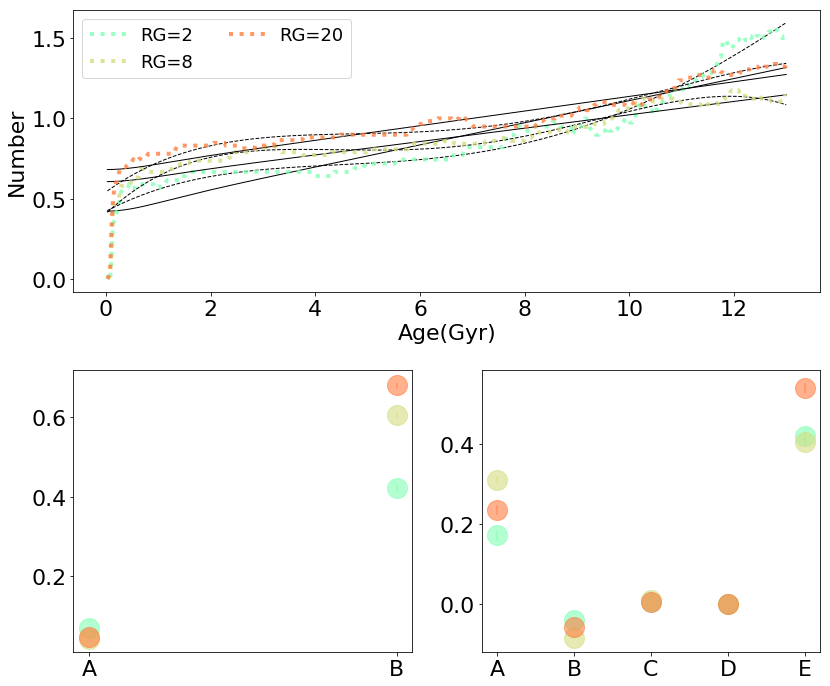

In [15]:
## Curve fitting to number of MSPs vs. time for the RG-set
from scipy.optimize import curve_fit
from scipy import special

def func_tanh(input_val,A,B):
    #y = A*x + B*x**2 + C*x**3 + D*x**4 + E
    x, N = input_val
    y = A*np.tanh(x)*x+B
    #y = A*np.tanh(x)*x+B
    #y = (A*16e5+B)*x*special.erf(x)+(C*16e5+D)
    
    return y

def func_poly(input_val,A,B,C,D,E):
    x, N = input_val
    y = A*x+B*x**2+C*x**3+D*x**4+E
    
    return y

data_mass = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_mass_age_nondissolved.dat')
data_rv = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rv_age_nondissolved.dat')
data_z = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_z_age_nondissolved.dat')
data_rg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_rg_age_nondissolved.dat')


rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
rg_label = ['2', '8', '20']
tanh_label = ['A', 'B']; poly_label = ['A','B','C','D','E','F']

cs = cm.rainbow(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 22})
#fig, axs = plt.subplots(nrows = 2, figsize = (12,10), sharex=False)#figsize = (18,25), 
fig = plt.figure(figsize = (12,10))
axs1 = plt.subplot(211)
axs2 = plt.subplot(223)
axs3 = plt.subplot(224)

x_tanh = [1,2]; x_poly = [1,2,3,4,5]
pars_tanh_all = []; cov_tanh_all = []; stdevs_tanh_all = []
pars_poly_all = []; cov_poly_all = []; stdevs_poly_all = []
for z in range(3):
    pars_tanh, cov_tanh = curve_fit(f=func_tanh, 
                    xdata=(data_rg[:,0]/1000., float(rg_label[z])), ydata=data_rg[:,z+4])
    pars_poly, cov_poly = curve_fit(f=func_poly, 
                    xdata=(data_rg[:,0]/1000., float(rg_label[z])), ydata=data_rg[:,z+4])
    stdevs_tanh = np.sqrt(np.diag(cov_tanh))
    stdevs_poly = np.sqrt(np.diag(cov_poly))
    
    pars_tanh_all.append(pars_tanh); cov_tanh_all.append(cov_tanh); stdevs_tanh_all.append(stdevs_tanh)
    pars_poly_all.append(pars_poly); cov_poly_all.append(cov_poly); stdevs_poly_all.append(stdevs_poly)

    ####Over plotting data and fits
    axs1.plot(data_rg[:,0]/1000., func_poly((data_rg[:,0]/1000.,float(rg_label[z])), *pars_poly), 'k--', lw=1)
    axs1.plot(data_rg[:,0]/1000., func_tanh((data_rg[:,0]/1000.,float(rg_label[z])), *pars_tanh), 'k-', lw=1)
    
    axs1.plot(data_rg[:,0]/1000., data_rg[:,z+4], color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8,
            label = 'RG='+rg_label[z])
    
    ##Plotting fit parameters and standard deviations
    axs2.errorbar(x_tanh, pars_tanh, yerr = stdevs_tanh, 
                  ls = 'none', color=cs[z], marker = 'o', markersize = 20, alpha=0.6)
    axs3.errorbar(x_poly, pars_poly, yerr = stdevs_poly, 
                  ls = 'none', color=cs[z], marker = 'o', markersize = 20, alpha=0.6)


#axs2.set_yscale('symlog')
#axs3.set_yscale('symlog')
axs2.set_xticks(x_tanh)
axs2.set_xticklabels(tanh_label)
axs3.set_xticks(x_poly)
axs3.set_xticklabels(poly_label)
axs1.set_ylabel('Number')
axs1.set_xlabel('Age(Gyr)')
axs1.legend(loc='best', ncol=2, fontsize=18)

print(pars_tanh_all, stdevs_tanh_all)
print(pars_poly_all, stdevs_poly_all)

fig.tight_layout()

(20, 15000)

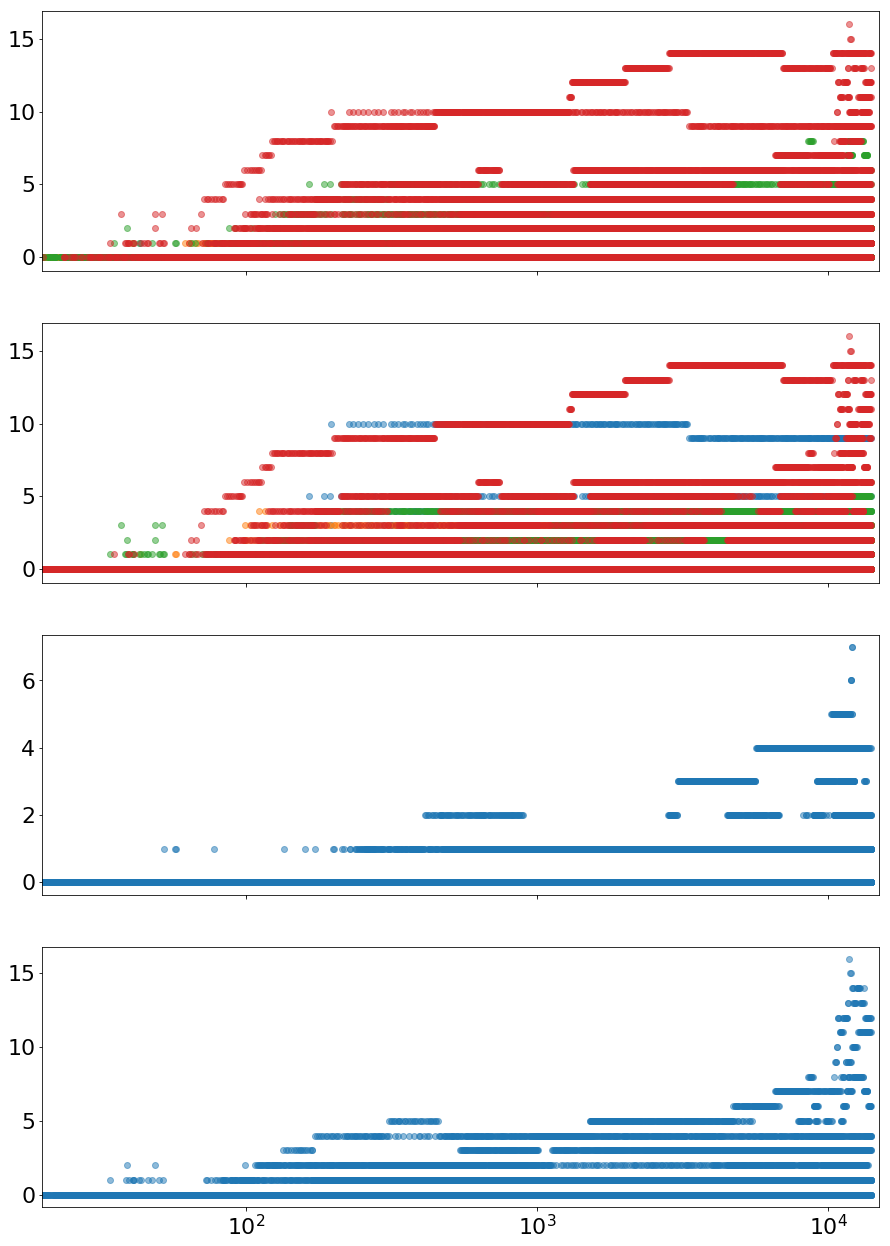

In [10]:
## Number of MSPs as a function of time scatter plot
nlist = ['2e5', '4e5', '8e5', '16e5']
rvlist = ['4', '2', '1', '0.5']
rglist = ['2', '8', '20']
zlist = ['0.0002', '0.002', '0.02']

scatter_nmsp_mass_sort = []
scatter_nmsp_rv_sort = []
scatter_nmsp_z_sort = []
scatter_nmsp_rg_sort = []

for ii in range(4):
    data_mass = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_time_scatter_mass_'+nlist[ii]+'.dat')
    scatter_nmsp_mass_sort.append(data_mass[:,0])
    scatter_nmsp_mass_sort.append(data_mass[:,1])
    
    data_rv = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_time_scatter_rv_'+rvlist[ii]+'.dat')
    scatter_nmsp_rv_sort.append(data_rv[:,0])
    scatter_nmsp_rv_sort.append(data_rv[:,1])   

for ii in range(3):
    data_z= np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_time_scatter_z_'+zlist[ii]+'.dat')
    scatter_nmsp_z_sort.append(data_z[:,0])
    scatter_nmsp_z_sort.append(data_z[:,1])
    
    data_rg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/nmsp_time_scatter_rg_'+rglist[ii]+'.dat')
    scatter_nmsp_rg_sort.append(data_rg[:,0])
    scatter_nmsp_rg_sort.append(data_rg[:,1])
    
    
cs = cm.coolwarm(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(nrows=4, figsize = (15,22), sharex=True)
for xx in range(4):
    axs[0].scatter(scatter_nmsp_mass_sort[xx*2], scatter_nmsp_mass_sort[xx*2+1],
                  alpha=0.5)
    axs[1].scatter(scatter_nmsp_rv_sort[xx*2], scatter_nmsp_rv_sort[xx*2+1],
                  alpha=0.5)
    
for yy in range(1):
    axs[2].scatter(scatter_nmsp_z_sort[yy*2], scatter_nmsp_z_sort[yy*2+1],
                  alpha=0.5)
    axs[3].scatter(scatter_nmsp_rg_sort[yy*2], scatter_nmsp_rg_sort[yy*2+1],
                  alpha=0.5)
    
axs[0].set_xscale('symlog')
axs[1].set_xscale('symlog')
axs[2].set_xscale('symlog')
axs[3].set_xscale('symlog')

axs[0].set_xlim(xmin = 20, xmax=15000)
axs[1].set_xlim(xmin = 20, xmax=15000)
axs[2].set_xlim(xmin = 20, xmax=15000)
axs[3].set_xlim(xmin = 20, xmax=15000)
#axs[0].set_yscale('symlog')
#axs[1].set_yscale('symlog')
#axs[2].set_yscale('symlog')
#axs[3].set_yscale('symlog')

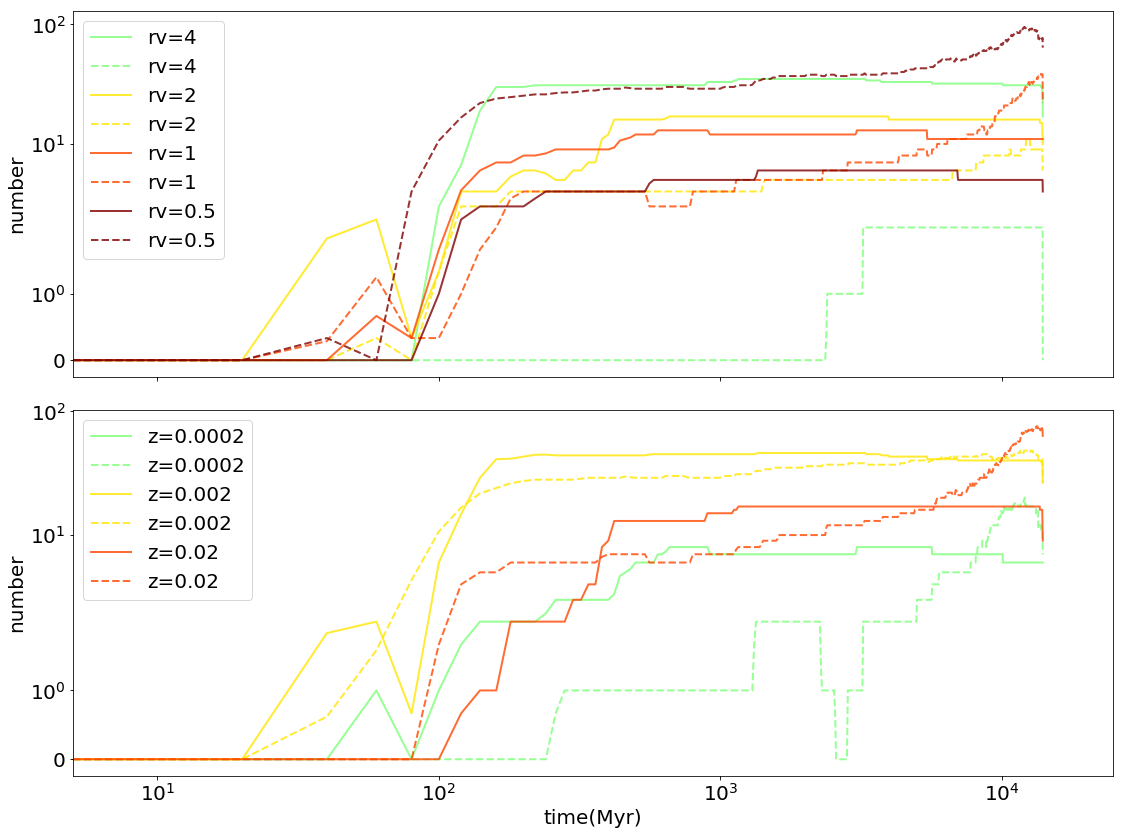

In [3]:
##Plot number of pulsars vs. time for rv models(primordial and dynamical)
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

#nsfiles = np.sort(glob('/projects/b1095/syr904/projects/GCE/catalog/msp_primordial_dynamical_catalog/*'))
pathstr = '/projects/b1095/syr904/projects/GCE/catalog/msp_primordial_dynamical_catalog/ns_pridyn_'

##Grouping models        
n_rv_pri = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
n_rv_dyn = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
n_z_pri = [np.zeros(700),np.zeros(700),np.zeros(700)]
n_z_dyn = [np.zeros(700),np.zeros(700),np.zeros(700)]


t_all = np.linspace(0, 14000., 701)
for kk in range(len(paths)):
    if not os.path.isfile(pathstr+str(kk)+'.dat'):
        continue
    
    ##Initial Conditions
    s=paths[kk].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
        
    #t_conv = dyn.conv('t', paths[kk]+'initial.conv.sh')
    datans = np.genfromtxt(pathstr+str(kk)+'.dat')
    times = np.array(datans[:,0])
    n_pri = np.array(datans[:,3])+np.array(datans[:,6])
    n_dyn = np.array(datans[:,4])+np.array(datans[:,7])
        
    ##Interpolate the number of NS data
    f_pri = interp1d(times, n_pri, kind='nearest')
    f_dyn = interp1d(times, n_dyn, kind='nearest')
    t_interpld = np.linspace(np.min(times), np.max(times), 2000)
    n_pri_new = f_pri(t_interpld)
    n_dyn_new = f_dyn(t_interpld)
    #print(n_msp_new)
    
    n_rv = [[[],[],[],[]], [[],[],[],[]]]; n_z = [[[],[],[]], [[],[],[]]]
    for jj in range(len(t_all)-1):
        #print(jj)
        n_rv_temp = [[0,0,0,0],[0,0,0,0]]; n_z_temp = [[0,0,0],[0,0,0]]
        count_rv = [0,0,0,0]; count_z = [0,0,0]
            
        ##Group by initial rv   
        if rv==4. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0][0]+=n_pri_new[i]
                    n_rv_temp[1][0]+=n_dyn_new[i]
                    count_rv[0]+=1
        
        if rv==2. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0][1]+=n_pri_new[i]
                    n_rv_temp[1][1]+=n_dyn_new[i]
                    count_rv[1]+=1
        
        if rv==1. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0][2]+=n_pri_new[i]
                    n_rv_temp[1][2]+=n_dyn_new[i]
                    count_rv[2]+=1
        
        if rv==0.5 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0][3]+=n_pri_new[i]
                    n_rv_temp[1][3]+=n_dyn_new[i]
                    count_rv[3]+=1
                    
        
        ##Group by metallicity
        if z==0.0002 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[0][0]+=n_pri_new[i]
                    n_z_temp[1][0]+=n_dyn_new[i]
                    count_z[0]+=1
                    
        if z==0.002 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[0][1]+=n_pri_new[i]
                    n_z_temp[1][1]+=n_dyn_new[i]
                    count_z[1]+=1
        
        if z==0.02 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[0][2]+=n_pri_new[i]
                    n_z_temp[1][2]+=n_dyn_new[i]
                    count_z[2]+=1
    
        #print(count_rv[0])
        
        for x in range(4):
            if count_rv[x]!=0:
                n_rv_temp[0][x] = n_rv_temp[0][x]/count_rv[x]
                n_rv_temp[1][x] = n_rv_temp[1][x]/count_rv[x]
                
            n_rv[0][x].append(n_rv_temp[0][x])
            n_rv[1][x].append(n_rv_temp[1][x])
        
        for x in range(3):
            if count_z[x]!=0:
                n_z_temp[0][x] = n_z_temp[0][x]/count_z[x]
                n_z_temp[1][x] = n_z_temp[1][x]/count_z[x]
            
            n_z[0][x].append(n_z_temp[0][x])
            n_z[1][x].append(n_z_temp[1][x])
                            
            
    for y in range(4):
        n_rv_pri[y] = n_rv_pri[y]+np.array(n_rv[0][y])
        n_rv_dyn[y] = n_rv_dyn[y]+np.array(n_rv[1][y])
       
        
    for y in range(3):
        n_z_pri[y] = n_z_pri[y]+np.array(n_z[0][y])
        n_z_dyn[y] = n_z_dyn[y]+np.array(n_z[1][y])

    
#print(n_msp_rv[0], n_msp_rv[3])
#print(len(n_msp_rv[0]))
#print(n_msp_rv[0]); print(type(n_msp_rv_average[0]))
rv_label = ['4','2','1','0.5']
z_label = ['0.0002', '0.002', '0.02']
cs = cm.jet(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=2, figsize = (16,12), sharex=True)
for z in range(4):
    n_rv_pri[z] = np.insert(n_rv_pri[z], 0, 0.)
    n_rv_dyn[z] = np.insert(n_rv_dyn[z], 0, 0.)
    axs[0].plot(t_all, n_rv_pri[z], label = 'rv='+rv_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[0].plot(t_all, n_rv_dyn[z], label = 'rv='+rv_label[z], color = cs[z], ls = '--', lw = 2, alpha=0.8)
     
for z in range(3):
    n_z_pri[z] = np.insert(n_z_pri[z], 0, 0.)
    n_z_dyn[z] = np.insert(n_z_dyn[z], 0, 0.)
    axs[1].plot(t_all, n_z_pri[z], label = 'z='+z_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[1].plot(t_all, n_z_dyn[z], label = 'z='+z_label[z], color = cs[z], ls = '--', lw = 2, alpha=0.8)
    
axs[0].set_xscale('symlog')
axs[0].set_yscale('symlog')
axs[0].set_xlim(xmin = 5)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel('number')
axs[0].legend(loc='best')

axs[1].set_xscale('symlog')
axs[1].set_yscale('symlog')
axs[1].set_xlim(xmin = 5)
axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel('number')
axs[1].legend(loc='best')

plt.tight_layout()

1000000000000000000000000
{'tmyr': [], 'lmsp': []}


No handles with labels found to put in legend.


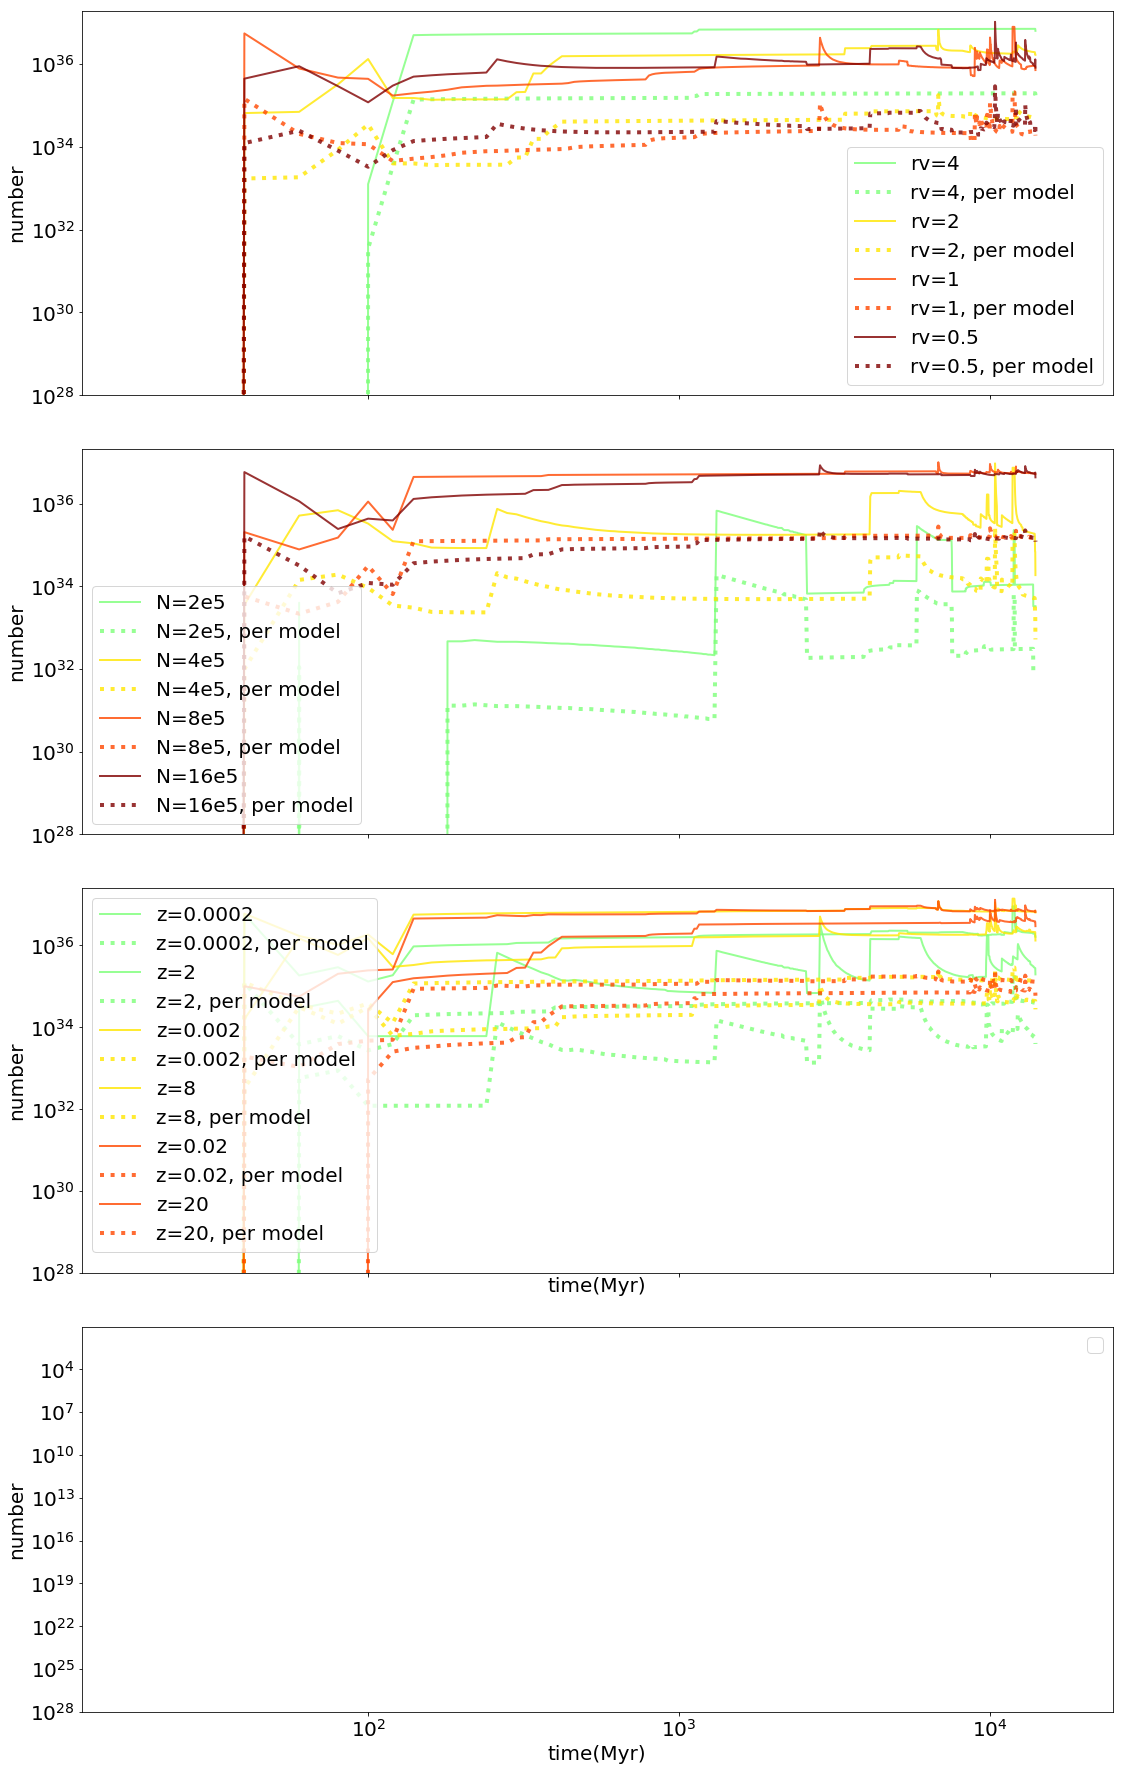

In [4]:
##Distribution of Gamma-ray luminosity vs. time
print(10**24)

data_lg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Lgamma_alltime_maingrid.dat')
model_lg = data_lg[:,0]; t_myr_lg = data_lg[:,1]; Lmsp_lg = data_lg[:,2]

pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

lg_dict = {}
for m in range(len(paths)):
    lg_dict[str(m)] = {}
    lg_dict[str(m)]['tmyr'] = []
    lg_dict[str(m)]['lmsp'] = []
    for n in range(len(model_lg)):
        if int(model_lg[n])==m:
            lg_dict[str(m)]['tmyr'].append(t_myr_lg[n])
            lg_dict[str(m)]['lmsp'].append(Lmsp_lg[n])

print(lg_dict['0'])

n_model_mass = [0,0,0,0]; n_model_rv = [0,0,0,0]; n_model_z = [0,0,0]; n_model_rg = [0,0,0]
for ii in range(len(paths)):
    ##Initial Conditions
    s=paths[ii].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    if n_star==200000.:# and status[ii]=='1': 
        n_model_mass[0]+=1
    if n_star==400000.: #and status[ii]=='1': 
        n_model_mass[1]+=1
    if n_star==800000.:# and status[ii]=='1': 
        n_model_mass[2]+=1
    if n_star==1600000.:# and status[ii]=='1': 
        n_model_mass[3]+=1
        
    if rv==4.:# and status[ii]=='1': 
        n_model_rv[0]+=1
    if rv==2.:# and status[ii]=='1': 
        n_model_rv[1]+=1
    if rv==1.:# and status[ii]=='1': 
        n_model_rv[2]+=1
    if rv==0.5:# and status[ii]=='1': 
        n_model_rv[3]+=1
        
        
    if z==0.0002:# and status[ii]=='1': 
        n_model_z[0]+=1
    if z==0.002:# and status[ii]=='1': 
        n_model_z[1]+=1
    if z==0.02:# and status[ii]=='1': 
        n_model_z[2]+=1
        
    
    if rg==2:# and status[ii]=='1': 
        n_model_rg[0]+=1
    if rg==8:# and status[ii]=='1': 
        n_model_rg[1]+=1
    if rg==20:# and status[ii]=='1': 
        n_model_rg[2]+=1
        
#print(n_model_mass, n_model_rv, n_model_z)

##Grouping models        
l_msp_rv = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_rv_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

l_msp_mass = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_mass_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

l_msp_z = [np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_z_average = [np.zeros(700),np.zeros(700),np.zeros(700)]

l_msp_rg = [np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_rg_average = [np.zeros(700),np.zeros(700),np.zeros(700)]
#print(n_msp_rv)

t_all = np.linspace(0, 14000., 701)
for kk in range(len(paths)):
    
    ##Initial Conditions
    s=paths[kk].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    tmyr = lg_dict[str(kk)]['tmyr']; lmsp = lg_dict[str(kk)]['lmsp']
    
    if not tmyr:
        continue
    
    ##Interpolate the number of NS data
    if len(tmyr)>2:
        f = interp1d(tmyr, lmsp, kind='nearest')
        t_interpld = np.linspace(np.min(tmyr), np.max(tmyr), 1000)
        lmsp_new = f(t_interpld)
        #print(n_msp_new)
    else:
        t_interpld = tmyr
        lmsp_new = lmsp
    
    l_mass = [[],[],[],[]]; l_rv = [[],[],[],[]]; l_z = [[],[],[]]; l_rg = [[],[],[]]
    for jj in range(len(t_all)-1):
        l_mass_temp = [0,0,0,0]; l_rv_temp = [0,0,0,0]; l_z_temp = [0,0,0]; l_rg_temp = [0,0,0]
        count_mass = [0,0,0,0]; count_rv = [0,0,0,0]; count_z = [0,0,0]; count_rg = [0,0,0]
            
        ##Group by initial mass
        if n_star==200000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[0]+=lmsp_new[i]
                    count_mass[0]+=1
        
        if n_star==400000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[1]+=lmsp_new[i]
                    count_mass[1]+=1
        
        if n_star==800000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[2]+=lmsp_new[i]
                    count_mass[2]+=1
        
        if n_star==1600000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[3]+=lmsp_new[i]
                    count_mass[3]+=1
            
        ##Group by initial rv   
        if rv==4.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[0]+=lmsp_new[i]
                    count_rv[0]+=1
        
        if rv==2.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[1]+=lmsp_new[i]
                    count_rv[1]+=1
        
        if rv==1.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[2]+=lmsp_new[i]
                    count_rv[2]+=1
        
        if rv==0.5:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[3]+=lmsp_new[i]
                    count_rv[3]+=1
                    
        
        ##Group by metallicity   
        if z==0.0002:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_z_temp[0]+=lmsp_new[i]
                    count_z[0]+=1
        
        if z==0.002:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_z_temp[1]+=lmsp_new[i]
                    count_z[1]+=1
        
        if z==0.02:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_z_temp[2]+=lmsp_new[i]
                    count_z[2]+=1
        
        
        ##Group by galactocentric distance   
        if rg==2:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rg_temp[0]+=lmsp_new[i]
                    count_rg[0]+=1
        
        if rg==8:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rg_temp[1]+=lmsp_new[i]
                    count_rg[1]+=1
        
        if rg==20:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rg_temp[2]+=lmsp_new[i]
                    count_rg[2]+=1
        
        #print(count_rv[0])
        
        for x in range(4):
            if count_rv[x]!=0:
                l_rv_temp[x] = l_rv_temp[x]/count_rv[x]
            if count_mass[x]!=0:
                l_mass_temp[x] = l_mass_temp[x]/count_mass[x]
                
            l_rv[x].append(l_rv_temp[x])
            l_mass[x].append(l_mass_temp[x])
            
        for x in range(3):
            if count_z[x]!=0:
                l_z_temp[x] = l_z_temp[x]/count_z[x]
                
            l_z[x].append(l_z_temp[x])
            
            if count_rg[x]!=0:
                l_rg_temp[x] = l_rg_temp[x]/count_rg[x]
                
            l_rg[x].append(l_rg_temp[x])
            
            
    for y in range(4):
        l_msp_rv[y] = l_msp_rv[y]+np.array(l_rv[y])
        l_msp_mass[y] = l_msp_mass[y]+np.array(l_mass[y])
        l_msp_rv_average[y] = l_msp_rv_average[y] + np.array(l_rv[y])/n_model_rv[y]
        l_msp_mass_average[y] = l_msp_mass_average[y] + np.array(l_mass[y])/n_model_mass[y]
        
    for y in range(3):
        l_msp_z[y] = l_msp_z[y]+np.array(l_z[y])
        l_msp_z_average[y] = l_msp_z_average[y] + np.array(l_z[y])/n_model_z[y]
        
        l_msp_rg[y] = l_msp_rg[y]+np.array(l_rg[y])
        l_msp_rg_average[y] = l_msp_rg_average[y] + np.array(l_rg[y])/n_model_rg[y]


    
#print(n_msp_rv[0], n_msp_rv[3])
#print(len(n_msp_rv[0]))
#print(l_msp_rv[0]); print(type(l_msp_rv_average[0]))
rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
rg_label = ['2', '8', '20']
cs = cm.jet(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=4, figsize = (16,25), sharex=True)
for z in range(4):
    l_msp_rv[z] = np.insert(l_msp_rv[z], 0, 0.); l_msp_rv_average[z] = np.insert(l_msp_rv_average[z], 0, 0.)
    l_msp_mass[z] = np.insert(l_msp_mass[z], 0, 0.); l_msp_mass_average[z] = np.insert(l_msp_mass_average[z], 0, 0.)
    axs[0].plot(t_all, l_msp_rv[z], label = 'rv='+rv_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[1].plot(t_all, l_msp_mass[z], label = 'N='+mass_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[0].plot(t_all, l_msp_rv_average[z], label = 'rv='+rv_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    axs[1].plot(t_all, l_msp_mass_average[z], label = 'N='+mass_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)

for z in range(3):
    l_msp_z[z] = np.insert(l_msp_z[z], 0, 0.); l_msp_z_average[z] = np.insert(l_msp_z_average[z], 0, 0.)
    axs[2].plot(t_all, l_msp_z[z], label = 'z='+z_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[2].plot(t_all, l_msp_z_average[z], label = 'z='+z_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    
    l_msp_rg[z] = np.insert(l_msp_rg[z], 0, 0.); l_msp_rg_average[z] = np.insert(l_msp_rg_average[z], 0, 0.)
    axs[3].plot(t_all, l_msp_rg[z], label = 'rg='+rg_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[3].plot(t_all, l_msp_rg_average[z], label = 'rg='+rg_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    
    
axs[0].set_xscale('symlog')
axs[0].set_yscale('log')
axs[0].set_xlim(xmin = 12)
axs[0].set_ylim(ymin = 10**8*10.**20)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel('number')
axs[0].legend(loc='best')

axs[1].set_xscale('symlog')
axs[1].set_yscale('log')
axs[1].set_xlim(xmin = 12)
axs[1].set_ylim(ymin = 10**8*10.**20)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel('number')
axs[1].legend(loc='best')

axs[2].set_xscale('symlog')
axs[2].set_yscale('log')
axs[2].set_xlim(xmin = 12)
axs[2].set_ylim(ymin = 10**8*10.**20)
axs[2].set_xlabel('time(Myr)')
axs[2].set_ylabel('number')
axs[2].legend(loc='best')

axs[3].set_xscale('symlog')
axs[3].set_yscale('log')
axs[3].set_xlim(xmin = 12)
axs[3].set_ylim(ymin = 10**8*10.**20)
axs[3].set_xlabel('time(Myr)')
axs[3].set_ylabel('number')
axs[3].legend(loc='best')

plt.tight_layout()

In [ ]:
##Plot Nmsp vs. time and Lmsp vs. time for one model
data_lg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Lgamma_alltime_catalog.dat')
model_lg = data_lg[:,0]; t_myr_lg = data_lg[:,1]; Lmsp_lg = data_lg[:,2]

pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]


lg_dict = {}
for m in range(len(paths)):
    lg_dict[str(m)] = {}
    lg_dict[str(m)]['tmyr'] = []
    lg_dict[str(m)]['lmsp'] = []
    for n in range(len(model_lg)):
        if int(model_lg[n])==m:
            lg_dict[str(m)]['tmyr'].append(t_myr_lg[n])
            lg_dict[str(m)]['lmsp'].append(Lmsp_lg[n])
            
model_no =11
#print(paths[model_no])
datans = np.genfromtxt(paths[model_no]+'initial.ns.dat')
t_conv = dyn.conv('t', paths[model_no]+'initial.conv.sh')
t_tot = np.array(datans[:,0])*t_conv; n_msp = datans[:,6]
#print(n_msp)

#print(lg_dict[str(model_no)]['lmsp'])

matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=2, figsize = (16,12))
axs[0].scatter(t_tot, n_msp)
axs[1].scatter(lg_dict[str(model_no)]['tmyr'], lg_dict[str(model_no)]['lmsp'])

axs[0].set_xscale('symlog')
axs[0].set_xlim(xmin = -0.1)

axs[1].set_xscale('symlog')
axs[1].set_yscale('log')
axs[1].set_xlim(xmin = -0.1)
#axs[1].set_ylim(ymin = 10000000.*10.**20)

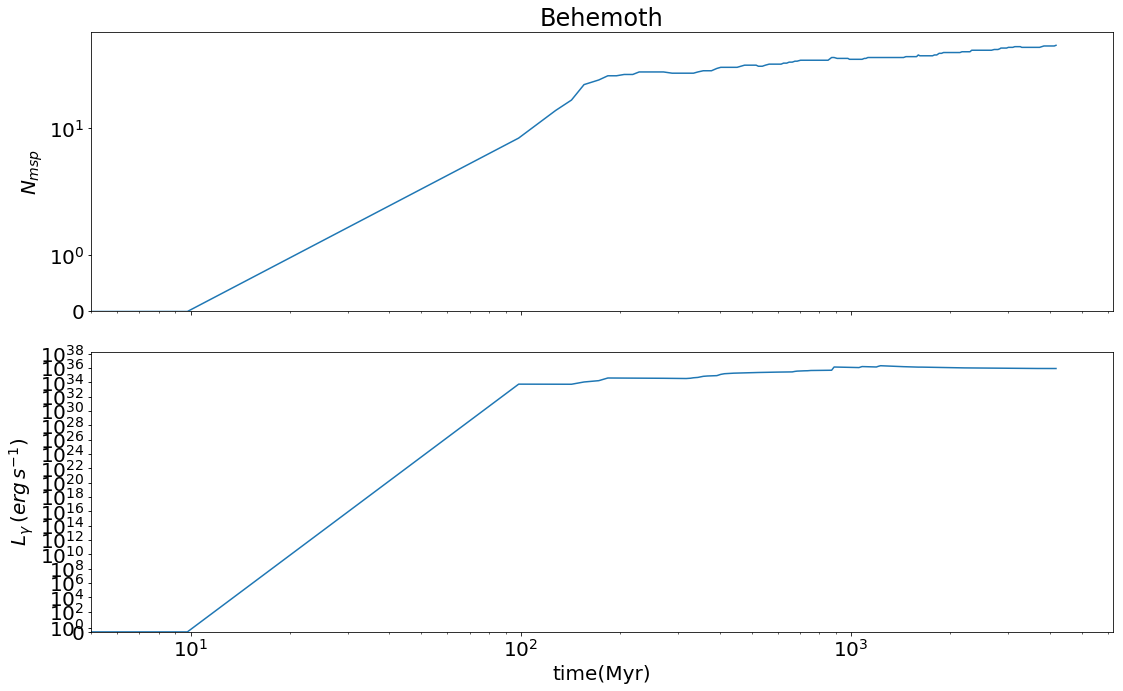

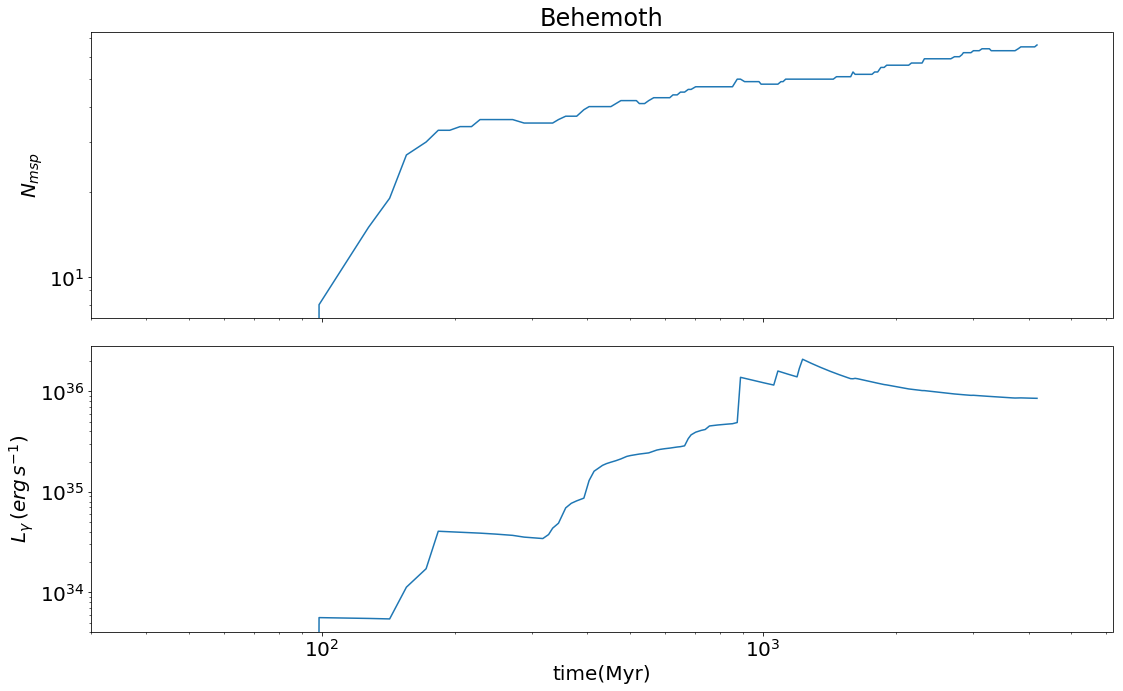

In [8]:
##Behemoth model
##Distribution of Gamma-ray luminosity vs. time and Nmsp vs. time
data_lg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/Lgamma_alltime_behemoth.dat')
t_myr_lg = data_lg[:,0]; lmsp_lg = data_lg[:,2]

data_nns = np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/ns.dat')
t_ns = data_nns[:,0]; Nmsp = data_nns[:,6]
t_conv = 4422.11
t_ns = t_conv*np.array(t_ns)


matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=2, figsize = (16,10), sharex=True)
axs[0].plot(t_ns, Nmsp)
axs[1].plot(t_myr_lg, lmsp_lg)
    
    
axs[0].set_xscale('log')
axs[0].set_yscale('symlog')
axs[0].set_xlim(xmin = 5)
axs[0].set_ylim(ymin = 0)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel(r'$N_{msp}$')
axs[0].set_title('Behemoth')

axs[1].set_xscale('log')
axs[1].set_yscale('symlog')
axs[1].set_xlim(xmin = 5)
axs[1].set_ylim(ymin = 0)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel(r'$L_{\gamma}\,(erg\,s^{-1})$')
axs[1].set_xlabel('time(Myr)')

plt.tight_layout()

matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=2, figsize = (16,10), sharex=True)
axs[0].plot(t_ns, Nmsp)
axs[1].plot(t_myr_lg, lmsp_lg)
    
    
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(xmin = 30)
#axs[0].set_ylim(ymin = 0)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel(r'$N_{msp}$')
axs[0].set_title('Behemoth')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlim(xmin = 30)
#axs[1].set_ylim(ymin = 0)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel(r'$L_{\gamma}\,(erg\,s^{-1})$')
axs[1].set_xlabel('time(Myr)')

plt.tight_layout()

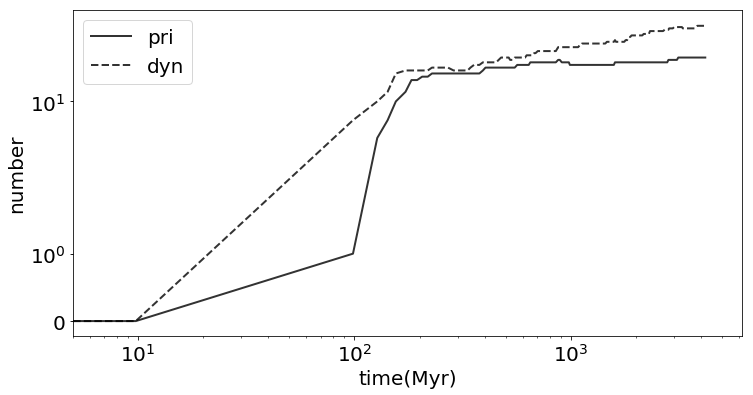

In [14]:
##Plot number of pulsars vs. time behemoth(primordial and dynamical)

nsfile = '/projects/b1095/syr904/projects/GCE/behemoth/ns_pridyn.dat'

datans = np.genfromtxt(nsfile)
times = np.array(datans[:,0])
n_pri = np.array(datans[:,3])+np.array(datans[:,6])
n_dyn = np.array(datans[:,4])+np.array(datans[:,7])
    
    
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(figsize = (12,6))
axs.plot(times, n_pri, label = 'pri', color = 'k', lw = 2, alpha=0.8)
axs.plot(times, n_dyn, label = 'dyn', color = 'k', ls = '--', lw = 2, alpha=0.8)
     
axs.set_xscale('log')
axs.set_yscale('symlog')
axs.set_xlim(xmin = 5)
axs.set_xlabel('time(Myr)')
axs.set_ylabel('number')
axs.legend(loc='best')

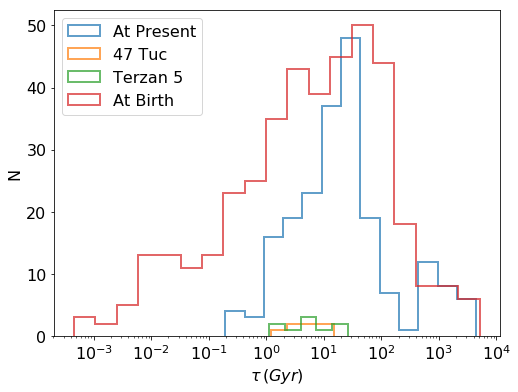

In [22]:
##Characteristic spin-down time-scale for all catalog msps at last time step and at birth
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_maingrid_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_catalog_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
status_last=np.array(msp_last[:,2]); index_last=np.where(status_last==1)
Pdot_last=Kconst*yearsc*B_last*B_last/P_last
#print(Pdot_last)

B_birth=np.array(msp_birth[:,8]); P_birth=np.array(msp_birth[:,9])
status_birth=np.array(msp_birth[:,12]); index_birth=np.where(status_birth==1)
Pdot_birth=Kconst*yearsc*B_birth*B_birth/P_birth
#print(Pdot_birth)

tau_last_all=(0.5*P_last/Pdot_last)/yearsc/10**9
tau_birth_all=(0.5*P_birth/Pdot_birth)/yearsc/10**9

##Extract model data from non-disrupted models
tau_last=tau_last_all[index_last]
tau_birth=tau_birth_all[index_birth]

##47 Tuc and Terzan 5 data
data47tuc=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/47tuc_pulsars.dat')
datater5=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Terzan5_pulsars.dat')
P47=np.array(data47tuc[:,1]); Pdot47=np.array(data47tuc[:,2]); Pdoterr47=np.array(data47tuc[:,3])
P5=np.array(datater5[:,2]); Pdot5=np.array(datater5[:,3])
tau47 = P47*0.001/(Pdot47*10**(-21))/yearsc/10**9
tau5 = P5*0.001/(Pdot5*10**(-21))/yearsc/10**9

#weights = np.ones_like(tau)/float(len(tau))

matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (8, 6))

ax.hist(tau_last, bins=np.logspace(np.log10(min(tau_last)), np.log10(max(tau_last)), 14), histtype='step', lw = 2, alpha=0.7, label='At Present')
ax.hist(tau47, bins=np.logspace(np.log10(min(tau47)), np.log10(max(tau47)), 5), histtype='step', lw = 2, alpha=0.7, label='47 Tuc')
ax.hist(tau5, bins=np.logspace(np.log10(min(tau5)), np.log10(max(tau5)), 6), histtype='step', lw = 2, alpha=0.7, label='Terzan 5')
ax.hist(tau_birth, bins=np.logspace(np.log10(min(tau_birth)), np.log10(max(tau_birth)), 20), histtype='step', lw = 2, alpha=0.7, label='At Birth')

ax.set_xscale('log')
ax.set_xlabel(r'$\tau\,(Gyr)$')
ax.set_ylabel('N')
ax.legend(loc='best')

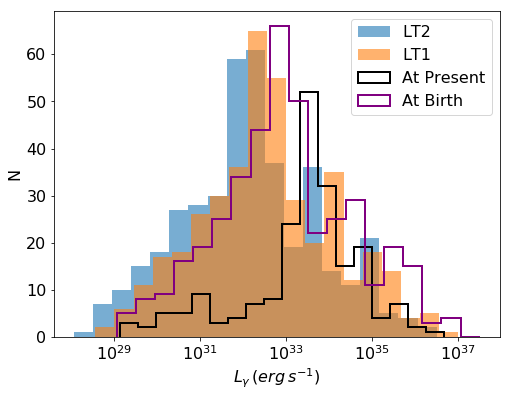

In [24]:
##L_gamma distribution at birth and at present
Cscale=9.6*10**33  ##in erg/s
eta_gamma = 0.1

##L_gamma evolution function
def L_T_2(L0, tau, t):
    Lt = L0*pow(1+(t/tau)**0.5, -2)
    return Lt
    
def L_T_1(L0, tau, t):
    Lt = L0*pow(1+(t/tau)**0.5, -1)
    return Lt
    

###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_maingrid_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_catalog_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
status_last=np.array(msp_last[:,2]); index_last=np.where(status_last==1)

B_birth=np.array(msp_birth[:,8]); P_birth=np.array(msp_birth[:,9]); T_birth_all = np.array(msp_birth[:,1])
status_birth=np.array(msp_birth[:,12]); index_birth=np.where(status_birth==1)

Llast_all = Cscale*(eta_gamma/0.2)*(B_last/10**8.5)**2*(3./(P_last*1000.))**4
Lbirth_all = Cscale*(eta_gamma/0.2)*(B_birth/10**8.5)**2*(3./(P_birth*1000.))**4

Llast=Llast_all[index_last]
Lbirth=Lbirth_all[index_birth]
T_birth=T_birth_all[index_birth]

Lpresent_2 = L_T_2(Lbirth, 3000, 14000.-T_birth)
Lpresent_1 = L_T_1(Lbirth, 3000, 14000.-T_birth)

matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (8, 6))

ax.hist(Lpresent_2, bins=np.logspace(np.log10(min(Lpresent_2)), np.log10(max(Lpresent_2)), 20), histtype='stepfilled', lw = 2, alpha=0.6, label='LT2')
ax.hist(Lpresent_1, bins=np.logspace(np.log10(min(Lpresent_1)), np.log10(max(Lpresent_1)), 20), histtype='stepfilled', lw = 2, alpha=0.6, label='LT1')
ax.hist(Llast, bins=np.logspace(np.log10(min(Llast)), np.log10(max(Llast)), 19), histtype='step', lw = 2, color = 'k', alpha=1, label='At Present')
ax.hist(Lbirth, bins=np.logspace(np.log10(min(Lbirth)), np.log10(max(Lbirth)), 20), histtype='step', lw = 2, color = 'purple', alpha=1, label='At Birth')

ax.set_xscale('log')
ax.set_xlabel(r'$L_{\gamma}\,(erg\,s^{-1})$')
ax.set_ylabel('N')
ax.legend(loc='best')

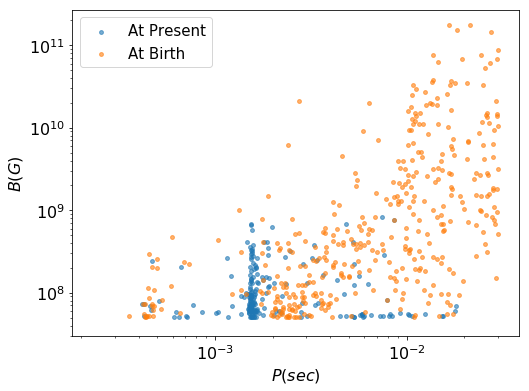

In [33]:
##Distribution of spin period and magnetic field at birth and at present
###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_maingrid_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_catalog_atbirth.dat')

B_last_all=np.array(msp_last[:,4]); P_last_all=np.array(msp_last[:,5])
status_last=np.array(msp_last[:,2]); index_last=np.where(status_last==1)[0]
Pdot_last_all=Kconst*yearsc*B_last_all*B_last_all/P_last_all
#print(Pdot_last)

B_last=B_last_all[index_last]; P_last=P_last_all[index_last]


B_birth_all=np.array(msp_birth[:,8]); P_birth_all=np.array(msp_birth[:,9])
t_evol_all = 14000.-np.array(msp_birth[:,1])
status_birth=np.array(msp_birth[:,12]); index_birth=np.where(status_birth==1)[0]
Pdot_birth_all=Kconst*yearsc*B_birth_all*B_birth_all/P_birth_all
B_presnt_all, P_presnt_all = psrevol.single_psr_evolv_itgstep(B_birth_all, P_birth_all, t_evol_all)
#print(Pdot_birth)


B_birth=B_birth_all[index_birth]; P_birth=P_birth_all[index_birth]
B_presnt=np.array(B_presnt_all)[index_birth]; P_presnt=np.array(P_presnt_all)[index_birth]


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(P_last, B_last, s=15, label = 'At Present', alpha = 0.6)
ax.scatter(P_birth, B_birth, s=15, label = 'At Birth', alpha=0.6)
#ax.scatter(P_presnt, B_presnt, s=15, color = 'k', label = 'At Birth', alpha=0.6)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim(xmin = 0.0002)
ax.set_ylabel(r'$B(G)$')
ax.set_xlabel(r'$P(sec)$')
ax.legend(loc='best', fontsize=15)

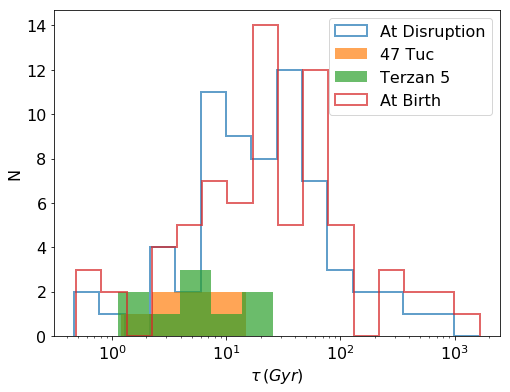

In [4]:
##Characteristic spin-down time-scale for Behemoth msps at last time step and at birth

###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_behemoth_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
Pdot_last=Kconst*yearsc*B_last*B_last/P_last
#print(Pdot_last)

B_birth=np.array(msp_birth[:,7]); P_birth=np.array(msp_birth[:,8])
Pdot_birth=Kconst*yearsc*B_birth*B_birth/P_birth
#print(Pdot_birth)

tau_last=(0.5*P_last/Pdot_last)/yearsc/10**9
tau_birth=(0.5*P_birth/Pdot_birth)/yearsc/10**9


##47 Tuc and Terzan 5 data
data47tuc=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/47tuc_pulsars.dat')
datater5=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Terzan5_pulsars.dat')
P47=np.array(data47tuc[:,1]); Pdot47=np.array(data47tuc[:,2]); Pdoterr47=np.array(data47tuc[:,3])
P5=np.array(datater5[:,2]); Pdot5=np.array(datater5[:,3])
tau47 = P47*0.001/(Pdot47*10**(-21))/yearsc/10**9
tau5 = P5*0.001/(Pdot5*10**(-21))/yearsc/10**9

#weights = np.ones_like(tau)/float(len(tau))

matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (8, 6))

ax.hist(tau_last, bins=np.logspace(np.log10(min(tau_last)), np.log10(max(tau_last)), 17), histtype='step', lw = 2, alpha=0.7, label='At Disruption')
ax.hist(tau47, bins=np.logspace(np.log10(min(tau47)), np.log10(max(tau47)), 5), histtype='stepfilled', lw = 2, alpha=0.7, label='47 Tuc')
ax.hist(tau5, bins=np.logspace(np.log10(min(tau5)), np.log10(max(tau5)), 6), histtype='stepfilled', lw = 2, alpha=0.7, label='Terzan 5')
ax.hist(tau_birth, bins=np.logspace(np.log10(min(tau_birth)), np.log10(max(tau_birth)), 17), histtype='step', lw = 2, alpha=0.7, label='At Birth')

ax.set_xscale('log')
ax.set_ylabel('N')
ax.set_xlabel(r'$\tau\,(Gyr)$')
ax.legend(loc='best')

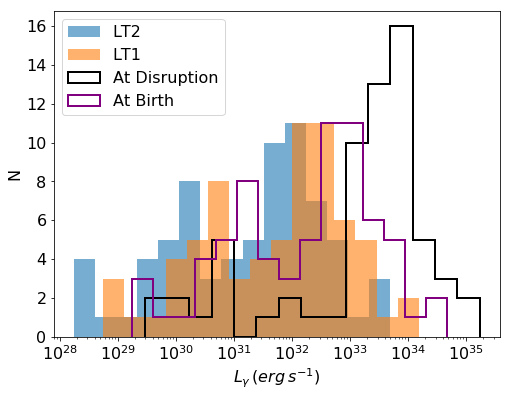

In [5]:
##L_gamma distribution at birth and at present for Behemoth
Cscale=9.6*10**33  ##in erg/s
eta_gamma = 0.1

##L_gamma evolution function
def L_T_2(L0, tau, t):
    Lt = L0*pow(1+(t/tau)**0.5, -2)
    return Lt
    
def L_T_1(L0, tau, t):
    Lt = L0*pow(1+(t/tau)**0.5, -1)
    return Lt
    

###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_behemoth_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
B_birth=np.array(msp_birth[:,7]); P_birth=np.array(msp_birth[:,8]); T_birth = np.array(msp_birth[:,0])

Llast = Cscale*(eta_gamma/0.2)*(B_last/10**8.5)**2*(3./(P_last*1000.))**4
Lbirth = Cscale*(eta_gamma/0.2)*(B_birth/10**8.5)**2*(3./(P_birth*1000.))**4

Lpresent_2 = L_T_2(Lbirth, 3000, 14000.-T_birth)
Lpresent_1 = L_T_1(Lbirth, 3000, 14000.-T_birth)

matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (8, 6))

ax.hist(Lpresent_2, bins=np.logspace(np.log10(min(Lpresent_2)), np.log10(max(Lpresent_2)), 16), histtype='stepfilled', lw = 2, alpha=0.6, label='LT2')
ax.hist(Lpresent_1, bins=np.logspace(np.log10(min(Lpresent_1)), np.log10(max(Lpresent_1)), 16), histtype='stepfilled', lw = 2, alpha=0.6, label='LT1')
ax.hist(Llast, bins=np.logspace(np.log10(min(Llast)), np.log10(max(Llast)), 16), histtype='step', lw = 2, color = 'k', alpha=1, label='At Disruption')
ax.hist(Lbirth, bins=np.logspace(np.log10(min(Lbirth)), np.log10(max(Lbirth)), 16), histtype='step', lw = 2, color = 'purple', alpha=1, label='At Birth')

ax.set_xscale('log')
ax.set_xlabel(r'$L_{\gamma}\,(erg\,s^{-1})$')
ax.set_ylabel('N')
ax.legend(loc='upper left')

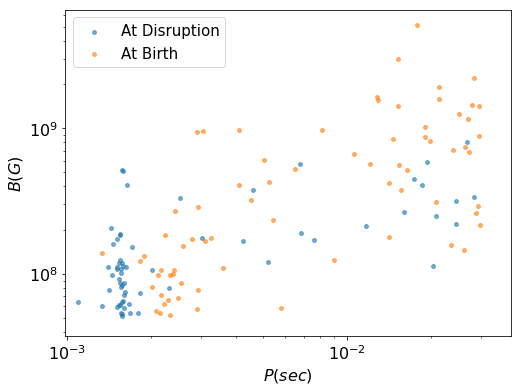

In [4]:
##Distribution of spin period and magnetic field at birth and at present
###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_behemoth_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
Pdot_last=Kconst*yearsc*B_last*B_last/P_last
#print(Pdot_last)

B_birth=np.array(msp_birth[:,7]); P_birth=np.array(msp_birth[:,8])
Pdot_birth=Kconst*yearsc*B_birth*B_birth/P_birth
#print(Pdot_birth)


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(P_last, B_last, s=15, label = 'At Disruption', alpha = 0.6)
ax.scatter(P_birth, B_birth, s=15, label = 'At Birth', alpha=0.6)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim(xmin = 0.0002)
ax.set_ylabel(r'$B(G)$')
ax.set_xlabel(r'$P(sec)$')
ax.legend(loc='best', fontsize=15)

In [2]:
##Calculating the mass density at half-mass radius
rho_rh, m_rh, r_rh = gce.find_rh_density('/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg2/z0.0002/8e5/', 
                                        'initial.snap0649.dat.gz')
print(rho_rh)
#plt.figure()
#plt.

0.5
7.6977182
230.66296113467206


### (Semi-)Analytical Models

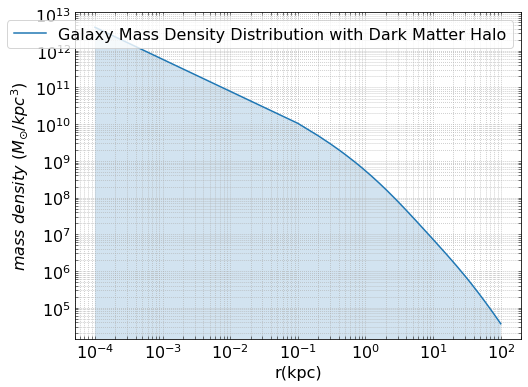

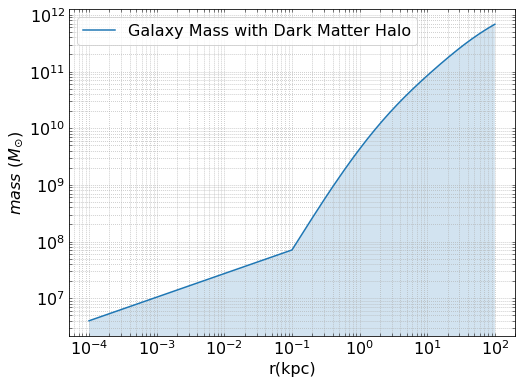

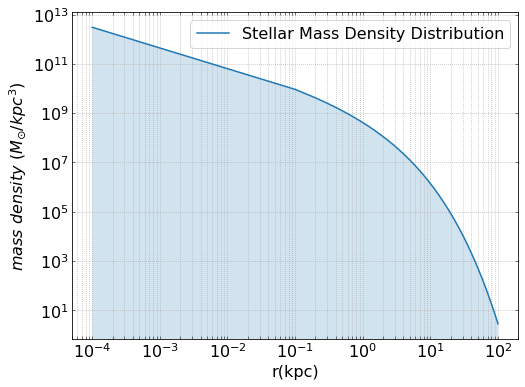

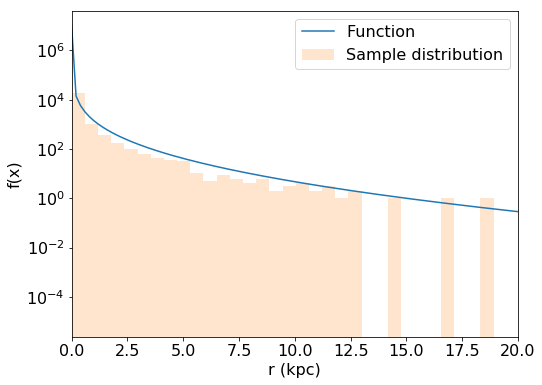

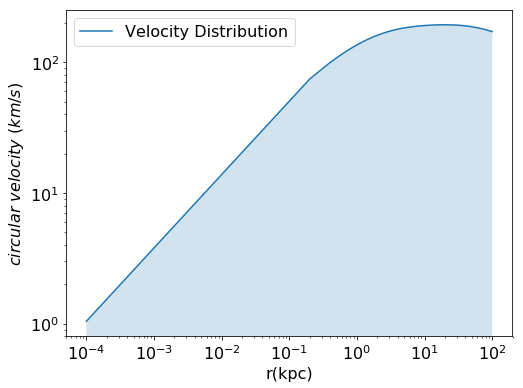

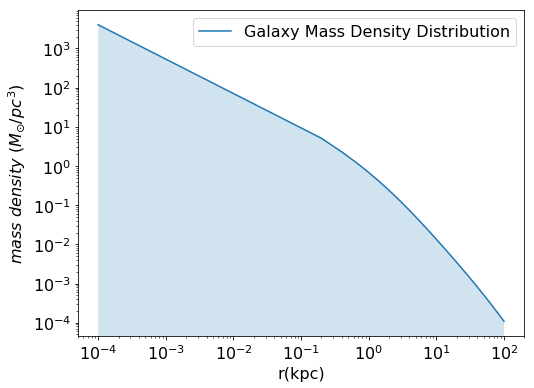

In [7]:
plt.rcParams['figure.figsize'] = [8, 6]
matplotlib.rcParams.update({'font.size': 16})

xmin_sample = 0.0001; xmax_sample = 100

##Plot galaxy mass density distribution with dark matter halo
xs = np.linspace(xmin_sample, xmax_sample, 1000)
ys = []; ys_mass = []
for ii in range(len(xs)):
    ys.append(csv1.gdf(xs[ii]))
    ys_mass.append(2*twopi*integrate.quad(lambda x: csv1.gdf(x)*x*x, 0, xs[ii])[0])


#rho0=6554555.914476572
plt.plot(xs, np.array(ys), label='Galaxy Mass Density Distribution with Dark Matter Halo')
plt.fill_between(xs, np.array(ys), 0, alpha=0.2)
#plt.xlim(0.001, xmax_sample*1.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("r(kpc)")
plt.ylabel(r'$mass\ density\ (M_{\odot}/kpc^3)$')
plt.legend()
plt.grid(linestyle=':',which='major',linewidth='0.75')
plt.grid(linestyle=':',which='minor',linewidth='0.75')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.tick_params('both',length=3,width=0.5,which='both',direction = 'in')
plt.show()


plt.plot(xs, np.array(ys_mass)+4e6, label='Galaxy Mass with Dark Matter Halo')
plt.fill_between(xs, np.array(ys_mass)+4e6, 0, alpha=0.2)
#plt.xlim(0.001, xmax_sample*1.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("r(kpc)")
plt.ylabel(r'$mass\ (M_{\odot})$')
plt.legend()
plt.grid(linestyle=':',which='major',linewidth='0.75')
plt.grid(linestyle=':',which='minor',linewidth='0.75')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.tick_params('both',length=3,width=0.5,which='both',direction = 'in')
plt.show()


##Plot stellar mass density distribution
xs = np.linspace(xmin_sample, xmax_sample, 1000)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.smdf(xs[ii]))

plt.plot(xs, ys, label='Stellar Mass Density Distribution') 
plt.fill_between(xs, ys, 0, alpha=0.2)
#plt.xlim(0.001, xmax_sample*1.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("r(kpc)")
plt.ylabel(r'$mass\ density\ (M_{\odot}/kpc^3)$')
plt.legend()
plt.grid(linestyle=':',which='major',linewidth='0.75')
plt.grid(linestyle=':',which='minor',linewidth='0.75')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.tick_params('both',length=3,width=0.5,which='both',direction = 'in')
plt.show()

#print(csv1.smdf(xmin_sample))
##Plot VN sampling disrtribution
samps = csv1.VN_sampling(csv1.smdf, xmin_sample, xmax_sample, csv1.smdf(xmin_sample), 20000)
xs = np.linspace(xmin_sample, xmax_sample, 500)
ys = csv1.smdf(xs)

plt.plot(xs, ys/(3*1e5), label="Function")
#plt.hist(samps, bins=np.logspace(np.log10(xmin_sample), np.log10(xmax_sample), 30),
#    density=False, alpha=0.2, label="Sample distribution")
plt.hist(samps, bins=50,
    density=False, alpha=0.2, label="Sample distribution")
#bins = np.logspace(np.log10(xmin_sample), np.log10(xmax_sample), 10),
plt.xlim(xmin_sample/2, 20.)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel("r (kpc)")
plt.ylabel("f(x)") 
plt.legend()
plt.show()


##Plot velocity distribution
xs = np.linspace(xmin_sample, xmax_sample, 500)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.circ_vel(xs[ii], 0, csv1.gdf))

plt.plot(xs, ys, label='Velocity Distribution') 
plt.fill_between(xs, ys, 0, alpha=0.2)
#plt.xlim(0, 30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("r(kpc)")
plt.ylabel(r'$circular\ velocity\ (km/s)$')
plt.legend()
plt.show()


##Plot galaxy_rho_r
xs = np.linspace(xmin_sample, xmax_sample, 500)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.galaxy_rho_r(xs[ii], 0, csv1.circ_vel))

plt.plot(xs, ys, label='Galaxy Mass Density Distribution') 
plt.fill_between(xs, ys, 0, alpha=0.2)
#plt.xlim(0, 30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("r(kpc)")
plt.ylabel(r'$mass\ density\ (M_{\odot}/pc^3)$')
plt.legend()
plt.show()

[21774.36880267937, 4517.998564213389, 2771.475808629867, 2021.2021804457518, 1597.4828377377546, 1323.485612192757, 1131.0954647843096, 988.2631909757257, 877.8573658476023, 789.8642619393477, 718.0282605009941, 658.2348297160893, 607.663953915254, 564.3166193704188, 533.3915230789311, 506.1586147512917, 478.3142817260438, 453.49416559269036, 431.2238203785671, 411.12381919532316, 392.8870013000501, 376.2619763184498, 361.040962197655, 347.0506817176557, 334.1454545222051, 322.2018895650058, 311.1147606138064, 300.79376755838825, 291.16096879507694, 282.1487275465245, 273.6980557307049, 265.75726821724214, 258.28088151896316, 251.22870653517043, 244.56509651053773, 238.25832002319285, 232.28003535384465, 226.6048475731989, 221.20993351671206, 216.07472278365574, 211.18062521260978, 206.51079710391394, 202.04993989692213, 197.78412615319434, 193.7006486108524, 189.78788881107297, 186.03520239222044, 182.43281863015645, 178.9717521979587, 175.64372544173514, 172.44109973557465, 169.3568

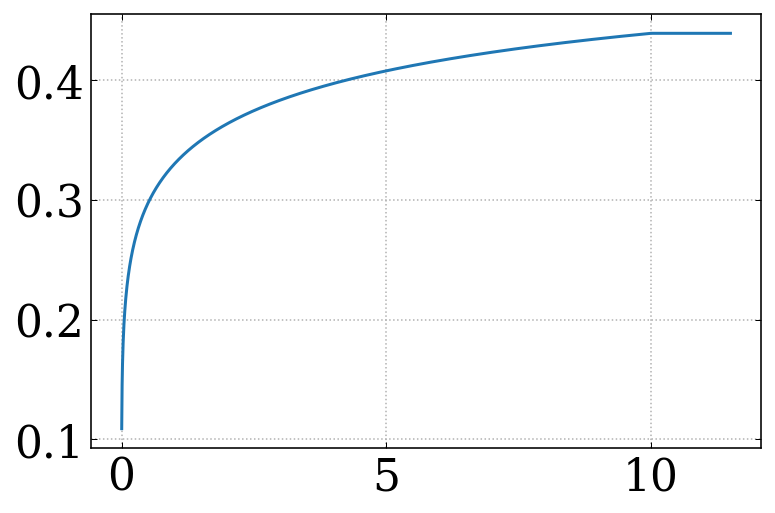

In [4]:
##Check mass loss function
##Kroupa01 IMF; mmin=0.08, mmax=150
alpha = [-1.3, -2.3]
m_break = 0.5
coeff_low = 1; coeff_high=m_break**(-alpha[1]+alpha[0])
mlow = coeff_low*integrate.quad(lambda x: x*x**alpha[0], 0.08, m_break)[0]
mhigh = coeff_high*integrate.quad(lambda x: x*x**alpha[1], m_break, 150)[0]
m_tot = mlow+mhigh

##mass loss from stellar evolution
def star_evolv(t_current, mulim, M_init, m_tot_kroupa):
    m_to = (10/t_current)**0.4  ##solar mass
    if m_to > 30:
        m_se = 0.9*integrate.quad(lambda x: x*x**alpha[1], m_to, mulim)[0]
        
    elif m_to > 8 and mulim > 30:
        m_se1 = 0.9*integrate.quad(lambda x: x*x**alpha[1], 30, mulim)[0]
        m_se2 = integrate.quad(lambda x: (x-1.4)*x**alpha[1], m_to, 30)[0]
        m_se = m_se1+m_se2

    elif m_to > 8 and mulim <= 30:
        m_se = integrate.quad(lambda x: (x-1.4)*x**alpha[1], m_to, mulim)[0]

    elif m_to > 1 and mulim > 8:
        m_se1 = integrate.quad(lambda x: (x-1.4)*x**alpha[1], 8, mulim)[0]
        m_se2 = integrate.quad(lambda x: (x-(0.109*x+0.394))*x**alpha[1], m_to, 8)[0]
        m_se = m_se1+m_se2

    elif m_to >1 and mulim <=8:
        m_se = integrate.quad(lambda x: (x-(0.109*x+0.394))*x**alpha[1], m_to, mulim)[0]

    elif m_to >0.08 and mulim >1:
        m_se = integrate.quad(lambda x: (x-(0.109*x+0.394))*x**alpha[1], 1, mulim)[0]

    elif m_to >0.08 and mulim <=1:
        m_se = 0

    else:
        print('error', m_to, mulim)

    m_frac = coeff_high*m_se/m_tot_kroupa
    m_ml = m_frac*M_init

    return m_ml, m_to


time_steps = np.linspace(0, 11.5, 3000) ##Gyr
mup_lim = 150
M_se = []
Minit = 2e5
for ii in range(1, len(time_steps)):
    m_ml, m_to = star_evolv(time_steps[ii], mup_lim, Minit, m_tot)
    mup_lim=m_to
    M_se.append(m_ml)
    #Minit = Minit-m_ml
    
print(M_se)

plt.figure()
plt.plot(time_steps[1:], np.cumsum(M_se)/2e5)
plt.grid(linestyle=':',which='major',linewidth='0.75')
plt.grid(linestyle=':',which='minor',linewidth='0.75')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.tick_params('both',length=3,width=0.5,which='both',direction = 'in')

Counter({4: 569, 6: 525, 8: 519, 11: 501, 3: 472, 2: 437, 5: 414, 7: 371, 12: 370, 13: 327, 10: 324, 9: 303, 18: 279, 1: 250, 17: 247, 19: 218, 20: 196, 14: 188, 16: 175, 15: 161, 21: 156, 22: 124, 23: 122, 29: 120, 24: 89, 28: 78, 26: 68, 30: 68, 25: 67, 27: 67, 43: 49, 34: 45, 39: 44, 32: 43, 35: 41, 44: 40, 38: 40, 31: 40, 45: 37, 36: 35, 33: 33, 41: 32, 37: 28, 46: 28, 40: 27, 42: 27, 48: 19, 47: 19, 49: 19, 50: 15, 51: 15, 54: 14, 58: 14, 53: 14, 57: 13, 55: 13, 56: 10, 52: 10, 60: 9, 63: 8, 65: 7, 66: 7, 62: 7, 61: 6, 59: 6, 67: 5, 68: 5, 75: 5, 79: 4, 73: 4, 71: 4, 64: 4, 85: 4, 84: 3, 72: 3, 69: 3, 74: 3, 76: 3, 70: 3, 80: 2, 82: 2, 83: 2, 78: 2, 89: 2, 113: 1, 141: 1, 144: 1, 104: 1, 129: 1, 159: 1, 118: 1, 110: 1, 155: 1, 93: 1, 97: 1, 94: 1, 153: 1, 140: 1, 128: 1, 90: 1}) 250


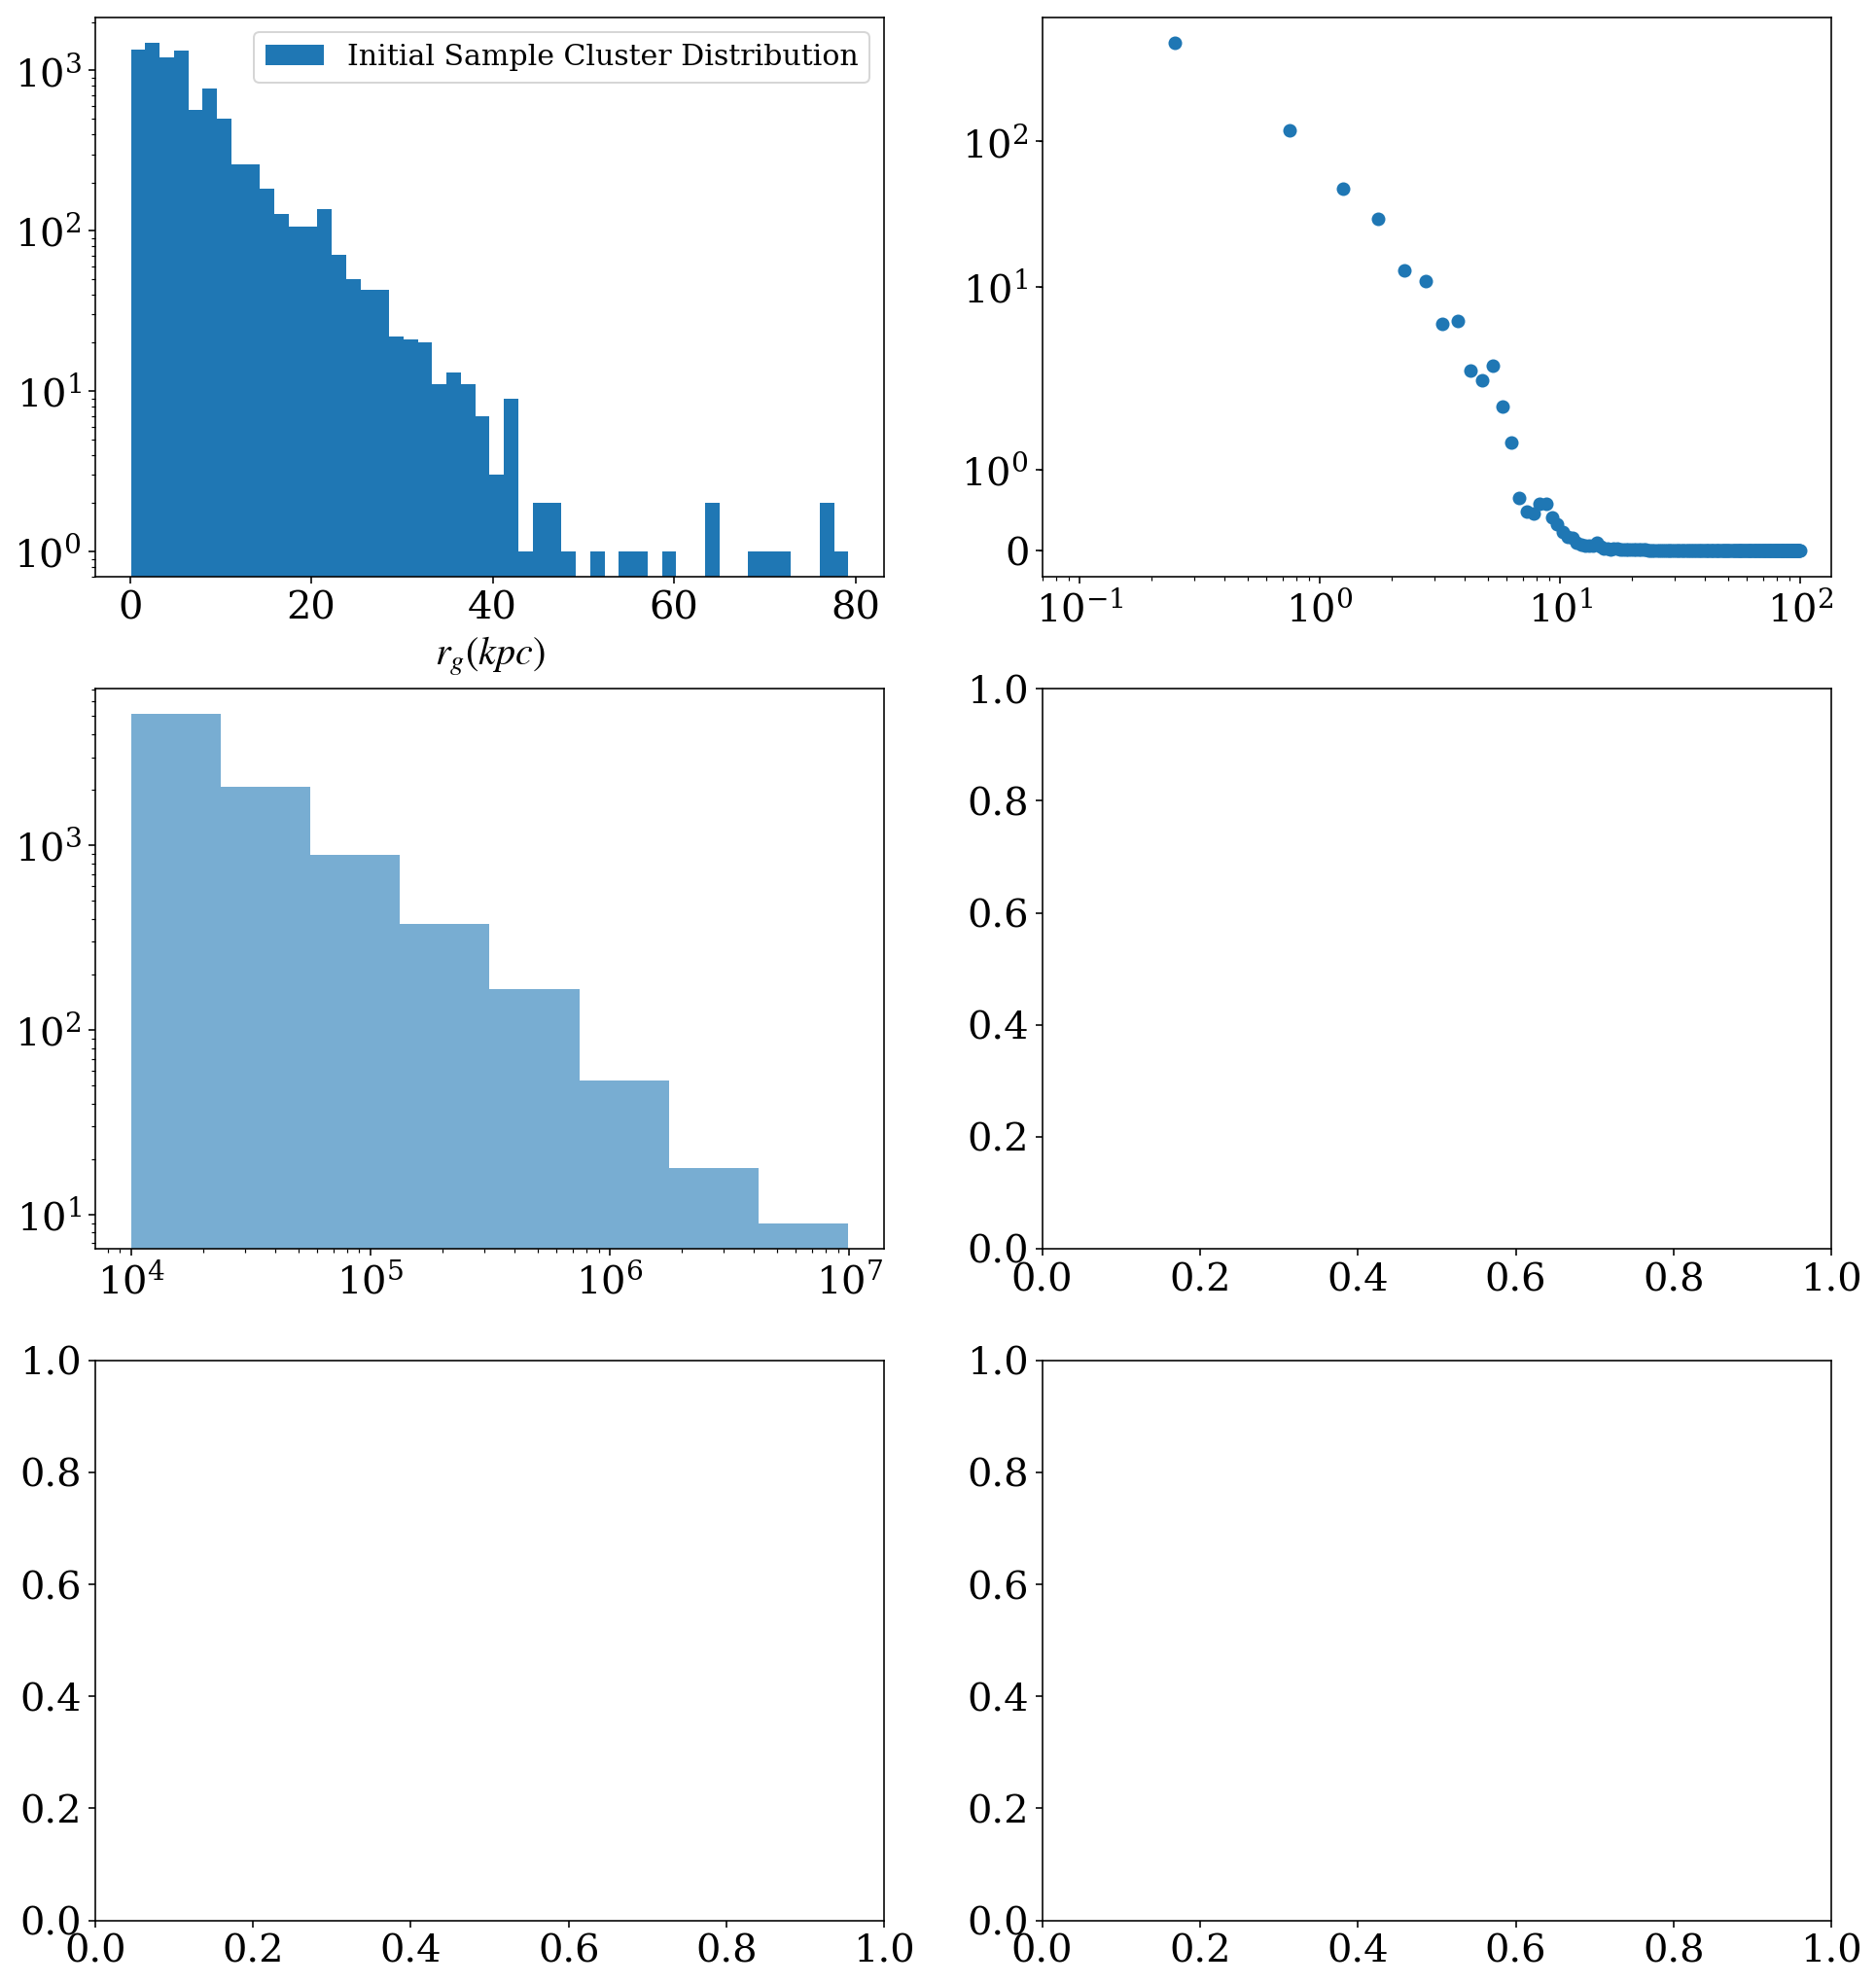

In [3]:
##Plot the sampling of the initial distribution of clusters in the galaxy
sample_init = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/samples/cluster_analytical_initial_M_RG_fcl0.012_ffa0.012_xcut110_xmin0.1_xmax100_mmin10000_mmax10000000_min_rhoh1000_nmspfit.dat') 
                            #dtype = str)
##For catalog models
#nstar_init = sample_init[:,0]; rv_init = sample_init[:,1]
#rg_model_init = sample_init[:,2]; z_init = sample_init[:,3]
#rg_init = sample_init[:,5].astype(np.float)

##For analytic models
M_init = sample_init[:,0]
rg_init = sample_init[:,1]

#################################
rg_bins = np.linspace(0, 100, 201)
bin_indices = np.digitize(rg_init, rg_bins)
allbin = Counter(bin_indices)
print(allbin, allbin[1])
x_density = []; y_density = []
for ii in range(len(rg_bins)-1):
    vol = (2.*twopi/3.)*(rg_bins[ii+1]**3-rg_bins[ii]**3)
    x_density.append((rg_bins[ii+1]+rg_bins[ii])/2.)
    y_density.append(allbin[ii+1]/vol)


    
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (16,18))
#axs[0][0].hist(rg_init, bins = np.logspace(np.log10(min(rg_init)), np.log10(max(rg_init)), 50))
axs[0][0].hist(rg_init, bins = 50, label = 'Initial Sample Cluster Distribution')
#axs.set_xscale('log')
axs[0][0].set_yscale('log')
#axs[0][0].set_xscale('log')
axs[0][0].set_xlabel(r'$r_g(kpc)$')
axs[0][0].legend(fontsize=15)


axs[0][1].scatter(x_density, y_density)
axs[0][1].set_yscale('symlog')
axs[0][1].set_xscale('log')
axs[0][1].set_xlim(xmin = 0.07)

##For catalog models
#axs[1][0].hist(nstar_init)
#axs[1][0].set_xlabel(r'$N$')
#axs[1][0].set_yscale('log')

#axs[1][1].hist(rv_init)
#axs[1][1].set_xlabel(r'$rv(pc)$')

#axs[2][0].hist(rg_model_init)
#axs[2][0].set_xlabel(r'$r_g(model; kpc)$')
#axs[2][0].set_yscale('log')

#axs[2][1].hist(z_init)
#axs[2][1].set_xlabel(r'$metallicty$')

##For analytical models
axs[1][0].hist(M_init,
              bins = np.logspace(np.log10(np.min(M_init)), np.log10(np.max(M_init)), 9),
              alpha=0.6)
axs[1][0].set_xscale('log')
axs[1][0].set_yscale('log')

[ 38  14  17   4  10  10   5   4   6   5   5   6   4   9   6   7   6   9
   5   7  13  20  18  14  23  34  14  25  30  44  69  72  58  55  51  60
  65 113  98  74  76 102 133 168 147 161 104 102 139 243 175 124 179 274
 246 191 164 145 303 367 305 293 185 176 160 215 288 304 255 199 180 138
 113 130 184  90  88  85  96  78 125  70  53  48  42  27  29  17  18   8
  11   3   3   1   2   1   2   0   3   3]
[40882.36164425326, 12328.713164635667, 12253.946167062237, 2360.0672148677645, 4829.494928963613, 3953.1113558038483, 1617.8802981721744, 1059.4335139568284, 1300.7753552939248, 887.2752920676027, 726.2660142287939, 713.3691130219395, 389.2784625923453, 716.9357356777033, 391.22473326588505, 373.60306165376994, 262.1204897897543, 321.83225161780433, 146.35056129602788, 167.71031008752806, 254.94259851103942, 321.045350919703, 236.50821400674914, 150.57022276611278, 202.47724692608566, 244.99918629725002, 82.57547763726349, 120.69809101610049, 118.55475603250706, 142.3271446738921, 182.

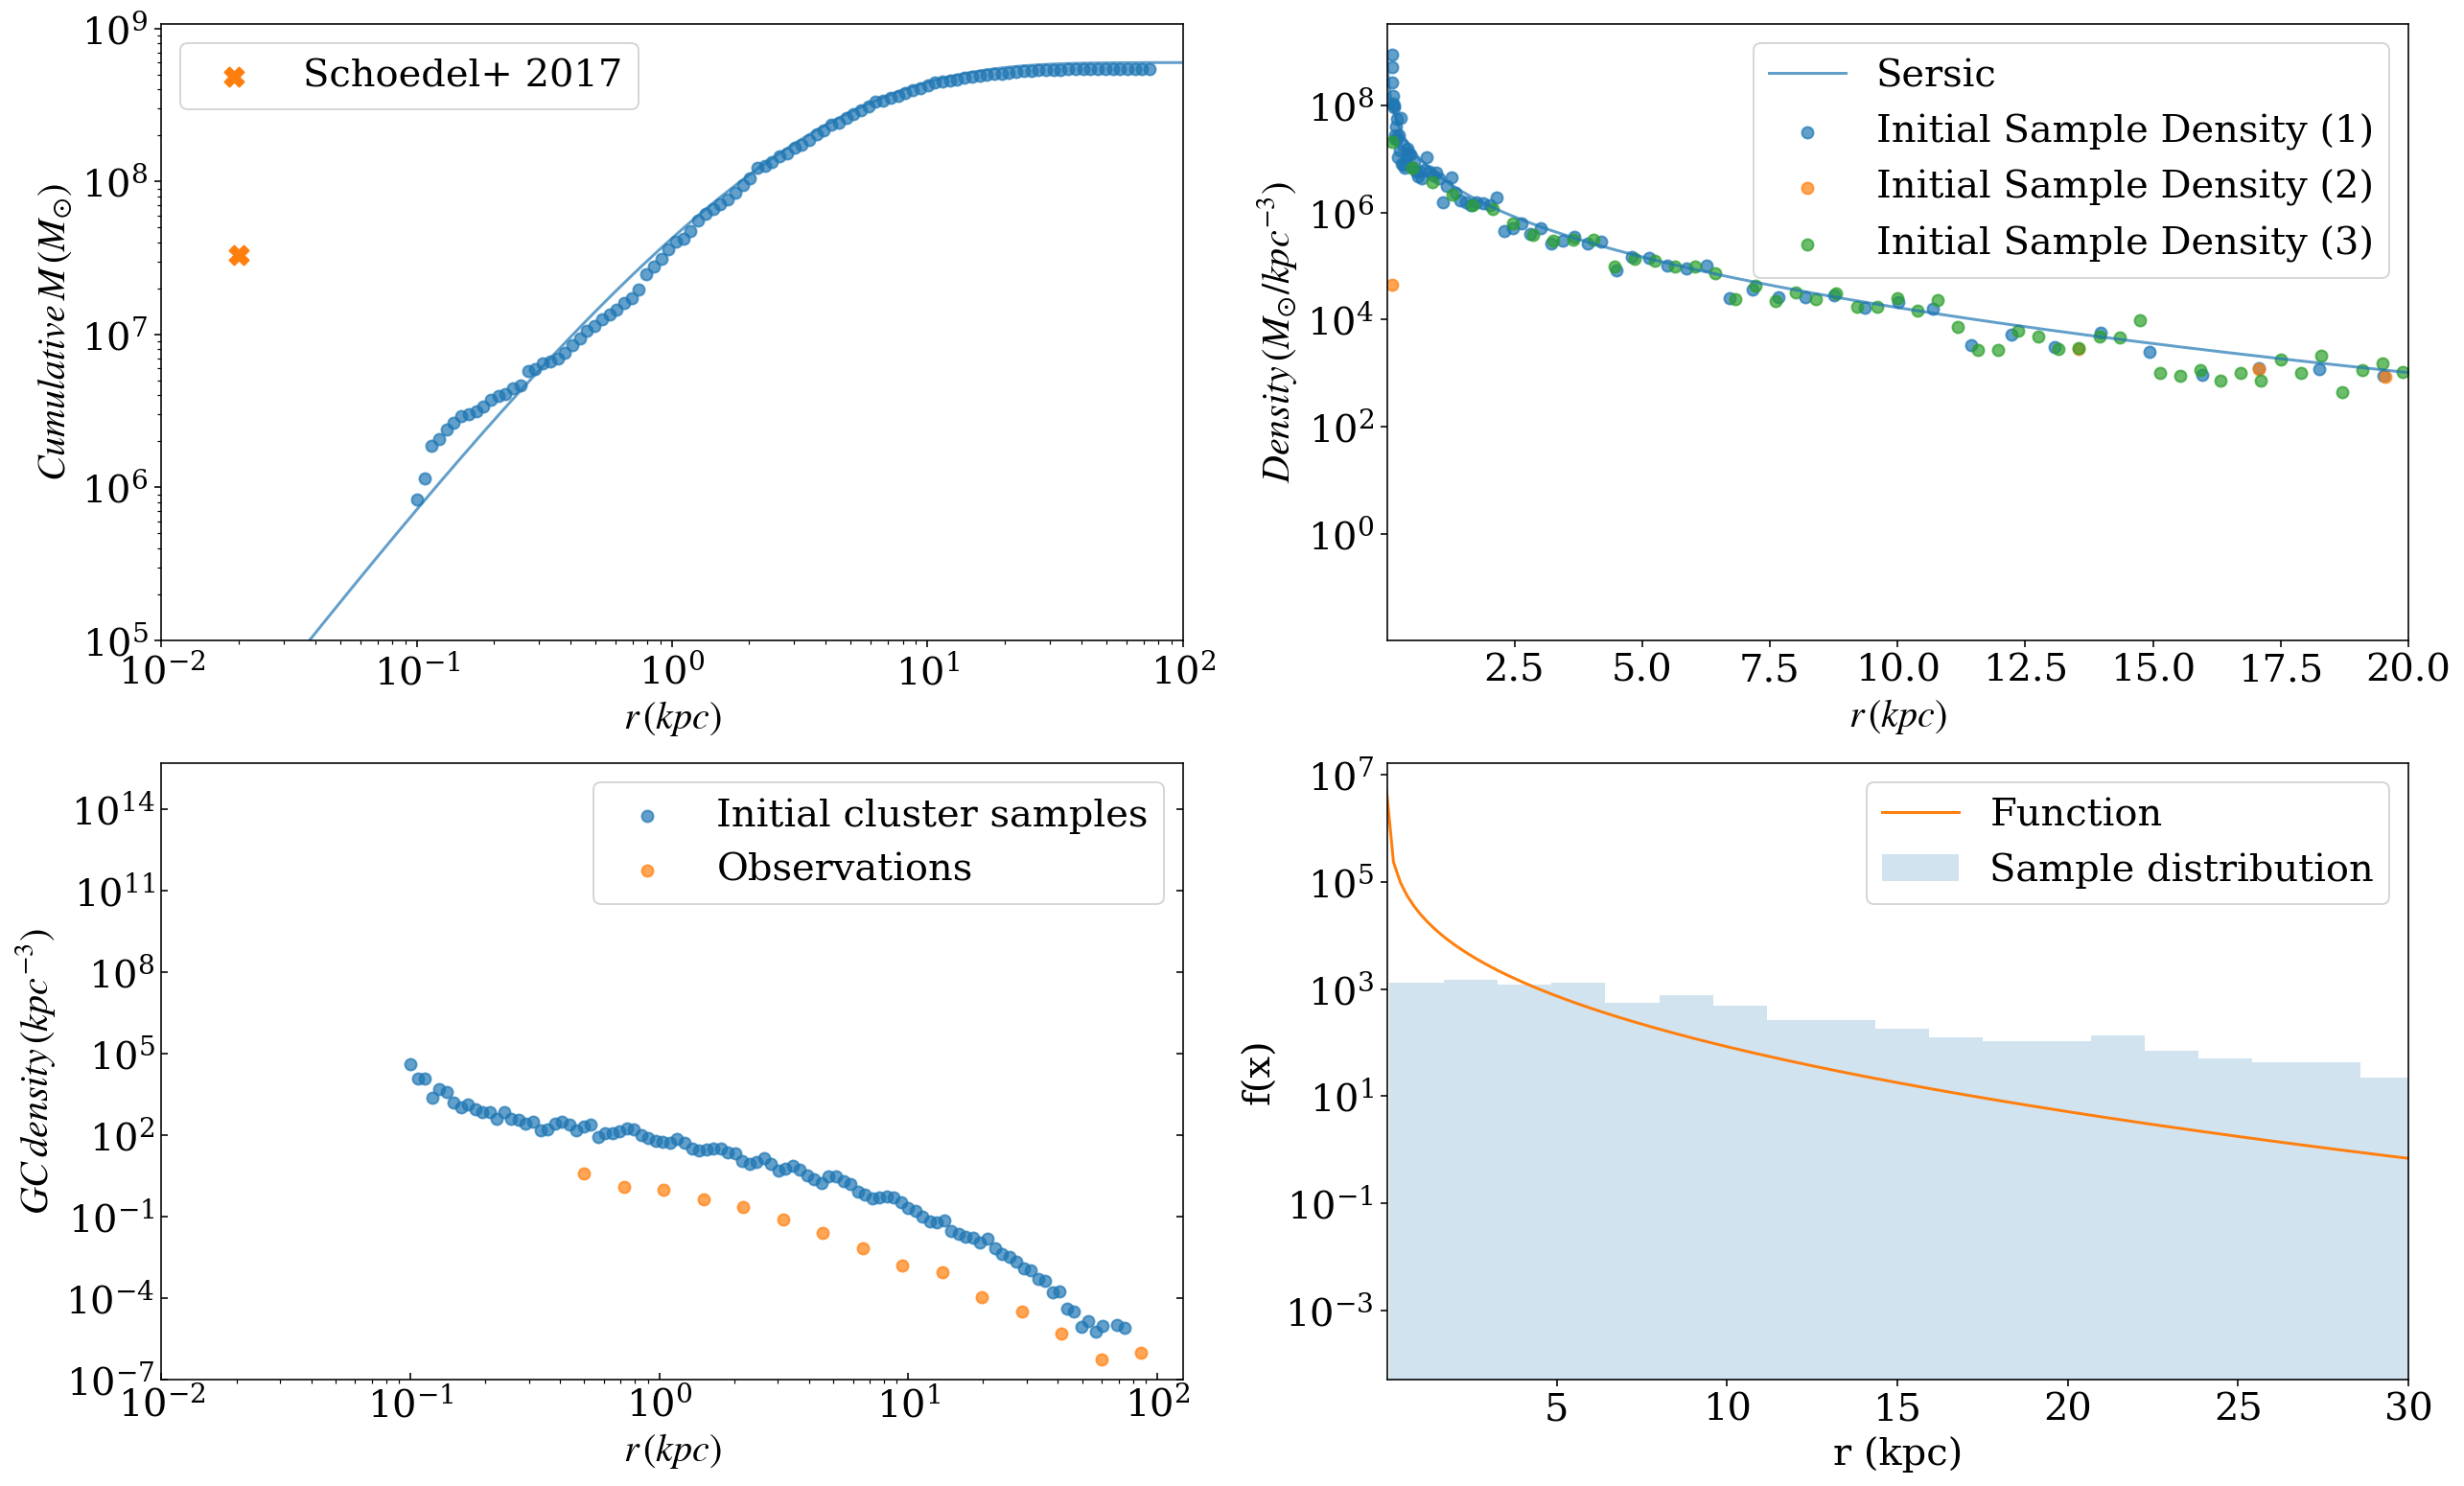

In [4]:
##Cumulative mass of initial clusters as a function of the galactocentric radius
##Inital cluster number density distribution
#sample_init = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_initial_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive_small.dat', 
#                            dtype = str)
#Mgc_init = sample_init[:,8].astype(np.float)
#Rg_init = sample_init[:,5].astype(np.float)
#print(Mgc)


######For analytical models######
sample_init = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/samples/cluster_analytical_initial_M_RG_fcl0.012_ffa0.012_xcut110_xmin0.1_xmax100_mmin10000_mmax10000000_min_rhoh1000_nmspfit.dat', 
                            dtype = str)
Mgc_init = sample_init[:,0].astype(np.float)
Rg_init = sample_init[:,1].astype(np.float)
############


logbin_init = np.logspace(np.log10(min(Rg_init)), np.log10(max(Rg_init)), 101)
ngc_init, rgc_init= np.histogram(Rg_init, bins = logbin_init)
print(ngc_init)


mgc_init = np.zeros(100)

for jj in range(len(rgc_init)-1):
    for xx in range(len(Rg_init)):
        if rgc_init[jj]<=Rg_init[xx]<rgc_init[jj+1]:
            mgc_init[jj]+=Mgc_init[xx]
    
cumul_mgc_init = np.cumsum(mgc_init)


#####Density (1); Binned evenly in logscale
density_init = []; rkpc_init = []; density_init_err = []
mass_density_init = []
for xx in range(len(ngc_init)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol_init = (2.*twopi/3.)*(rgc_init[xx+1]**3-rgc_init[xx]**3)
    density_init.append(ngc_init[xx]/vol_init)
    density_init_err.append(math.sqrt(ngc_init[xx])/vol_init)
    mass_density_init.append(mgc_init[xx]/vol_init)
    rkpc_init.append(rgc_init[xx])
print(density_init)
    
    
#####Density (2); Binned with equal volumn
volbin_init = np.linspace((2*twopi/3.)*min(Rg_init)**3, (2*twopi/3.)*max(Rg_init)**3, 201)
#print(volbin_init)
vol_diff = volbin_init[1]-volbin_init[0]
vol2rg_bin = (volbin_init*(3./2/twopi))**(1./3.)
#print(min(Rg_init), max(Rg_init))
#print(vol2rg_bin)
mden_init = []
m_equalvol = np.zeros(200)
for kk in range(len(vol2rg_bin)-1):
    for zz in range(len(Rg_init)):
        if vol2rg_bin[kk]<=Rg_init[zz]<vol2rg_bin[kk+1]:
            m_equalvol[kk]+=Mgc_init[zz]
    
for zz in range(len(volbin_init)-1):
    mden_init.append(m_equalvol[zz]/vol_diff)
    
#print(mden_init)
#####Density (3); Binned evenly in linear scale
linbin_init = np.linspace(min(Rg_init), max(Rg_init), 201)
ngc_init_lin, rgc_init_lin= np.histogram(Rg_init, bins = linbin_init)

m_lin = np.zeros(200)
for kk in range(len(rgc_init_lin)-1):
    for zz in range(len(Rg_init)):
        if rgc_init_lin[kk]<=Rg_init[zz]<rgc_init_lin[kk+1]:
            m_lin[kk]+=Mgc_init[zz]

mden_init_lin = []
for xx in range(len(rgc_init_lin)-1):
    vol_init_lin = (2.*twopi/3.)*(rgc_init_lin[xx+1]**3-rgc_init_lin[xx]**3)
    mden_init_lin.append(m_lin[xx]/vol_init_lin)

    
    
##########################################################    
##Observed cluster position
f_gc = 0.012
x_min = 0.01; x_max = 100.

data_harris = pd.read_excel('/projects/b1095/syr904/projects/harris_catalog/harris_part1.xlsx',
                           names = ['ID', 'L', 'B', 'Rsun', 'Rgc', 'X', 'Y', 'Z'])
R_gc = list(data_harris['Rgc'])
#print(min(R_gc), max(R_gc))

logbin = np.logspace(np.log10(min(R_gc)), np.log10(max(R_gc)), 16)
ngc_hist, rgc_hist = np.histogram(R_gc, bins=logbin)
#print(ngc_hist, rgc_hist)

density = []; rkpc = []; density_err = []
for xx in range(len(ngc_hist)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol = (2.*twopi/3.)*(rgc_hist[xx+1]**3-rgc_hist[xx]**3)
    density.append(ngc_hist[xx]/vol)
    density_err.append(math.sqrt(ngc_hist[xx])/vol)
    rkpc.append(rgc_hist[xx])
#print(density_err)

##Galaxy cumulative mass
rg_bin = np.logspace(np.log10(x_min), np.log10(x_max), 500)
#print(rg_bin)
M_bin = []
for ii in range(len(rg_bin)-1):
    rg_med = (rg_bin[ii+1]+rg_bin[ii])/2.
    Mr = 2*twopi*integrate.quad(lambda x: csv1.smdf(x)*x*x, 0., rg_med)[0]
    M_bin.append(Mr)
    
M_bin = f_gc*np.array(M_bin)
#################################################################
##Plotting
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(21,13))
#axs.scatter(rgc_disrp[:-1], cumul_nmsp)
axs[0][0].scatter(rgc_init[:-1], cumul_mgc_init, alpha=0.7)
axs[0][0].plot(rg_bin[:-1], M_bin, alpha=0.7)
axs[0][0].scatter(0.02, 3.3e7, marker = 'X', s=100, label = 'Schoedel+ 2017')
axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
axs[0][0].set_xlim(xmin = 0.01, xmax = 100.)
axs[0][0].set_ylim(ymin = 1e5)
axs[0][0].set_xlabel(r'$r\,(kpc)$')
axs[0][0].set_ylabel(r'$Cumulative\,M\,(M_{\odot})$')
axs[0][0].legend(loc = 'best')

xs = np.linspace(x_min, x_max, 5000)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.smdf(xs[ii])*f_gc)
axs[0][1].scatter(rgc_init[:-1], mass_density_init, alpha=0.7, label = 'Initial Sample Density (1)')
axs[0][1].scatter(vol2rg_bin[:-1], mden_init, alpha=0.7, label = 'Initial Sample Density (2)')
axs[0][1].scatter(rgc_init_lin[:-1], mden_init_lin, alpha=0.7, label = 'Initial Sample Density (3)')
axs[0][1].plot(xs, ys, alpha=0.7, label = 'Sersic')
#axs[0][1].set_xscale('log')
axs[0][1].set_yscale('log')
axs[0][1].set_xlim(xmin = 0.01, xmax = 20.)
#axs[0][1].set_ylim(ymin = 1e5)
axs[0][1].set_xlabel(r'$r\,(kpc)$')
axs[0][1].set_ylabel(r'$Density\,(M_{\odot}/kpc^{-3})$')
axs[0][1].legend(loc = 'upper right')

axs[1][0].scatter(rkpc_init, density_init, label = 'Initial cluster samples', alpha=0.7)
axs[1][0].scatter(rkpc, density, label = 'Observations', alpha=0.7)
axs[1][0].set_yscale('log')
axs[1][0].set_xscale('log')
axs[1][0].set_ylim(ymin = 0.0000001, ymax = 5e15)
axs[1][0].set_xlim(xmin = 0.01)
axs[1][0].set_ylabel(r'$GC\,density\,(kpc^{-3})$')
axs[1][0].set_xlabel(r'$r\,(kpc)$')
axs[1][0].legend(loc='best')
axs[1][0].tick_params(top=False, right=True, direction = 'in')
plt.locator_params(axis='y', numticks=10)


xs = np.linspace(x_min, x_max, 500)
ys = csv1.smdf(xs)
axs[1][1].hist(Rg_init, bins=50,
    density=False, alpha=0.2, label="Sample distribution")
axs[1][1].plot(xs, ys*f_gc/(2*1e2), label="Function")
axs[1][1].set_xlim(0.05/2, 30.)
axs[1][1].set_yscale('log')
axs[1][1].set_xlabel("r (kpc)")
axs[1][1].set_ylabel("f(x)") 
axs[1][1].legend()


0.5 124.6
[1.89549642467853, 0.6286564300645336, 0.3127483401572573, 0.1197718545289387, 0.05128254164404141, 0.017428282194236602, 0.00549809359722783, 0.0016733458542389354, 0.0004601638052658687, 0.00020057800436740493, 4.037810359693125e-05, 1.2398322120172697e-05, 2.9076244363729694e-06, 5.567600628079161e-07, 4.1289865647150634e-07]
0.7 147.0
0.0532325983017555
[1.0911040128372074, 0.3302555002797652, 0.14208673114900497, 0.06737875295796356, 0.02199612925196291, 0.00714085252930651, 0.002450790596480922, 0.0007633116722877915, 0.00025244437775792254, 9.611920256477743e-05, 1.8441290576166273e-05, 4.90256180339338e-06, 1.6825935442738907e-06, 5.77477887840718e-07, 1.6182509508523161e-07]
8462
8698
224
rgdisrp 224
[1.7876754825222543, 0.0, 0.0, 0.1920626031105237, 0.15814476263086844, 0.08681115963417325, 0.020634641955006697, 0.03536877264254527, 0.02187313478627686, 0.013115507089410934, 0.0048296102807039885, 0.002789553290879684, 0.0013045652877697134, 0.0006097552744588672, 0

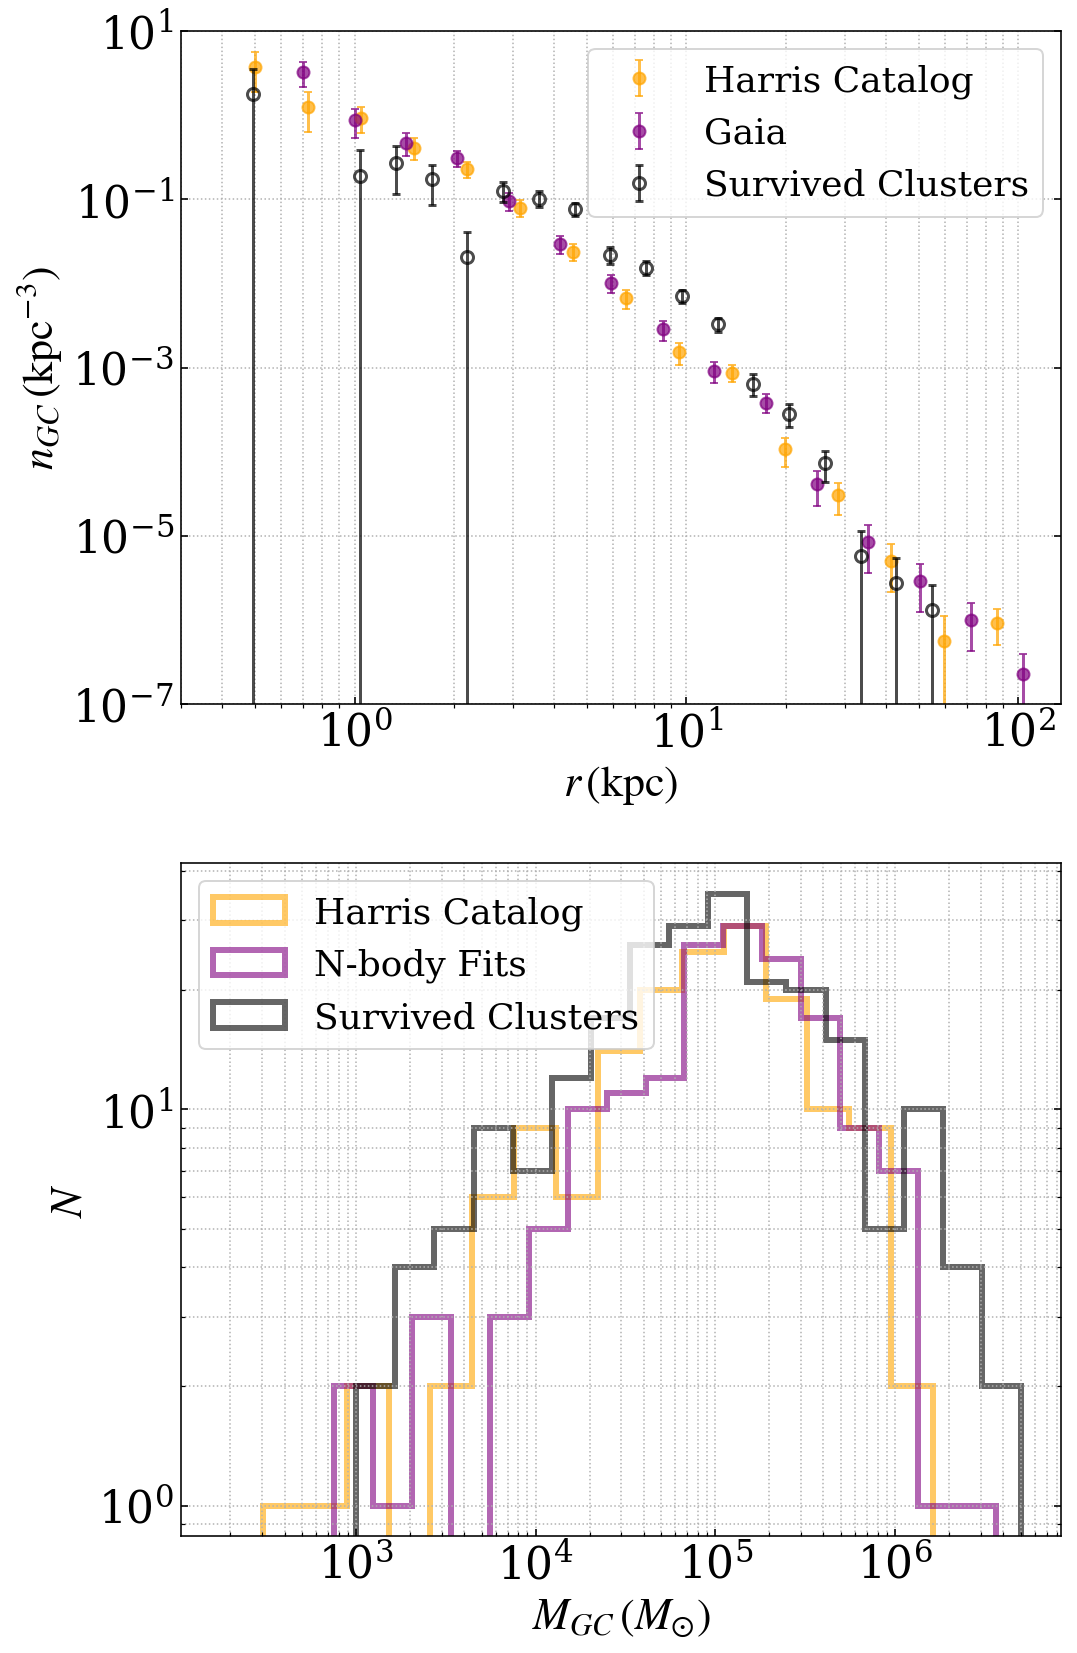

In [3]:
##Observed cluster position
###################Harris Catalog##########################
data_harris = pd.read_excel('/projects/b1095/syr904/projects/harris_catalog/harris_part1.xlsx',
                           names = ['ID', 'L', 'B', 'Rsun', 'Rgc', 'X', 'Y', 'Z'])
R_gc_harris = list(data_harris['Rgc'])
print(min(R_gc_harris), max(R_gc_harris))

logbin_harris = np.logspace(np.log10(min(R_gc_harris)), np.log10(max(R_gc_harris)), 16)
ngc_hist_harris, rgc_hist_harris = np.histogram(R_gc_harris, bins=logbin_harris)
#print(ngc_hist, rgc_hist)

density_harris = []; rkpc_harris = []; density_err_harris = []
for xx in range(len(ngc_hist_harris)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol = (2.*twopi/3.)*(rgc_hist_harris[xx+1]**3-rgc_hist_harris[xx]**3)
    density_harris.append(ngc_hist_harris[xx]/vol)
    density_err_harris.append(math.sqrt(ngc_hist_harris[xx])/vol)
    rkpc_harris.append(rgc_hist_harris[xx])
print(density_err_harris)


##############Gaia DR3##################
data_gaia = pd.read_excel('/projects/b1095/syr904/projects/GCE/Baumgardt_Hilker_2018.xlsx',
                           names = ['Cluster','RA','DEC','R_Sun','DR_sun','R_GC','DR_gc','N_RV','N_PM',
                                    'Mass','DM','V','DV','M/L_V','DM/L','rc','rh,l','rh,m','rt',
                                    'rho_c','rho_h,m','sig_c','sig_h,m','lgTrh','MF','F_REM',
                                    'sig0','vesc','etac','etah','A_Rot','DA_Rot','P_Rot'],
                         skiprows =1)
R_gc_gaia = list(data_gaia['R_GC'])
dR_gc_gaia = list(data_gaia['DR_gc'])
print(min(R_gc_gaia), max(R_gc_gaia))
print(np.mean(np.array(dR_gc_gaia)/np.array(R_gc_gaia)))

logbin_gaia = np.logspace(np.log10(min(R_gc_gaia)), np.log10(max(R_gc_gaia)), 16)
ngc_hist_gaia, rgc_hist_gaia = np.histogram(R_gc_gaia, bins=logbin_gaia)
#print(ngc_hist, rgc_hist)

density_gaia = []; rkpc_gaia = []; density_err_gaia = []
for xx in range(len(ngc_hist_gaia)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol = (2.*twopi/3.)*(rgc_hist_gaia[xx+1]**3-rgc_hist_gaia[xx]**3)
    density_gaia.append(ngc_hist_gaia[xx]/vol)
    density_err_gaia.append(math.sqrt(ngc_hist_gaia[xx])/vol)
    rkpc_gaia.append(rgc_hist_gaia[xx])
print(density_err_gaia)

    
##Disrputed cluster sample
#sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_disrupt_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive_small.dat', 
#                             dtype = str)
#nstar_disrp = sample_disrp[:,0]; rv_disrp = sample_disrp[:,1]
#rg_model_disrp = sample_disrp[:,2]; z_disrp = sample_disrp[:,3]
#rg_init = sample_disrp[:,5].astype(np.float)
#rg_disrp = sample_disrp[:,6].astype(np.float)
#type_disrp = sample_disrp[:,9].astype(np.int)
#
#sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_property_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive_small.dat', dtype = str)
#m_disrp = sample_prop[:,6].astype(np.float)
#
#print(len(rg_disrp))
#rg_disrp = rg_disrp[type_disrp==4]
#m_disrp = m_disrp[type_disrp==4]
#print(len(rg_disrp))
#rg_disrp = rg_disrp[m_disrp>1.5e5]
#print(len(rg_disrp))


######For analytical models######
sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/samples/semi_analytic_model_fcl0.012_ffa0.012_xcut110_xmin0.1_xmax100_mmin10000_mmax10000000_min_rhoh1000_mcut100_nmspfit.txt', 
                             dtype = str)
rg_init = sample_disrp[:,1].astype(np.float)
rg_disrp = sample_disrp[:,4].astype(np.float)
type_disrp = sample_disrp[:,8].astype(np.int)
m_disrp = sample_disrp[:,7].astype(np.float)
print(len(type_disrp[type_disrp==4]))

print(len(rg_disrp))
rg_disrp = rg_disrp[type_disrp==0]
m_disrp = m_disrp[type_disrp==0]
print(len(rg_disrp))
rg_disrp = rg_disrp[~np.isnan(rg_disrp)]
print('rgdisrp', len(rg_disrp))
#rg_disrp = rg_disrp[m_disrp>1e5]
#print(len(rg_disrp))

############

logbin_disrp = np.logspace(np.log10(min(rg_disrp)), np.log10(max(rg_disrp)), 21)
ngc_disrp, rgc_disrp= np.histogram(rg_disrp, bins = logbin_disrp)
#print(ngc_disrp)

density_disrp = []; rkpc_disrp = []; density_disrp_err = []
for xx in range(len(ngc_disrp)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol_disrp = (2.*twopi/3.)*(rgc_disrp[xx+1]**3-rgc_disrp[xx]**3)
    density_disrp.append(ngc_disrp[xx]/vol_disrp)
    density_disrp_err.append(math.sqrt(ngc_disrp[xx])/vol_disrp)
    rkpc_disrp.append(rgc_disrp[xx])
print(density_disrp_err)


###############################################3
##Milky Way globular clusters mass function
Mv_sun = 4.83
M_L = 1.5

###################Harris Catalog##########################
data_harris = pd.read_excel('/projects/b1095/syr904/projects/harris_catalog/harris_catalog.xlsx',
                            names = ['ID', 'Fe/H', 'wt', 'E_B-V', 'V_HB', 'm-M_V', 'V_t', 'M_V', 'U-B', 'B-V','V-R', 'V-I', 'spt', 'ellip'], 
                            sheetname='part2')
all_Mv = data_harris['M_V']
all_Lv = pow(10, 0.4*(Mv_sun-all_Mv))
all_Mass = np.array(all_Lv*M_L)
obs_allmass = all_Mass[~np.isnan(all_Mass)]
print(len(obs_allmass))


##############Gaia DR3##################
data_nbody = pd.read_excel('/projects/b1095/syr904/projects/GCE/Baumgardt_Hilker_2018.xlsx',
                           names = ['Cluster','RA','DEC','R_Sun','DR_sun','R_GC','DR_gc','N_RV','N_PM',
                                    'Mass','DM','V','DV','M/L_V','DM/L','rc','rh,l','rh,m','rt',
                                    'rho_c','rho_h,m','sig_c','sig_h,m','lgTrh','MF','F_REM',
                                    'sig0','vesc','etac','etah','A_Rot','DA_Rot','P_Rot'],
                         skiprows =1)
Mgc_nbody = list(data_nbody['Mass'])
dM_gc_nbody = list(data_nbody['DM'])
rhm_nbody = list(data_nbody['rh,m'])
rhohm_nbody = np.array(data_nbody['rho_h,m'])


######For analytical models######
sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/samples/semi_analytic_model_fcl0.012_ffa0.012_xcut110_xmin0.1_xmax100_mmin10000_mmax10000000_min_rhoh1000_mcut100_nmspfit.txt', 
                             dtype = str)
type_disrp = sample_disrp[:,8].astype(np.int)
m_disrp = sample_disrp[:,7].astype(np.float)
print(len(m_disrp))
#print(m_disrp)

m_disrp = m_disrp[type_disrp==0]
print(len(m_disrp))
model_allmass= m_disrp[m_disrp>500]
model_allmass = model_allmass[~np.isnan(model_allmass)]
print('model_allmass', len(model_allmass))

model_allrh = []
model_allrhoh = []
for ii in range(len(model_allmass)):
    if model_allmass[ii] <= 1e5:
        rho_model = 1000.  ##Msun/pc^3
    elif 1e5 < model_allmass[ii] < 1e6:
        rho_model = 1000.*(model_allmass[ii]/1e5)**2
    else:
        rho_model = 1000.*100.
    rh_model = pow(0.5*model_allmass[ii]/(4*np.pi/3)/rho_model, 1./3.)
    model_allrhoh.append(rho_model)
    model_allrh.append(rh_model)
model_allrh = np.array(model_allrh)
################################
    
####Plotting
matplotlib.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(nrows=2, figsize = (8, 12))
#axs.scatter(rkpc_harris, density_harris, color = 'orange', label = 'Harris Catalog', alpha=0.7)
#axs.scatter(rkpc_gaia, density_gaia, color = 'purple', label = 'Gaia', alpha=0.7)
#axs.scatter(rkpc_disrp, density_disrp, color = 'k', 
#            lw=2, facecolor ='none', label = 'Survived clusters', alpha=0.7, zorder=3)
axs[0].errorbar(rkpc_harris, density_harris, yerr = density_err_harris, fmt='o',
             capsize =2, color = 'orange', label = 'Harris Catalog', alpha=0.7)
axs[0].errorbar(rkpc_gaia, density_gaia, yerr = density_err_gaia, fmt='o',
             capsize =2, color = 'purple', label = 'Gaia', alpha=0.7)
axs[0].errorbar(rkpc_disrp, density_disrp, yerr = density_disrp_err,
             color = 'k', mew=1.5, markerfacecolor ='none', label = 'Survived Clusters', 
             fmt='o', capsize =2, alpha=0.7, zorder=3)
axs[0].set_yscale('log')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylim(ymin = 0.0000001, ymax = 1e1)
axs[0].set_xlim(xmin = 0.3)
axs[0].set_ylabel(r'$n_{GC}\,(\rm{kpc^{-3}})$')
axs[0].set_xlabel(r'$r\,(\rm{kpc})$')
axs[0].legend(loc='best', fontsize=18)
axs[0].grid(linestyle=':',which='major',linewidth='0.75')
axs[0].grid(linestyle=':',which='minor',linewidth='0.75')
axs[0].tick_params(top=False, right=True, direction = 'in')
plt.locator_params(axis='y', numticks=10)
#plt.savefig(figsave+'ngc_rkpc.pdf', dpi=300)

axs[1].hist(obs_allmass, bins = np.logspace(np.log10(min(obs_allmass)), np.log10(max(obs_allmass)), 18), 
         histtype = 'step', lw = 3, color='orange', alpha=0.6,
         label = 'Harris Catalog')
axs[1].hist(Mgc_nbody, bins = np.logspace(np.log10(min(Mgc_nbody)), np.log10(max(Mgc_nbody)), 18), 
         histtype = 'step', lw = 3, color='purple', alpha=0.6,
         label = 'N-body Fits')
axs[1].hist(model_allmass, 
         bins = np.logspace(np.log10(min(model_allmass)), 
                            np.log10(max(model_allmass)), 18), 
         histtype = 'step', lw = 3, color = 'k', alpha=0.6,
         label = 'Survived Clusters')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$M_{GC}\,(M_{\odot})$')
axs[1].set_ylabel(r'$N$')
axs[1].legend(loc = 'upper left', fontsize=18)
axs[1].grid(linestyle=':',which='major',linewidth='0.75')
axs[1].grid(linestyle=':',which='minor',linewidth='0.75')
axs[1].tick_params(top=False, right=True, direction = 'in', which='both')

#axs[2].hist(rhm_nbody, bins = np.logspace(np.log10(min(rhm_nbody)), np.log10(max(rhm_nbody)), 18), 
#         histtype = 'step', lw = 3, color='purple', alpha=0.6,
#         label = 'N-body Fits')
#axs[2].hist(model_allrh, 
#         bins = np.logspace(np.log10(min(model_allrh)), np.log10(max(model_allrh)), 8), 
#         histtype = 'step', lw = 3, color = 'k', alpha=0.6,
#         label = 'Survived Clusters')
##axs[2].hist(10**rhohm_nbody, bins = np.logspace(np.log10(min(10**rhohm_nbody)), np.log10(max(10**rhohm_nbody)), 18), 
##         histtype = 'step', lw = 3, color='purple', alpha=0.6,
##         label = 'N-body Fits')
##axs[2].hist(model_allrhoh, 
##         bins = np.logspace(np.log10(min(model_allrhoh)), np.log10(max(model_allrhoh)), 18), 
##         histtype = 'step', lw = 3, color = 'k', alpha=0.6,
##         label = 'Survived Clusters')
#axs[2].set_xlabel(r'$r_h\,(\rm{pc})$')
#axs[2].set_ylabel(r'$N$')
#axs[2].set_xscale('log')
#axs[2].set_yscale('log')
#axs[2].legend(loc = 'upper right', fontsize=18)
#axs[2].grid(linestyle=':',which='major',linewidth='0.75')
#axs[2].grid(linestyle=':',which='minor',linewidth='0.75')
#axs[2].tick_params(top=False, right=True, direction = 'in', which='both')
fig.tight_layout()
#plt.savefig(figsave+'ngc_mgc_distribution.pdf', dpi=300)

6.371558844650148
7.065112222193732
5.4946464704896395e-05
[  0.           8.144887     8.144887    14.686605    29.467036
  32.225888    32.948594    32.948594    32.948594    33.002474
  38.81265147  44.08439627  63.60818818 134.72789901 296.79785434]
[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   1.01758147   3.24190527  17.59876118  71.90438501 208.31624934]


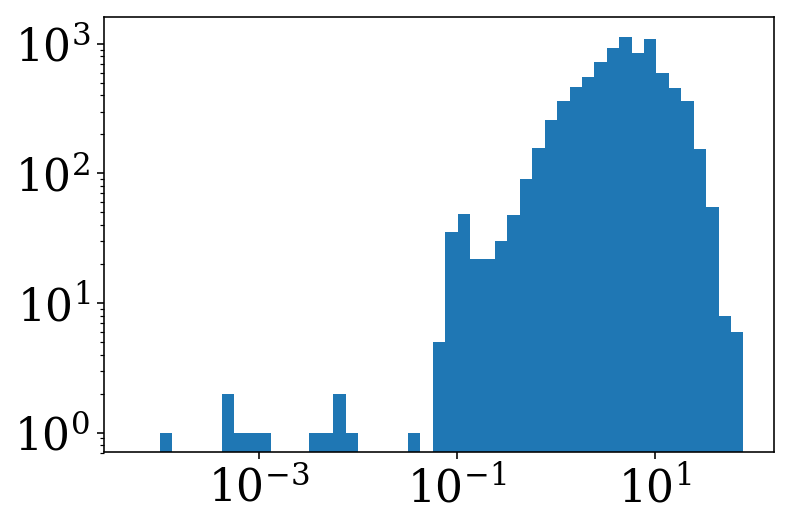

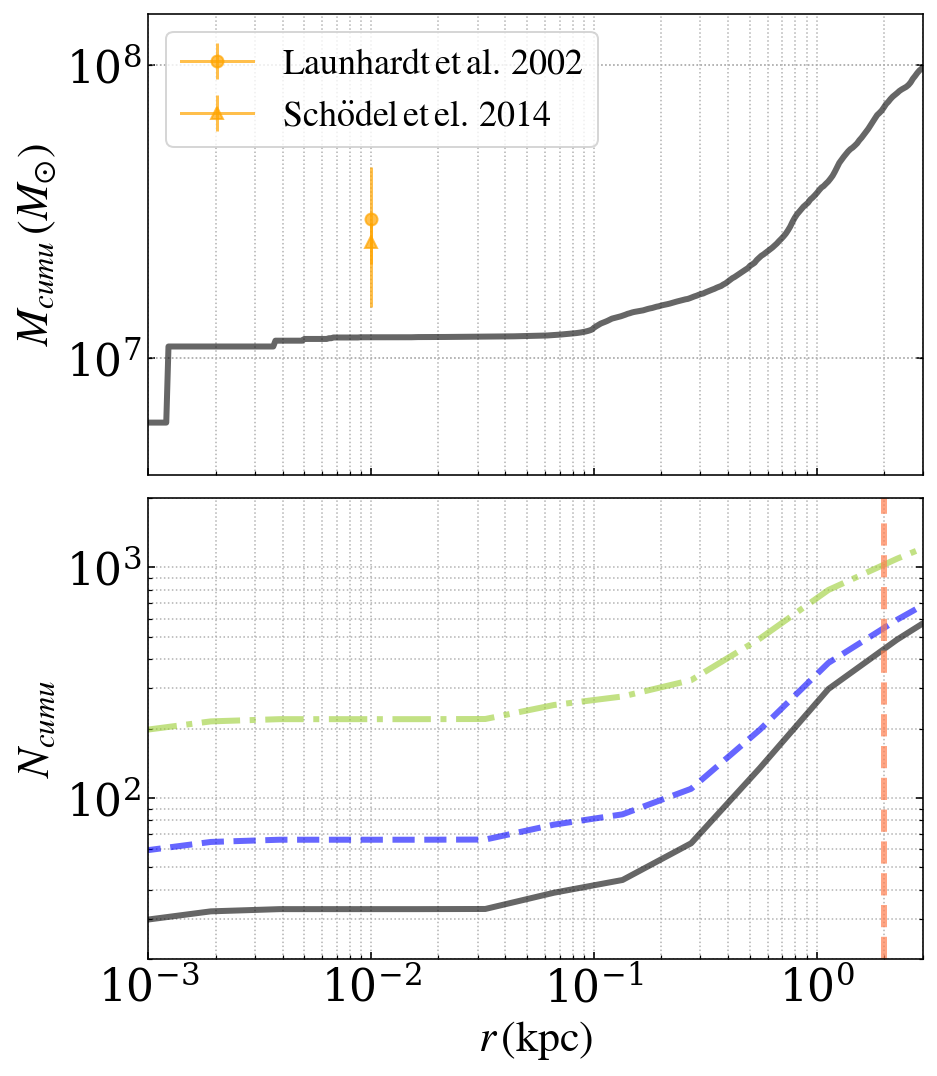

In [4]:
##Cumulative mass, nmsp, Lmsp of disrupted clusters as a function of the galactocentric radius
#sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_property_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive_fastdf.dat', dtype = str)
#Nmsp = sample_prop[:,5].astype(np.float)
#Mgc = sample_prop[:,6].astype(np.float)
#Lmsp = sample_prop[:,7].astype(np.float)
#Lmsp[Lmsp < 0] = 0
##print(sum(Nmsp), sum(Mgc))
##print(Mgc)

#sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_disrupt_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive_fastdf.dat', dtype = str)
#rg_disrp = sample_disrp[:,6].astype(np.float)
#status_disrp = sample_disrp[:,9].astype(np.int)

######For analytical models######
sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/samples/semi_analytic_model_fcl0.012_ffa0.012_xcut110_xmin0.1_xmax100_mmin10000_mmax10000000_min_rhoh1000_mcut100_nmspfit.txt', 
                            dtype = str)
Nmsp = sample_prop[:,10].astype(np.float)
Mgc = sample_prop[:,7].astype(np.float)
Lmsp = sample_prop[:,9].astype(np.float)
Lmsp[Lmsp < 0] = 0.
Nmsp[Nmsp < 0] = 0.
rg_disrp = sample_prop[:,4].astype(np.float)
status_disrp = sample_prop[:,8].astype(np.int)
rg_disrp[rg_disrp < 0] = np.random.uniform(low=0., high=0.001, size=len(rg_disrp[rg_disrp < 0]))

disrupt_mass=np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/samples/disrupt_mass_fcl0.012_ffa0.012_xcut110_xmin0.1_xmax100_mmin10000_mmax10000000_min_rhoh1000_mcut100_nmspfit.txt')
r_disrm = disrupt_mass[:,0]; mcumu_disr = disrupt_mass[:,1]
#print(r_disrm)

sample_initial = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/samples/cluster_analytical_initial_M_RG_fcl0.012_ffa0.012_xcut110_xmin0.1_xmax100_mmin10000_mmax10000000_min_rhoh1000_nmspfit.dat')
rg_initial = sample_initial[:,1]; M_initial = sample_initial[:,0]
N_initial = M_initial/0.6
Nmsp_ej = np.log2(N_initial/2e5)
Nmsp_ej[Nmsp_ej < 0]=0
print(np.max(Nmsp_ej))
############
print(np.mean(rg_disrp))

rg_disrp = rg_disrp[status_disrp!=0]
Nmsp = Nmsp[status_disrp!=0]; Mgc = Mgc[status_disrp!=0]; Lmsp = Lmsp[status_disrp!=0]

plt.figure()
plt.hist(rg_disrp,
        bins = np.logspace(np.log10(min(rg_disrp)), np.log10(max(rg_disrp)), 50))
plt.xscale('log')
plt.yscale('log')
print(np.min(rg_disrp))

binnum = 20
logbin_disrp = np.logspace(np.log10(min(rg_disrp)), np.log10(max(rg_disrp)), binnum+1)
ngc_disrp, rgc_disrp= np.histogram(rg_disrp, bins = logbin_disrp)

mgc_disrp = np.zeros(binnum); mgc_disrp_old = np.zeros(binnum)
nmsp_disrp = np.zeros(binnum); nmsp_disrp_old = np.zeros(binnum)
lmsp_disrp = np.zeros(binnum); lmsp_disrp_old = np.zeros(binnum)
nmsp_disrp_upper = np.zeros(binnum); nmsp_eject = np.zeros(binnum)
nmsp_disrp_extremeupper = np.zeros(binnum)
for jj in range(len(rgc_disrp)-1):
    for xx in range(len(rg_disrp)):
        if rgc_disrp[jj]<=rg_disrp[xx]<rgc_disrp[jj+1]:
            nmsp_disrp[jj]+=Nmsp[xx]; mgc_disrp[jj]+=Mgc[xx]; lmsp_disrp[jj]+=Lmsp[xx]
            nmsp_disrp_upper[jj]+=2*Nmsp[xx]
            nmsp_disrp_extremeupper[jj]+=2*Nmsp[xx]/0.3
            #nmsp_disrp_old[jj]+=prop_right[0][xx]; mgc_disrp_old[jj]+=prop_right[1][xx]; lmsp_disrp_old[jj]+=prop_right[2][xx]
    
    for yy in range(len(rg_initial)):
        if rgc_disrp[jj]<=rg_initial[yy]<rgc_disrp[jj+1]:
            nmsp_disrp[jj]+=Nmsp_ej[yy]
            nmsp_eject[jj]+=Nmsp_ej[yy]
            

cumul_nmsp = np.cumsum(nmsp_disrp)
cumul_mgc = np.cumsum(mgc_disrp)
cumul_lmsp = np.cumsum(lmsp_disrp)
cumul_nmsp_up = np.cumsum(np.array(nmsp_disrp_upper)+np.array(nmsp_eject))
cumul_nmsp_extremeup = np.cumsum(np.array(nmsp_disrp_extremeupper)+np.array(nmsp_eject))
print(cumul_nmsp[rgc_disrp[:-1]<=2])
print(np.cumsum(nmsp_eject)[rgc_disrp[:-1]<=2])

#cumul_right[yy] = np.cumsum(prop_right[yy])

from matplotlib.ticker import AutoMinorLocator
matplotlib.rcParams.update({'font.size': 22})
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex=True, figsize=(7,8))
ax1.plot(r_disrm, mcumu_disr, color='k', lw=3, alpha=0.6)
ax1.errorbar(0.01, 3.e7, yerr = 1.5e7, color='orange', marker='o',
             alpha=0.7,
            label = r'$\rm{Launhardt\,et\,al.\,2002}$')
#ax1.errorbar(0.01, 1.3e7, yerr = 0.3e7, color='orange', marker='x',
#             alpha=0.7,
#            label = r'$\rm{Fritz\,et\,al.\,2013}$')
ax1.errorbar(0.01, 2.5e7, yerr = 0.4e7, color='orange', marker='^',
             alpha=0.7,
            label = r'$\rm{Sch\ddot{o}del\,et\,el.\,2014}$')
ax1.set_xscale('log')
ax1.set_yscale('symlog')
ax1.set_xlim(xmin = 0.001, xmax = 3.)
ax1.set_ylim(ymin = 4e6, ymax = 1.5e8)
ax1.set_ylabel(r'$M_{cumu}\,(M_{\odot})$')
ax1.legend(loc = 'best', fontsize=18)
ax1.grid(linestyle=':',which='major',linewidth='0.75')
ax1.grid(linestyle=':',which='minor',linewidth='0.75')
ax1.tick_params(top=False, right=True, direction = 'in', which='both')
#ax1.tick_params(axis='y', which='minor', bottom=False)

#ax2_right = ax2.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(rgc_disrp[:-1], cumul_nmsp, color='k', lw=3, alpha=0.6)
ax2.plot(rgc_disrp[:-1], cumul_nmsp_up, color='b', ls='--', lw=3, alpha=0.6)
ax2.plot(rgc_disrp[:-1], cumul_nmsp_extremeup, color='yellowgreen', ls='-.', lw=3, alpha=0.6)
ax2.axvline(x=2, color='coral', ls='--', lw=3, alpha=0.7)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(xmin=1e-3,xmax = 3.)
ax2.set_ylim(ymin = 20., ymax=2e3)
ax2.set_xlabel(r'$r\,(\rm{kpc})$')
ax2.set_ylabel(r'$N_{cumu}$')
ax2.tick_params(top=False, right=True, direction = 'in', which='both')
ax2.grid(linestyle=':',which='major',linewidth='0.75')
ax2.grid(linestyle=':',which='minor',linewidth='0.75')
#plt.gca().xaxis.set_ticks_position('both')
#plt.gca().yaxis.set_ticks_position('both')
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)
#plt.savefig(figsave+'cumu_mgc_msp_distribution.pdf', dpi=300)

/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:70: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:87: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


3.071042910033369e+34
1.6216518128129797e+35
79.230085 9.911114523238773e-05
79.23009 0.100031


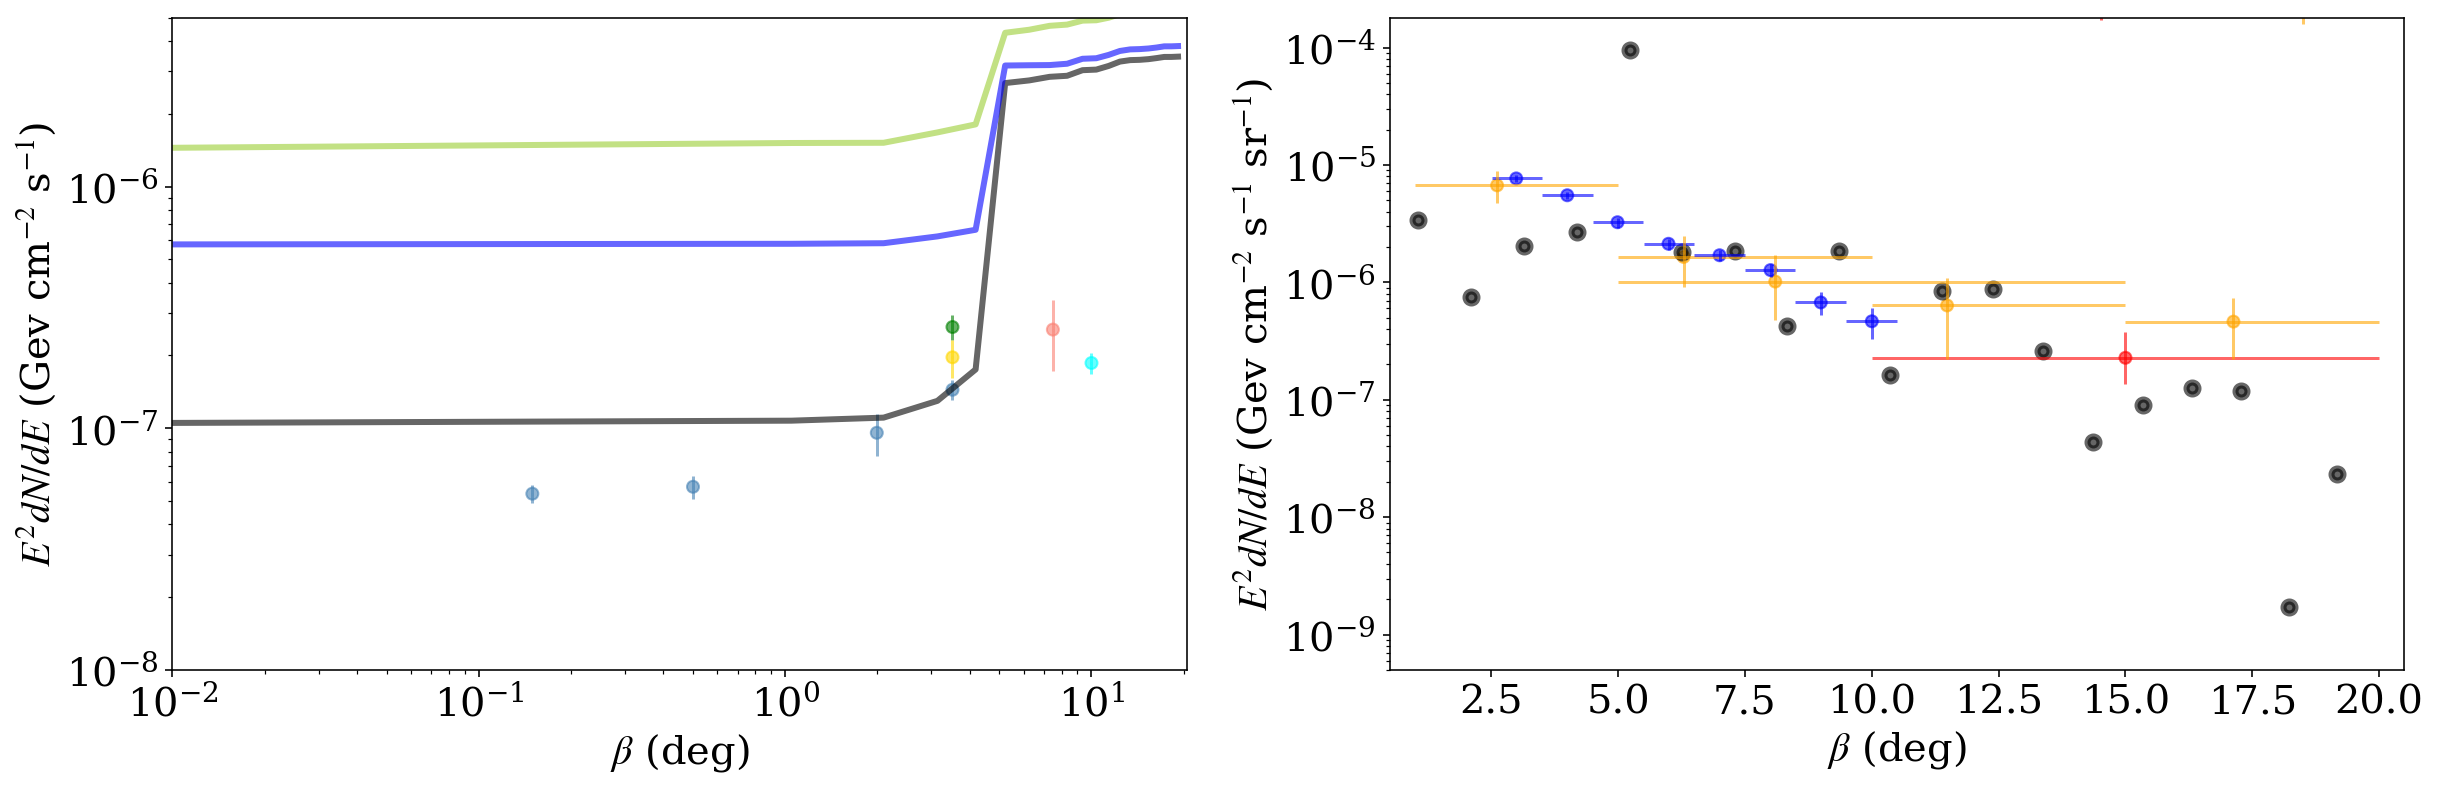

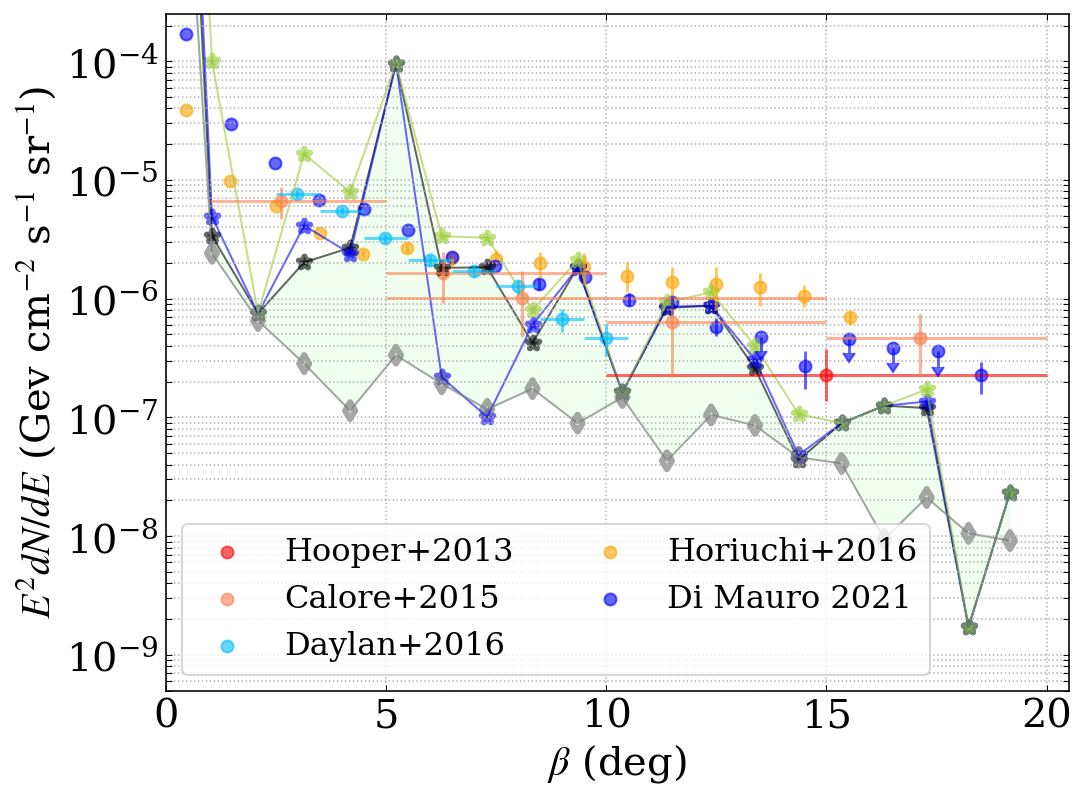

In [14]:
##Plotting Gamma-ray flux distribution
d_gc = 8.2
erg_gev = 624.151

##Read Observations
obser_data = pd.read_excel('/projects/b1095/syr904/projects/GCE/catalog/obser_data_dNdE.xlsx',
                         names = ['deg', 'dnde_up', 'dnde_down', 'ref'])
obser_sr_data = pd.read_excel('/projects/b1095/syr904/projects/GCE/catalog/obser_data_dNdEsr.xlsx',
                         names = ['deg', 'dnde_sr', 'deg_left', 'deg_right', 'dndesr_up', 'dndesr_down', 'ref', 'Note'])
deg = obser_data['deg']; dnde = (obser_data['dnde_up']+obser_data['dnde_down'])/2.
dnde_err_up = obser_data['dnde_up'] - dnde
dnde_err_down = dnde - obser_data['dnde_down']

deg_sr = obser_sr_data['deg']; dnde_sr = obser_sr_data['dnde_sr']
dnde_sr_err_up = obser_sr_data['dndesr_up'] - dnde_sr
dnde_sr_err_down = dnde_sr - obser_sr_data['dndesr_down']
deg_err_left = deg_sr - obser_sr_data['deg_left']
deg_err_right = obser_sr_data['deg_right'] - deg_sr
dnde_sr_ref = np.array(obser_sr_data['ref'])



######################################################
##Read model data
#sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_property_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive.dat', dtype = str)
#Lmsp = sample_prop[:,7].astype(np.float)
#Lmsp[Lmsp < 0] = 0

#sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_disrupt_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive.dat', dtype = str)
#rg_disrp = sample_disrp[:,6].astype(np.float)
#status_disrp = sample_disrp[:,9].astype(np.int)

######################################################
df_lmsp = pd.read_csv('/projects/b1095/syr904/projects/GCE/catalog/lgamma_allmsp_alltime_rg2.txt',
                     header=None)
#print(np.array(df_lmsp.iloc[0][0].split()).astype(float))
lmsp_t0 = np.array(df_lmsp.iloc[0][0].split()).astype(float)[1:]
lmsp_tf = np.array(df_lmsp.iloc[-1][0].split()).astype(float)[1:]

######For analytical models######
sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/samples/semi_analytic_model_fcl0.012_ffa0.012_xcut110_xmin0.1_xmax100_mmin10000_mmax10000000_min_rhoh1000_mcut100_nmspfit.txt', 
                            dtype = str)
Nmsp = sample_prop[:,10].astype(np.float)
Nmsp[Nmsp < 0.5] = 0.
Lgamma = sample_prop[:,9].astype(np.float)
Lgamma[Nmsp==0] = 0.
rg_disrp = sample_prop[:,4].astype(np.float)
t_disrp = sample_prop[:,5].astype(np.float)
t_disrp_myr = t_disrp*1000.
status_disrp = sample_prop[:,8].astype(np.int)
rg_disrp[rg_disrp < 0] = np.random.uniform(low=0., high=0.001, size=len(rg_disrp[rg_disrp < 0]))
Lmsp = []; Lmsp2 = []; Lmsp70 = []
for xx in range(len(Nmsp)):
    if Nmsp[xx]==0:
        Lmsp.append(0)
        Lmsp2.append(0)
        Lmsp70.append(0)
    else:
        n_loc = int(t_disrp_myr[xx]/100)
        lmsp_t = np.array(df_lmsp.iloc[n_loc][0].split()).astype(float)[1:]
        #lmsp_t = lmsp_tf
        Lmsp.append(np.sum(np.random.choice(lmsp_t, int(round(Nmsp[xx])))))
        Lmsp2.append(np.sum(np.random.choice(lmsp_t, int(round(2*Nmsp[xx])))))
        Lmsp70.append(np.sum(np.random.choice(lmsp_t, int(round(2*Nmsp[xx]/0.3)))))

Lmsp = np.array(Lmsp)
Lmsp2 = np.array(Lmsp2)
Lmsp70 = np.array(Lmsp70)
#print(Lmsp[Nmsp!=0]/Nmsp[[Nmsp!=0]])
print(np.sum(Lmsp[Nmsp!=0])/np.sum(Nmsp[[Nmsp!=0]]))

sample_initial = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/samples/cluster_analytical_initial_M_RG_fcl0.012_ffa0.012_xcut110_xmin0.1_xmax100_mmin10000_mmax10000000_min_rhoh1000_nmspfit.dat')
rg_initial = sample_initial[:,1]; M_initial = sample_initial[:,0]
N_initial = M_initial/0.6
Nmsp_ej = np.log2(N_initial/2e5)
Nmsp_ej[Nmsp_ej < 0.5]=0
Lgamma_ej = Nmsp_ej*4.8e33

Lmsp_ej = []
for xx in range(len(Nmsp_ej)):
    if Nmsp_ej[xx]==0:
        Lmsp_ej.append(0)
    else:
        Lmsp_ej.append(np.sum(np.random.choice(lmsp_t0, int(round(Nmsp_ej[xx])))))
Lmsp_ej = np.array(Lmsp_ej)
#print(Lmsp_ej[Nmsp_ej!=0]/Nmsp_ej[[Nmsp_ej!=0]])
print(np.mean(Lmsp_ej[Nmsp_ej!=0]/Nmsp_ej[[Nmsp_ej!=0]]))
############

Lmsp = Lmsp[status_disrp!=0]
Lmsp2 = Lmsp2[status_disrp!=0]
Lmsp70 = Lmsp70[status_disrp!=0]
rg_disrp = rg_disrp[status_disrp!=0]
Lgamma = Lgamma[status_disrp!=0]

print(max(rg_disrp), min(rg_disrp))
print(max(rg_initial), min(rg_initial))
logbin_disrp = np.linspace(min(rg_disrp), 3, 21)
ngc_disrp, rgc_disrp= np.histogram(rg_disrp, bins = logbin_disrp)

lmsp_disrp = np.zeros(20); lmsp_disrp_old = np.zeros(20)
lgamma_disrp = np.zeros(20)
lmsp2_disrp = np.zeros(20)
lmsp70_disrp = np.zeros(20)
for jj in range(len(rgc_disrp)-1):
    for xx in range(len(rg_disrp)):
        if rgc_disrp[jj]<=rg_disrp[xx]<rgc_disrp[jj+1]:
            lmsp_disrp[jj]+=Lmsp[xx]
            lmsp2_disrp[jj]+=Lmsp2[xx]
            lmsp70_disrp[jj]+=Lmsp70[xx]
            lgamma_disrp[jj]+=Nmsp[xx]*4.8e33
    for yy in range(len(rg_initial)):
        if rgc_disrp[jj]<=rg_initial[yy]<rgc_disrp[jj+1]:
            lmsp_disrp[jj]+=Lmsp_ej[yy]
            lmsp2_disrp[jj]+=Lmsp_ej[yy]
            lmsp70_disrp[jj]+=Lmsp_ej[yy]
            lgamma_disrp[jj]+=Nmsp_ej[yy]*4.8e33
            

cumul_lmsp = np.cumsum(lmsp_disrp)
cumul_lmsp2 = np.cumsum(lmsp2_disrp)
cumul_lmsp70 = np.cumsum(lmsp70_disrp)
            
##Convert into Gev/cm^2/s and Gev/cm^2/s/sr
deg_model = np.arctan(rgc_disrp[:-1]/d_gc)*180/np.pi
cumu_lgev = cumul_lmsp*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)
cumu_lgev2 = cumul_lmsp2*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)
cumu_lgev70 = cumul_lmsp70*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)

#cumu_lgev_sr = cumul_lmsp*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)/(2*twopi*np.arctan(rgc_disrp[:-1]/d_gc)**2) #this is probably wrong

lgev_sr = lmsp_disrp*erg_gev/(2.*twopi*((d_gc**2+rgc_disrp[:-1]**2)**0.5*1000.*PC)**2)/(2.*twopi*np.sin(np.arctan(rgc_disrp[:-1]/d_gc)/2.)**2)
lgev_sr2 = lmsp2_disrp*erg_gev/(2.*twopi*((d_gc**2+rgc_disrp[:-1]**2)**0.5*1000.*PC)**2)/(2.*twopi*np.sin(np.arctan(rgc_disrp[:-1]/d_gc)/2.)**2)
lgev_sr70 = lmsp70_disrp*erg_gev/(2.*twopi*((d_gc**2+rgc_disrp[:-1]**2)**0.5*1000.*PC)**2)/(2.*twopi*np.sin(np.arctan(rgc_disrp[:-1]/d_gc)/2.)**2)


lgamma_sr = lgamma_disrp*erg_gev/(2.*twopi*((d_gc**2+rgc_disrp[:-1]**2)**0.5*1000.*PC)**2)/(2.*twopi*np.sin(np.arctan(rgc_disrp[:-1]/d_gc)/2.)**2)

#print(cumu_lgev)


######################################################
cs_dnde = ['steelblue', 'steelblue', 'steelblue', 'steelblue', 'g', 'gold', 'salmon', 'cyan']
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(ncols = 2, figsize = (20, 6))
axs[0].set_xlabel(r'$\beta$ (deg)')
axs[0].set_ylabel(r'$E^2 dN/dE$ (Gev cm$^{-2}$ s$^{-1}$)')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlim(0.01,20.5)
axs[0].set_ylim(1e-8,5.*10**(-6))
axs[0].errorbar(deg, dnde, yerr = [dnde_err_down, dnde_err_up], fmt = 'o', markersize = 0.01,
                ecolor = cs_dnde, alpha=0.6)
axs[0].scatter(deg, dnde, color = cs_dnde, alpha=0.6)

axs[0].plot(deg_model, cumu_lgev, color = 'k', lw = 3, alpha=0.6)
axs[0].plot(deg_model, cumu_lgev2, color = 'b', lw = 3, alpha=0.6)
axs[0].plot(deg_model, cumu_lgev70, color = 'yellowgreen', lw = 3, alpha=0.6)



cs_dndesr = ['r', 'orange', 'orange', 'orange', 'orange', 'orange', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
axs[1].set_xlabel(r'$\beta$ (deg)')
axs[1].set_ylabel(r'$E^2 dN/dE$ (Gev cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
axs[1].set_yscale('log')
#axs[1].set_xscale('log')
axs[1].set_xlim(0.5,20.5)
axs[1].set_ylim(5*1e-10,1.8*10**(-4))
axs[1].errorbar(deg_sr, dnde_sr, xerr = [deg_err_left, deg_err_right], yerr = [dnde_sr_err_down, dnde_sr_err_up], 
                fmt = 'o', markersize = 0.01,
                ecolor = cs_dndesr, alpha=0.6)
axs[1].scatter(deg_sr, dnde_sr, color = cs_dndesr, alpha=0.6)
axs[1].scatter(deg_model, lgev_sr, color = 'k', lw = 3, alpha=0.6)
######################################################



label_ref = ['Hooper+2013', 'Calore+2015', 'Daylan+2016', 'Horiuchi+2016', 'Di Mauro 2021']
cs_ref = ['red', 'coral', 'deepskyblue', 'orange', 'blue']
matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (8, 6))

ax.errorbar(deg_sr[dnde_sr_ref=='Hooper+2013'], dnde_sr[dnde_sr_ref=='Hooper+2013'], 
            xerr = [deg_err_left[dnde_sr_ref=='Hooper+2013'], deg_err_right[dnde_sr_ref=='Hooper+2013']], 
            yerr = [dnde_sr_err_down[dnde_sr_ref=='Hooper+2013'], dnde_sr_err_up[dnde_sr_ref=='Hooper+2013']], 
                fmt = 'o', markersize = 0.01,
                ecolor = cs_ref[0], alpha=0.6, label=None)
ax.scatter(deg_sr[dnde_sr_ref=='Hooper+2013'], dnde_sr[dnde_sr_ref=='Hooper+2013'], 
           color = cs_ref[0], 
           alpha=0.6, label = label_ref[0])
ax.errorbar(deg_sr[dnde_sr_ref=='Calore+2015'], dnde_sr[dnde_sr_ref=='Calore+2015'], 
            xerr = [deg_err_left[dnde_sr_ref=='Calore+2015'], deg_err_right[dnde_sr_ref=='Calore+2015']], 
            yerr = [dnde_sr_err_down[dnde_sr_ref=='Calore+2015'], dnde_sr_err_up[dnde_sr_ref=='Calore+2015']], 
                fmt = 'o', markersize = 0.01,
                ecolor = cs_ref[1], alpha=0.6, label=None)
ax.scatter(deg_sr[dnde_sr_ref=='Calore+2015'], dnde_sr[dnde_sr_ref=='Calore+2015'], 
           color = cs_ref[1], 
           alpha=0.6, label = label_ref[1])
ax.errorbar(deg_sr[dnde_sr_ref=='Daylan+2016'], dnde_sr[dnde_sr_ref=='Daylan+2016'], 
            xerr = [deg_err_left[dnde_sr_ref=='Daylan+2016'], deg_err_right[dnde_sr_ref=='Daylan+2016']], 
            yerr = [dnde_sr_err_down[dnde_sr_ref=='Daylan+2016'], dnde_sr_err_up[dnde_sr_ref=='Daylan+2016']], 
                fmt = 'o', markersize = 0.01,
                ecolor = cs_ref[2], alpha=0.6, label=None)
ax.scatter(deg_sr[dnde_sr_ref=='Daylan+2016'], dnde_sr[dnde_sr_ref=='Daylan+2016'], 
           color = cs_ref[2], 
           alpha=0.6, label = label_ref[2])
ax.errorbar(deg_sr[dnde_sr_ref=='Horiuchi+2016'], dnde_sr[dnde_sr_ref=='Horiuchi+2016']*0.001, 
            xerr = [deg_err_left[dnde_sr_ref=='Horiuchi+2016'], deg_err_right[dnde_sr_ref=='Horiuchi+2016']], 
            yerr = [dnde_sr_err_down[dnde_sr_ref=='Horiuchi+2016']*0.001, dnde_sr_err_up[dnde_sr_ref=='Horiuchi+2016']*0.001], 
                fmt = 'o', markersize = 0.01,
                ecolor = cs_ref[3], alpha=0.6, label=None)
ax.scatter(deg_sr[dnde_sr_ref=='Horiuchi+2016'], dnde_sr[dnde_sr_ref=='Horiuchi+2016']*0.001, 
           color = cs_ref[3], 
           alpha=0.6, label = label_ref[3])
dimauro_upplim = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.000365023,
                  0,0.000348026,0.000289659,0.000268167,0]
ax.errorbar(deg_sr[dnde_sr_ref=='diMauro2021'], dnde_sr[dnde_sr_ref=='diMauro2021']*0.001, 
            xerr = [deg_err_left[dnde_sr_ref=='diMauro2021'], deg_err_right[dnde_sr_ref=='diMauro2021']], 
            yerr = [dnde_sr_err_down[dnde_sr_ref=='diMauro2021']*0.001, dnde_sr_err_up[dnde_sr_ref=='diMauro2021']*0.001],
            uplims = dimauro_upplim,
                fmt = 'o', markersize = 0.01,
                ecolor = cs_ref[4], alpha=0.6, label=None)
ax.scatter(deg_sr[dnde_sr_ref=='diMauro2021'], dnde_sr[dnde_sr_ref=='diMauro2021']*0.001, 
           color = cs_ref[4], 
           alpha=0.6, label = label_ref[4])
ax.scatter(deg_model, lgev_sr, color = 'k', lw = 3, marker = '*', alpha=0.6,zorder=1)
ax.plot(deg_model, lgev_sr, color = 'k', lw = 1, alpha=0.6,zorder=1)
ax.scatter(deg_model, lgev_sr2, color = 'b', lw = 3, marker = '*', alpha=0.6,zorder=1)
ax.plot(deg_model, lgev_sr2, color = 'b', lw = 1, alpha=0.6,zorder=1)
ax.scatter(deg_model, lgev_sr70, color = 'yellowgreen', lw = 3, marker = '*', alpha=0.6,zorder=1)
ax.plot(deg_model, lgev_sr70, color = 'yellowgreen', lw = 1, alpha=0.6,zorder=1)
ax.scatter(deg_model, lgamma_sr, color = 'gray', lw = 3, marker = 'd', facecolor = 'none',
           alpha=0.7,zorder=1)
ax.plot(deg_model, lgamma_sr, color = 'gray', lw = 1,
           alpha=0.7, zorder=1)
ax.fill_between(deg_model, lgev_sr, lgamma_sr, 
                alpha=0.9, color='honeydew', zorder=0)


ax.set_xlabel(r'$\beta$ (deg)')
ax.set_ylabel(r'$E^2 dN/dE$ (Gev cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim(0.,20.5)
ax.set_ylim(5*1e-10,2.5*10**(-4))
plt.grid(linestyle=':',which='major',linewidth='0.75')
plt.grid(linestyle=':',which='minor',linewidth='0.75')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
ax.tick_params(length=3,width=0.5,which='both',direction = 'in')
ax.legend(loc='lower left', ncol = 2, fontsize=16)
fig.tight_layout()
#plt.savefig(figsave+'lgev_distribution.pdf', dpi=300)


##########################################################
##Giacomo's script##
#plot1, =  pl.plot(np.arctan(t11/8.3)*180/3.14,t12/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2,“-”, c=‘k’,linewidth=2)
#plot2, =  pl.plot(np.arctan(t11/8.3)*180/3.14,t12*0.072/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2,“--“, c=‘k’,linewidth=2)
#plot3, =  pl.plot(np.arctan(t11/8.3)*180/3.14,t12*0.15/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2,“-.“, c=‘k’,linewidth=2)
#xx=np.arctan(t11/8.3)*180/3.14
#yy11=t12*0.945/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#yy12=t12*1.06/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#pl.fill_between(xx, yy11, yy12, color=‘cyan’,alpha=0.8)
#yy21=t12*0.0572/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#yy22=t12*0.0938/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#pl.fill_between(xx, yy21, yy22, color=‘orange’,alpha=0.8)
#yy31=t12*0.101/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#yy32=t12*0.213/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#pl.fill_between(xx, yy31, yy32, color=‘yellow’,alpha=0.8)
#pl.xticks(np.arange(5,21,5))
#pl.legend([plot01,plot02,plot00], [‘Hooper+ 2013’,‘Calore+ 2015’,‘Daylan+ 2016’],loc=‘upper right’,fontsize = ‘large’,frameon=False)


In [15]:
###############Analytical Model
##Plotting Gamma-ray flux distribution
d_gc = 8.3
erg_gev = 624.151

##Read Observations
obser_data = pd.read_excel('/projects/b1095/syr904/projects/GCE/catalog/obser_data_dNdE.xlsx',
                         names = ['deg', 'dnde_up', 'dnde_down', 'ref'])
obser_sr_data = pd.read_excel('/projects/b1095/syr904/projects/GCE/catalog/obser_data_dNdEsr.xlsx',
                         names = ['deg', 'dnde_sr', 'deg_left', 'deg_right', 'dndesr_up', 'dndesr_down', 'ref'])
deg = obser_data['deg']; dnde = (obser_data['dnde_up']+obser_data['dnde_down'])/2.
dnde_err_up = obser_data['dnde_up'] - dnde
dnde_err_down = dnde - obser_data['dnde_down']

deg_sr = obser_sr_data['deg']; dnde_sr = obser_sr_data['dnde_sr']
dnde_sr_err_up = obser_sr_data['dndesr_up'] - dnde_sr
dnde_sr_err_down = dnde_sr - obser_sr_data['dndesr_down']
deg_err_left = deg_sr - obser_sr_data['deg_left']
deg_err_right = obser_sr_data['deg_right'] - deg_sr



######################################################
##Read model data
sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/semi_analytic_model.txt', dtype = str)
Lmsp = sample_prop[:,9].astype(np.float)
Lmsp[Lmsp < 0] = 0
rg_disrp = sample_prop[:,4].astype(np.float)
status_disrp = sample_disrp[:,7].astype(np.int)


#print(len(status_disrp), len(Lmsp[status_disrp==4]))
#Lmsp = Lmsp[status_disrp!=4]
#rg_disrp = rg_disrp[status_disrp!=4]


logbin_disrp = np.logspace(np.log10(min(rg_disrp)), np.log10(max(rg_disrp)), 101)
ngc_disrp, rgc_disrp= np.histogram(rg_disrp, bins = logbin_disrp)

lmsp_disrp = np.zeros(100); lmsp_disrp_old = np.zeros(100)
for jj in range(len(rgc_disrp)-1):
    for xx in range(len(rg_disrp)):
        if rgc_disrp[jj]<=rg_disrp[xx]<rgc_disrp[jj+1]:
            lmsp_disrp[jj]+=Lmsp[xx]
            

cumul_lmsp = np.cumsum(lmsp_disrp)

##Convert into Gev/cm^2/s and Gev/cm^2/s/sr
deg_model = np.arctan(rgc_disrp[:-1]/d_gc)*180/np.pi
cumu_lgev = cumul_lmsp*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)
cumu_lgev_sr = cumul_lmsp*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)/(2*twopi*np.arctan(rgc_disrp[:-1]/d_gc)**2)
#print(cumu_lgev)


######################################################
cs_dnde = ['steelblue', 'steelblue', 'steelblue', 'steelblue', 'g', 'gold', 'salmon', 'cyan']
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(ncols = 2, figsize = (20, 6))
axs[0].set_xlabel(r'$\beta$ (deg)')
axs[0].set_ylabel(r'$E^2 dN/dE$ (Gev cm$^{-2}$ s$^{-1}$)')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlim(0.01,20.5)
axs[0].set_ylim(1e-8,5.*10**(-6))
axs[0].errorbar(deg, dnde, yerr = [dnde_err_down, dnde_err_up], fmt = 'o', markersize = 0.01,
                ecolor = cs_dnde, alpha=0.6)
axs[0].scatter(deg, dnde, color = cs_dnde, alpha=0.6)

axs[0].plot(deg_model, cumu_lgev, color = 'k', lw = 3, alpha=0.6)



cs_dndesr = ['r', 'orange', 'orange', 'orange', 'orange', 'orange', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
axs[1].set_xlabel(r'$\beta$ (deg)')
axs[1].set_ylabel(r'$E^2 dN/dE$ (Gev cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
axs[1].set_yscale('log')
#axs[1].set_xscale('log')
axs[1].set_xlim(0.5,20.5)
axs[1].set_ylim(5*1e-8,1.8*10**(-4))
axs[1].errorbar(deg_sr, dnde_sr, xerr = [deg_err_left, deg_err_right], yerr = [dnde_sr_err_down, dnde_sr_err_up], 
                fmt = 'o', markersize = 0.01,
                ecolor = cs_dndesr, alpha=0.6)
axs[1].scatter(deg_sr, dnde_sr, color = cs_dndesr, alpha=0.6)
axs[1].plot(deg_model, cumu_lgev_sr, color = 'k', lw = 3, alpha=0.6)

ValueError: Length mismatch: Expected axis has 8 elements, new values have 7 elements

In [ ]:
##Mass and initial Rgc scatter plot
sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_disrupt_M_RG.dat', dtype = str)
nstar_disrp = sample_disrp[:,0]; rv_disrp = sample_disrp[:,1]
rg_model_disrp = sample_disrp[:,2]; z_disrp = sample_disrp[:,3]
rg_init = sample_disrp[:,5].astype(np.float)
rg_disrp = sample_disrp[:,6].astype(np.float)



fig, axs = plt.subplots(figsize = (8,6))
axs.hist(rg_init[nstar_disrp=='2e5'], bins = np.logspace(np.log10(min(rg_init[nstar_disrp=='2e5'])), np.log10(max(rg_init[nstar_disrp=='2e5'])), 15),
         label = '2e5', alpha=0.6)
axs.hist(rg_init[nstar_disrp=='4e5'], bins = np.logspace(np.log10(min(rg_init[nstar_disrp=='4e5'])), np.log10(max(rg_init[nstar_disrp=='4e5'])), 10),
         label = '4e5', alpha=0.6)
axs.hist(rg_init[nstar_disrp=='8e5'], bins = np.logspace(np.log10(min(rg_init[nstar_disrp=='8e5'])), np.log10(max(rg_init[nstar_disrp=='8e5'])), 8),
         label = '8e5', alpha=0.6)
axs.hist(rg_init[nstar_disrp=='1.6e6'], bins = np.logspace(np.log10(min(rg_init[nstar_disrp=='1.6e6'])), np.log10(max(rg_init[nstar_disrp=='1.6e6'])), 2),
         label = '1.6e6', alpha=0.6)
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_xlim(xmin = 0.0005)
axs.legend(loc = 'best')

0.5 124.6
[ 4  4  9 12 20 21 19 16 11 19  7  6  3  1  5] [  0.5          0.72233702   1.04354154   1.50757738   2.1779579
   3.14643925   4.5455791    6.56688013   9.48700125  13.70562444
  19.80015985  28.60477694  41.3245787   59.70054612  86.24782923
 124.6       ]


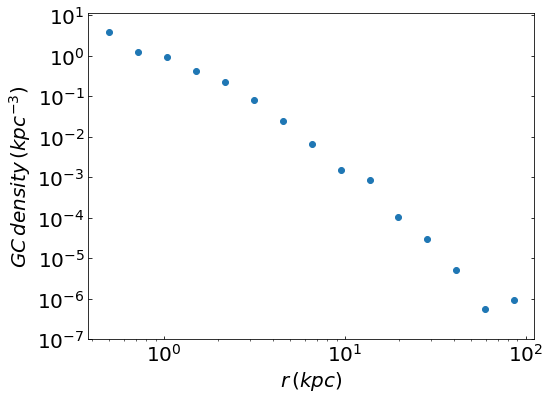

In [8]:
##GC number density from Harris Catalog
data_harris = pd.read_excel('/projects/b1095/syr904/projects/harris_catalog/harris_part1.xlsx',
                           names = ['ID', 'L', 'B', 'Rsun', 'Rgc', 'X', 'Y', 'Z'])
R_gc = list(data_harris['Rgc'])
print(min(R_gc), max(R_gc))

logbin = np.logspace(np.log10(min(R_gc)), np.log10(max(R_gc)), 16)
ngc_hist, rgc_hist = np.histogram(R_gc, bins=logbin)
print(ngc_hist, rgc_hist)

density = []; rkpc = []
for xx in range(len(ngc_hist)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol = (2.*twopi/3.)*(rgc_hist[xx+1]**3-rgc_hist[xx]**3)
    density.append(ngc_hist[xx]/vol)
    rkpc.append(rgc_hist[xx])
    
    
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(figsize = (8, 6))
axs.scatter(rkpc, density)
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(ymin = 0.0000001)
axs.set_ylabel(r'$GC\,density\,(kpc^{-3})$')
axs.set_xlabel(r'$r\,(kpc)$')
axs.tick_params(top=False, right=True, direction = 'in')
plt.locator_params(axis='y', numticks=10)

In [ ]:
##Plot the distribution of formation time of MSPs
historyfiles=np.sort(glob('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/MSPBHinGC/data/history/MSP/*'))

ft=[]
for i in range(len(historyfiles)):
    with open(historyfiles[i], 'r') as fhist:
        next(fhist)
        for line in fhist:
            datahist=line.split()
            if int(datahist[8])==13 and float(datahist[2])<=0.03:
                ft.append(float(datahist[0])/1000.)
                break
            
plt.figure()
plt.hist(ft, bins=10, alpha=0.7)
plt.xlabel('Formation Time (Gyr)')
plt.ylabel('N')

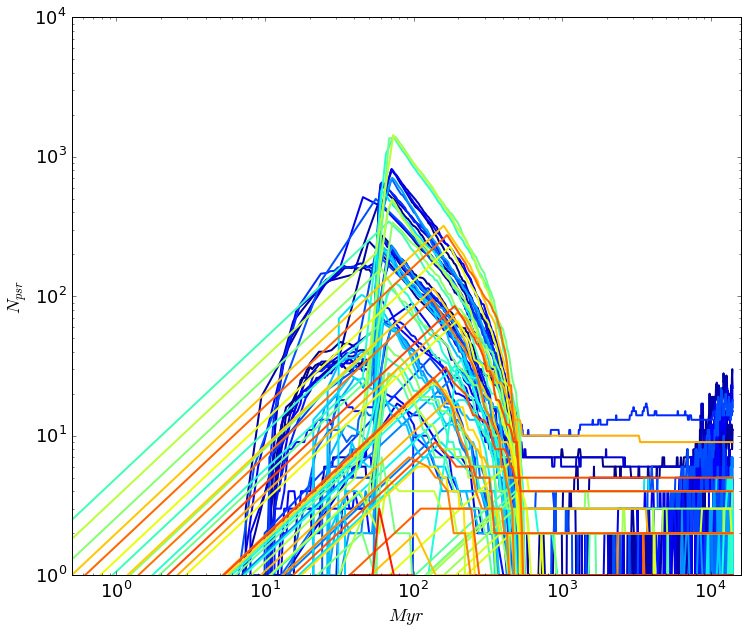

In [42]:
##Cumulative distribution of Npsr vs. time
paths=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/path_nondissolved_newruns.dat', dtype=str)
#print paths

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 10]
c = cm.jet(np.linspace(0, 1, 110))

plt.figure()
for i in range(len(paths)):
    filestr=paths[i]+'initial'
    datans=np.genfromtxt(filestr+'.ns.dat')
    t_conv=ns.conv('t', filestr+'.conv.sh')
    t=np.array(datans[:,0])*t_conv; Npsr=np.array(datans[:,5])
    plt.plot(t, Npsr, color=c[i], lw=2.)

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5, 16000.)
#plt.ylim(-0.5, 1000.)
plt.xlabel(r'$Myr$')
plt.ylabel(r'$N_{psr}$')